**MODELO PREDICTIVO** (ML/DL)

(INDICADORES DE SEGURIDAD OPERACIONAL - MANTENIMIENTO E INSPECCIÓN DE AERONAVES Y COMPONENTES)

1. **Preparación del Dataset**


1.1 Librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
from tensorflow import keras
import statsmodels.api as sm
import scipy
import h5py
import chardet
from tabulate import tabulate
from google.colab import drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

In [ ]:
pip install tabulate

1.2 Carga de **Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Ruta al archivo CSV en Google Drive
file_path = '/content/drive/MyDrive/Bootcamp AI&ML KC/Proyecto Final/Dataset(DatosPeligrosSegOp).csv'

# Carga el archivo CSV en un DataFrame usando el punto y coma como separador y 'latin1' como encoding
data = pd.read_csv(file_path, sep=';', encoding='ISO-8859-1')
data

,Año,Descripción del Peligro (Falla/Error) que afecta la Seguridad de Aeronave o Componente de Aeronave,Consecuencias Potenciales,Nivel de Riesgo\n(1 - 5),Categoría del Peligro,Acrónimo Categoría,Código del Peligro,Peligros\nEne,HHT\nEne,Peligros\nFeb,...,HHT\nAgo,Peligros Sep,HHT\nSep,Peligros\nOct,HHT\nOct,Peligros\nNov,HHT\nNov,Peligros\nDic,HHT\nDic,Unnamed: 31
0,2013,Instalación de un elemento no aprobado para us...,Posible compromiso de seguridad y confiabilida...,5,"Equipos, Componentes y Materiales",ECM,P1.1,2,50123,4,...,50372,2,50623,3.0,50349.0,3.0,50793.0,4.0,50371.0,NaN
1,2013,Instalación de un elemento sujeto a vida límit...,Riesgo de operar elementos fuera de su vida út...,5,"Equipos, Componentes y Materiales",ECM,P1.2,4,53897,2,...,51198,1,53874,2.0,51267.0,5.0,52937.0,0.0,51198.0,NaN
2,2013,Certificar la aeronavegabilidad de un accesori...,Puede llevar a un mayor desgaste de los compon...,4,"Equipos, Componentes y Materiales",ECM,P1.3,3,50321,0,...,52345,2,52019,0.0,52654.0,1.0,54328.0,6.0,52547.0,NaN
3,2013,"Utilización de un producto químico, con su fec...",Riesgo de reacciones químicas impredecibles qu...,4,"Equipos, Componentes y Materiales",ECM,P1.4,1,54678,2,...,53214,1,54903,4.0,53821.0,0.0,51569.0,5.0,53820.0,NaN
4,2013,Incumplimiento de los requisitos especiales de...,Potencial deterioro de componentes o equipos q...,3,"Equipos, Componentes y Materiales",ECM,P1.5,0,52456,5,...,54567,5,53297,3.0,54189.0,2.0,53147.0,1.0,54327.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,2023,Falla en instrumento e indicadores del motor,Riesgo de operar con información inexacta o fa...,4,Prueba de Vuelo y Operacional,PVOPS,P8.13,2,49276,0,...,54486,4,53208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
909,2023,Apagada de motor en vuelo,Riesgo de pérdida de potencia y control de la ...,5,Prueba de Vuelo y Operacional,PVOPS,P8.14,0,54341,3,...,51102,3,54325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
910,2023,Salida de pista,Riesgo de daño a la aeronave y lesiones a bord...,5,Prueba de Vuelo y Operacional,PVOPS,P8.15,1,49119,4,...,54496,5,52807,NaN,NaN,NaN,NaN,NaN,NaN,NaN
911,2023,No realizar el planeamiento del vuelo de acuer...,Riesgo de operar en condiciones no planificada...,4,Prueba de Vuelo y Operacional,PVOPS,P8.16,3,53349,5,...,51963,2,51707,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Nombres de las columnas
column_names = data.columns
print(column_names)

Index(['Año',
       'Descripción del Peligro (Falla/Error) que afecta la Seguridad de Aeronave o Componente de Aeronave',
       'Consecuencias Potenciales', 'Nivel de Riesgo\n(1 - 5)',
       'Categoría del Peligro', 'Acrónimo Categoría', 'Código del Peligro',
       'Peligros\nEne', 'HHT\nEne', 'Peligros\nFeb', 'HHT\nFeb',
       'Peligros\nMar', 'HHT\nMar', 'Peligros\nAbr', 'HHT\nAbr',
       'Peligros\nMay', 'HHT\nMay', 'Peligros\nJun', 'HHT\nJun',
       'Peligros\nJul', 'HHT\nJul', 'Peligros\nAgo', 'HHT\nAgo',
       'Peligros Sep', 'HHT\nSep', 'Peligros\nOct', 'HHT\nOct',
       'Peligros\nNov', 'HHT\nNov', 'Peligros\nDic', 'HHT\nDic',
       'Unnamed: 31'],
      dtype='object')


In [ ]:
#Tipo de dato de todas las columnas
data_types = data.dtypes
print(data_types)

Año                                                                                                     int64
Descripción del Peligro (Falla/Error) que afecta la Seguridad de Aeronave o Componente de Aeronave     object
Consecuencias Potenciales                                                                              object
Nivel de Riesgo\n(1 - 5)                                                                                int64
Categoría del Peligro                                                                                  object
Acrónimo Categoría                                                                                     object
Código del Peligro                                                                                     object
Peligros\nEne                                                                                           int64
HHT\nEne                                                                                                int64
Peligros\n

1.3 Procesamiento inicial

In [ ]:
#Eliminar saltos --> \n
data.columns = data.columns.str.replace('\n', ' ')

In [ ]:
#Ajustar el texto --> eliminar espacios en blanco al principio y al final de c/cadena
for columna in data.columns:

    if data[columna].dtype == 'O':  # 'O' representa tipo object (cadena)
        data[columna] = data[columna].str.strip()

In [ ]:
#Convertir datos float64 en int64
data = data.astype('int64', errors='ignore')

In [ ]:
#Imprimir nombres de columnas con # índice
for i, columna in enumerate(data.columns):
    print(f'Columna {i}: {columna}')

Columna 0: Año
Columna 1: Descripción del Peligro (Falla/Error) que afecta la Seguridad de Aeronave o Componente de Aeronave
Columna 2: Consecuencias Potenciales
Columna 3: Nivel de Riesgo (1 - 5)
Columna 4: Categoría del Peligro
Columna 5: Acrónimo Categoría
Columna 6: Código del Peligro
Columna 7: Peligros Ene
Columna 8: HHT Ene
Columna 9: Peligros Feb
Columna 10: HHT Feb
Columna 11: Peligros Mar
Columna 12: HHT Mar
Columna 13: Peligros Abr
Columna 14: HHT Abr
Columna 15: Peligros May
Columna 16: HHT May
Columna 17: Peligros Jun
Columna 18: HHT Jun
Columna 19: Peligros Jul
Columna 20: HHT Jul
Columna 21: Peligros Ago
Columna 22: HHT Ago
Columna 23: Peligros Sep
Columna 24: HHT Sep
Columna 25: Peligros Oct
Columna 26: HHT Oct
Columna 27: Peligros Nov
Columna 28: HHT Nov
Columna 29: Peligros Dic
Columna 30: HHT Dic
Columna 31: Unnamed: 31


In [ ]:
#Eliminar Columnas no requeridas --> Unnamed
data = data.drop(data.columns[[31]], axis=1)

In [ ]:
print(data.columns)

Index(['Año',
       'Descripción del Peligro (Falla/Error) que afecta la Seguridad de Aeronave o Componente de Aeronave',
       'Consecuencias Potenciales', 'Nivel de Riesgo (1 - 5)',
       'Categoría del Peligro', 'Acrónimo Categoría', 'Código del Peligro',
       'Peligros Ene', 'HHT Ene', 'Peligros Feb', 'HHT Feb', 'Peligros Mar',
       'HHT Mar', 'Peligros Abr', 'HHT Abr', 'Peligros May', 'HHT May',
       'Peligros Jun', 'HHT Jun', 'Peligros Jul', 'HHT Jul', 'Peligros Ago',
       'HHT Ago', 'Peligros Sep', 'HHT Sep', 'Peligros Oct', 'HHT Oct',
       'Peligros Nov', 'HHT Nov', 'Peligros Dic', 'HHT Dic'],
      dtype='object')


In [ ]:
#Suma de peligros por mes
#Número total de datos en el dataset
total_peligros_por_mes = data[['Peligros Ene', 'Peligros Feb', 'Peligros Mar', 'Peligros Abr', 'Peligros May', 'Peligros Jun', 'Peligros Jul', 'Peligros Ago', 'Peligros Sep', 'Peligros Oct', 'Peligros Nov', 'Peligros Dic']].sum(axis=1)
num_datos = total_peligros_por_mes.sum()
print(f'Número total --> Datos en dataset: {num_datos}')

Número total --> Datos en dataset: 27049.0


1.4 EDA (Exploración de Datos)

1.4.1 Variables del dataset



*   **Año** --> Año en el que se registraron los datos.

* **Peligros (Fallas/Errores)** --> Descripción de la naturaleza del peligro, falla o error, que afecta la Seguridad de Aeronave o Componente de Aeronave.
*   **Consecuencias Potenciales** --> Afectación o impacto a la seguridad
*   **Nivel del Riesgo** --> (Escala de 1 a 5 )(5=MayorNivel de Severidad)
*   **Categoría del Peligro** --> Agrupa y clasifica los peligros registrados en el conjunto de datos en categorías específicas.
*   **Código del Peligro** --> Identifica de manera única cada peligro.
*   **Peligros Ene a Dic** --> Cantidad de peligros en cada mes.
*   **HHT Ene a Dic** --> Horas-Hombre Trabajadas (HHT) relacionadas con esos peligros para cada mes del año.

1.4.2 Tipo de Variables

* **Variable a Predecir** - Salida del Modelo --> Indicador del Rendimiento de la Seguridad Operacional
* **Covariables** - Entrada del Modelo --> a. Total de Peligros x M - b. Total de HHT x M - c.Escala de referencia HHT = 1000

1.4.3 Datos Faltantes (missing values)

In [ ]:
#Datos faltantes en cada columna
datos_faltantes = data.isnull()
datos_faltantes_count = datos_faltantes.sum()
datos_faltantes_count

Año                                                                                                    0
Descripción del Peligro (Falla/Error) que afecta la Seguridad de Aeronave o Componente de Aeronave     0
Consecuencias Potenciales                                                                              0
Nivel de Riesgo (1 - 5)                                                                                0
Categoría del Peligro                                                                                  0
Acrónimo Categoría                                                                                     0
Código del Peligro                                                                                     0
Peligros Ene                                                                                           0
HHT Ene                                                                                                0
Peligros Feb                                           

Datos faltantes evidenciados --> Datos de Oct/Nov/Dic de 2023

1.4.4 Comportamiento de los datos

In [ ]:
#Crear lista --> columnas_peligros
#Crear nueva columna --> Total_Peligros
#df=resumen -->  Resume los datos de peligros x año
columnas_peligros = [f'Peligros {mes}' for mes in ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']]
data['Total_Peligros'] = data[columnas_peligros].sum(axis=1)
resumen = data[['Año'] + columnas_peligros + ['Total_Peligros']].groupby('Año').sum()
resumen_transpuesta = resumen.T
with pd.option_context('display.max_columns', None):
    print(resumen_transpuesta)

Año               2013    2014    2015    2016    2017    2018    2019  \
Peligros Ene     206.0   200.0   190.0   191.0   173.0   176.0   190.0   
Peligros Feb     183.0   194.0   232.0   200.0   184.0   194.0   196.0   
Peligros Mar     209.0   229.0   239.0   195.0   183.0   195.0   191.0   
Peligros Abr     199.0   224.0   204.0   199.0   188.0   194.0   221.0   
Peligros May     226.0   236.0   252.0   229.0   203.0   216.0   217.0   
Peligros Jun     197.0   193.0   204.0   208.0   210.0   220.0   231.0   
Peligros Jul     261.0   240.0   269.0   232.0   238.0   197.0   185.0   
Peligros Ago     196.0   192.0   185.0   201.0   192.0   199.0   185.0   
Peligros Sep     218.0   233.0   248.0   210.0   187.0   198.0   208.0   
Peligros Oct     193.0   220.0   220.0   200.0   201.0   207.0   202.0   
Peligros Nov     216.0   203.0   195.0   236.0   220.0   239.0   230.0   
Peligros Dic     207.0   248.0   249.0   223.0   196.0   241.0   229.0   
Total_Peligros  2511.0  2612.0  2687.0

In [ ]:
#Identificar columnas de peligros
#Crear nueva columna --> conteo total de peligros por mes
#Encontrar año con más peligros
#Encontrar mes con más peligros en el año con más peligros
columnas_peligros = [f'Peligros {mes}' for mes in ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']]
data['Total_Peligros'] = data[columnas_peligros].sum(axis=1)
anio_max_peligros = data.groupby('Año')['Total_Peligros'].sum().idxmax()
cant_peligros_anio = data.groupby('Año')['Total_Peligros'].sum().max()

mes_max_peligros = data[data['Año'] == anio_max_peligros][columnas_peligros].sum().idxmax()
cant_peligros_mes = data[data['Año'] == anio_max_peligros][columnas_peligros].sum().max()

print(f"Año con más peligros registrados: {anio_max_peligros}, Cantidad: {cant_peligros_anio} peligros")
print(f"Mes con más peligros en año con más peligros: {mes_max_peligros}, Cantidad: {cant_peligros_mes} peligros")

Año con más peligros registrados: 2015, Cantidad: 2687.0 peligros
Mes con más peligros en año con más peligros: Peligros Jul, Cantidad: 269.0 peligros


In [ ]:
#Filtrar datos --> años 2018 a 2022
#Crear nueva columna --> conteo total de peligros por mes
#Encontrar año con menos peligros
#Encontrar mes con menos peligros en el año con menos peligros
data_filtered = data[(data['Año'] >= 2018) & (data['Año'] <= 2022)]
anio_min_peligros = data_filtered.groupby('Año')['Total_Peligros'].sum().idxmin()
cant_peligros_min_anio = data_filtered.groupby('Año')['Total_Peligros'].sum().min()
mes_min_peligros = data_filtered[data_filtered['Año'] == anio_min_peligros][columnas_peligros].sum().idxmin()
cant_peligros_min_mes = data_filtered[data_filtered['Año'] == anio_min_peligros][columnas_peligros].sum().min()

print(f"Año con menos peligros: {anio_min_peligros}, Cantidad: {cant_peligros_min_anio} peligros")
print(f"Mes con menos peligros en año con menos peligros: {mes_min_peligros}, Cantidad: {cant_peligros_min_mes} peligros")

Año con menos peligros: 2018, Cantidad: 2476.0 peligros
Mes con menos peligros en año con menos peligros: Peligros Ene, Cantidad: 176.0 peligros


In [ ]:
#Exraer códigos de peligro únicos de la columna 'Código del Peligro'
#Inicializar Variables para rastrear los códigos de peligro más repetidos y su cantidad
#Iterar a través de los códigos de peligro únicos
#Calcular sumatoria total de peligros
#Filtra para excluir el año 2023
#Ordenar la lista por cantidad en orden descendente --> Top 5 Peligros con mayor frecuencia
codigos_de_peligro = data[data['Año'] < 2023]['Código del Peligro'].unique()
top_5_codigos = []

for codigo in codigos_de_peligro:
    data_filtrada = data[(data['Año'] < 2023) & (data['Código del Peligro'] == codigo)]
    total_peligros = data_filtrada[columnas_peligros].sum().sum()

    if len(top_5_codigos) < 5:
        top_5_codigos.append((codigo, total_peligros))
    else:
        top_5_codigos.sort(key=lambda x: x[1])
        if total_peligros > top_5_codigos[0][1]:
            top_5_codigos[0] = (codigo, total_peligros)

top_5_codigos.sort(key=lambda x: x[1], reverse=True)

for i, (codigo, cantidad) in enumerate(top_5_codigos, 1):
    print(f"{i}. Código de Peligro: {codigo}, Total: {cantidad}")

1. Código de Peligro: P3.2, Total: 315.0
2. Código de Peligro: P4.15, Total: 314.0
3. Código de Peligro: P8.8, Total: 313.0
4. Código de Peligro: P8.1, Total: 313.0
5. Código de Peligro: P5.5, Total: 313.0


-Peligro P3.2 --> Utilización de información técnica no aplicables a la marca y modelo del equipo, instrumento o accesorio.

-Peligro P4.15 --> Daños causados por elementos extraños a las aeronaves FOD

-Peligro P8.8 --> Daños a la estructura de la aeronave, como grietas, corrosión o daños estructurales

-Peligro P8.1 --> Abastecimiento de combustible incumpliendo procedimientos estandarizados normativos

In [ ]:
#Filtrar filas --> Nivel de Riesgo = 5
#Obtener códigos de peligro únicos nivel de riesgo 5
#Mostrar códigos de peligro nivel de riesgo 5
peligros_nivel_5 = data[data['Nivel de Riesgo (1 - 5)'] == 5]
codigos_peligro_nivel_5 = peligros_nivel_5['Código del Peligro'].unique()
print(codigos_peligro_nivel_5)

['P1.1' 'P1.2' 'P4.3' 'P4.4' 'P4.14' 'P4.15' 'P4.16' 'P4.23' 'P4.24'
 'P6.3' 'P6.4' 'P8.2' 'P8.3' 'P8.4' 'P8.5' 'P8.6' 'P8.7' 'P8.8' 'P8.9'
 'P8.10' 'P8.11' 'P8.14' 'P8.15']


-Peligros con mayor número de frecuencia y Nivel del Riesgo=5 --> P4.15 y P8.8

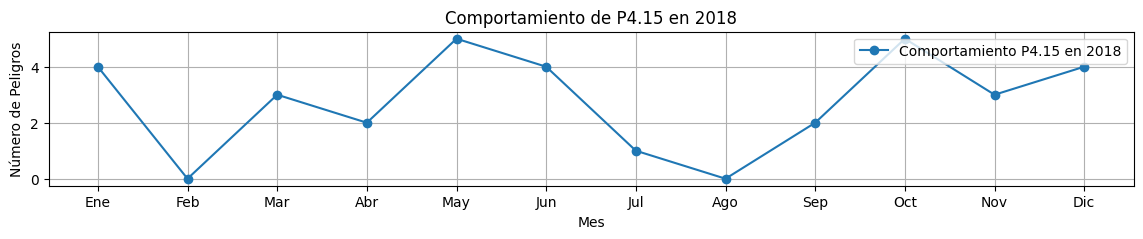

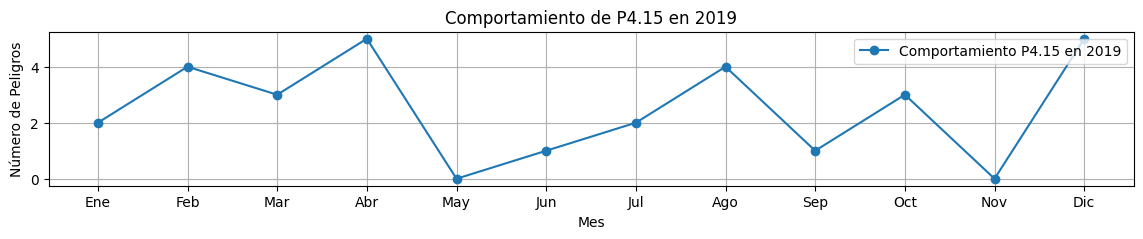

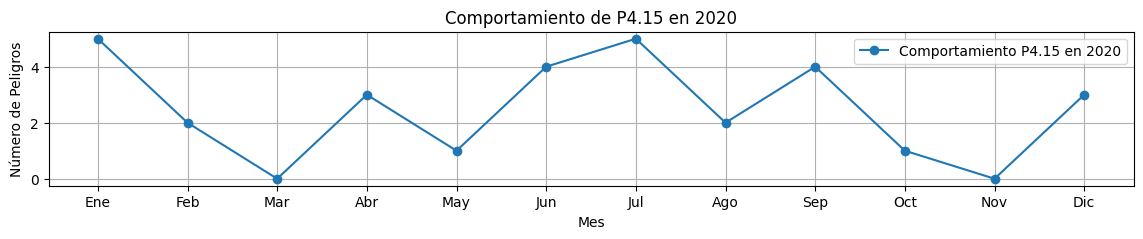

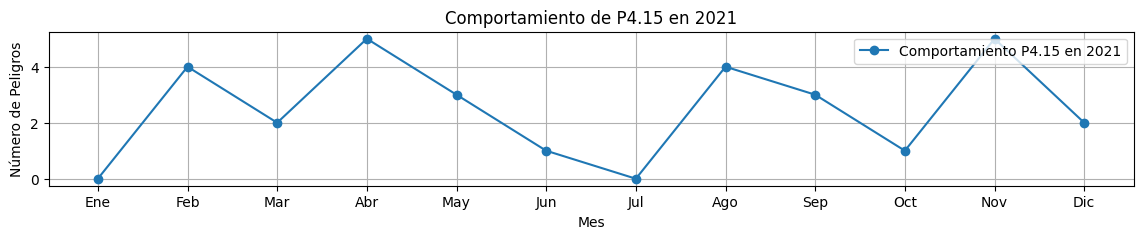

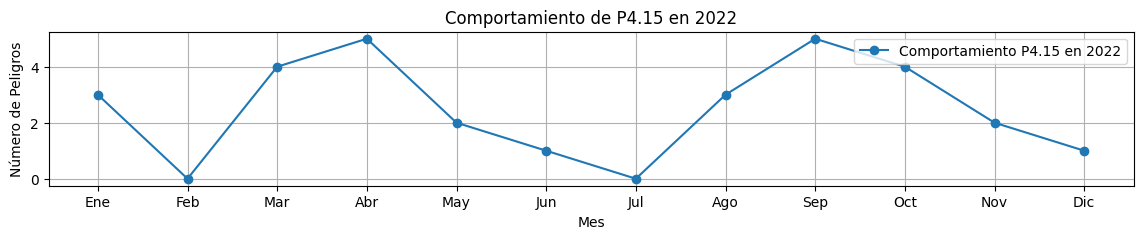

In [ ]:
#Filtrar datos del código de peligro P4.15
#Seleccionar columnas de los peligros de enero a diciembre
#Crear gráfica de líneas --> Resaltar los valores numéricos por año (2018 a 2022)
data_p4_15 = data[data['Código del Peligro'] == 'P4.15']
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

for anio in range(2018, 2023):
    data_anio = data_p4_15[data_p4_15['Año'] == anio]
    valores_por_mes = [data_anio[f'Peligros {mes}'].values[0] for mes in meses]
    plt.figure(figsize=(14, 2))
    plt.plot(meses, valores_por_mes, marker='o', linestyle='-', label=f'Comportamiento P4.15 en {anio}')
    plt.title(f'Comportamiento de P4.15 en {anio}')
    plt.xlabel('Mes')
    plt.ylabel('Número de Peligros')
    plt.grid(True)
    plt.legend(loc='upper right')
    plt.show()

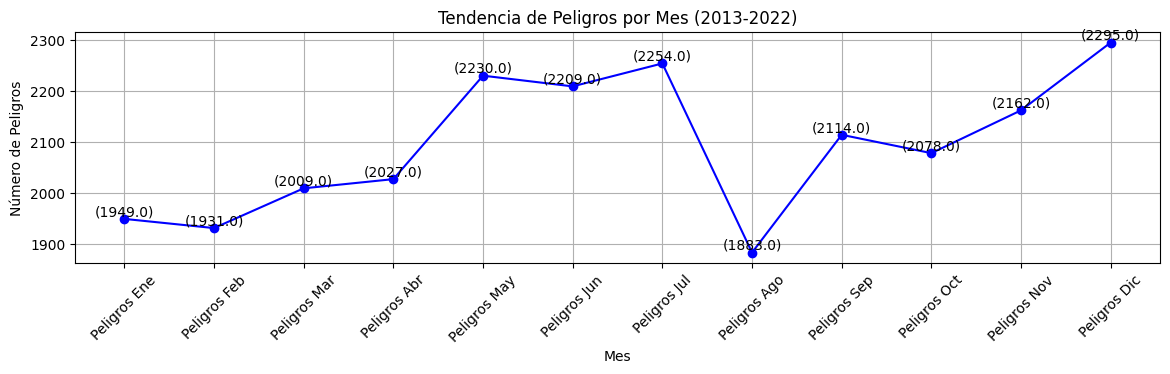

In [ ]:
#Filtrar los datos (2013 a 2022)
#Seleccionar columnas de interés
#Calcular suma total de peligros x mes para todos los años
#Graficar
datos_2013_2022 = data[(data['Año'] >= 2013) & (data['Año'] <= 2022)]
columnas_peligros = [f'Peligros {mes}' for mes in ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']]
suma_por_mes = datos_2013_2022[columnas_peligros].sum()

plt.figure(figsize=(14, 3))
plt.plot(suma_por_mes.index, suma_por_mes.values, marker='o', linestyle='-', color='b')
plt.title('Tendencia de Peligros por Mes (2013-2022)')
plt.xlabel('Mes')
plt.ylabel('Número de Peligros')
plt.xticks(rotation=45)
plt.grid(True)

for x, y in zip(suma_por_mes.index, suma_por_mes.values):
    plt.text(x, y, f'({y})', ha='center', va='bottom', fontsize=10)
plt.show()

-Meses con mayor # de peligros identificados (Periodo 2013-2022) --> Mayo, Julio, Dic

In [ ]:
#Periodo del conteo --> 2013-2023
#Obtener lista de categorías únicas presentes en el DataFrame.
#Inicializar un diccionario para almacenar sumas de peligros por categoría.
#Iterar a través de las categorías y realizar suma para cada una.
categorias = data['Categoría del Peligro'].unique()
suma_peligros_por_categoria = {}

for categoria in categorias:
    categoria_data = data[data['Categoría del Peligro'] == categoria]
    columnas_peligros = ['Peligros Ene', 'Peligros Feb', 'Peligros Mar', 'Peligros Abr', 'Peligros May']
    suma_peligros = categoria_data[columnas_peligros].sum().sum()
    suma_peligros_por_categoria[categoria] = suma_peligros

for categoria, suma in suma_peligros_por_categoria.items():
    print(f"Peligros Categoría: {categoria}: {suma}")

Peligros Categoría: Equipos, Componentes y Materiales: 664
Peligros Categoría: Equipos y Herramientas Calibradas: 541
Peligros Categoría: Manuales y Procedimientos Técnicos: 949
Peligros Categoría: Procedimientos de Mantenimiento, Reparación e Inspección: 3216
Peligros Categoría: Entrenamiento / Factor-Humano / Competencia del personal técnico: 1098
Peligros Categoría: Entrenamiento y competencia del personal técnico: 137
Peligros Categoría: Aprobación de Retorno al Servicio / Conformidad de Mantenimiento: 804
Peligros Categoría: Control Calidad e Inspección: 1478
Peligros Categoría: Prueba de Vuelo y Operacional: 2308


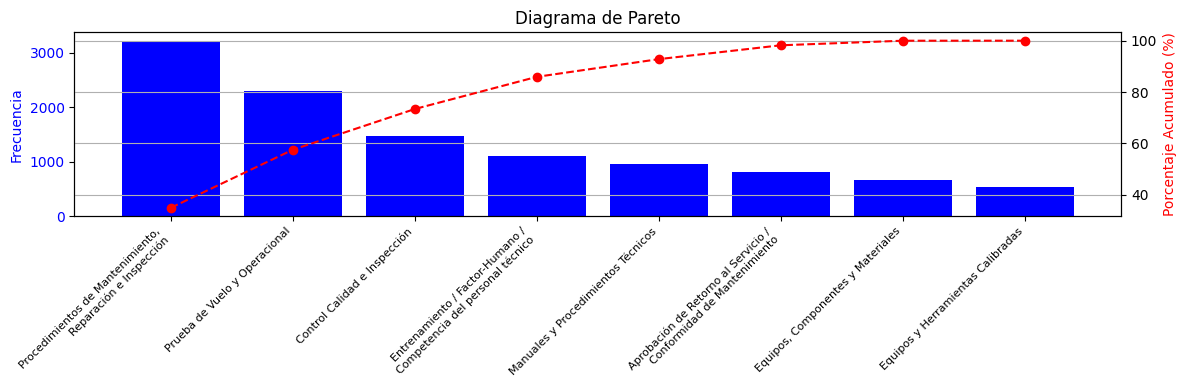

In [ ]:
#Graficar Diagrama de Pareto
#Establecer --> Listado desde Categoría del Peligro
#Definir --> Frecuencias
#Definir --> % acumulado
categorias = [
    "Procedimientos de Mantenimiento,\nReparación e Inspección",
    "Prueba de Vuelo y Operacional",
    "Control Calidad e Inspección",
    "Entrenamiento / Factor-Humano /\nCompetencia del personal técnico",
    "Manuales y Procedimientos Técnicos",
    "Aprobación de Retorno al Servicio /\nConformidad de Mantenimiento",
    "Equipos, Componentes y Materiales",
    "Equipos y Herramientas Calibradas"
]
frecuencias = [3216, 2308, 1478, 1098, 949, 804, 664, 541]
porcentaje_acumulado = [34.98, 57.56, 73.41, 85.93, 92.82, 98.21, 99.99, 100.00]
fig, ax1 = plt.subplots(figsize=(12, 4))
ax1.bar(categorias, frecuencias, color='b')
ax1.set_ylabel('Frecuencia', color='b')
ax1.tick_params(axis='y', labelcolor='b')
plt.xticks(rotation=45, ha='right', fontsize=8)
ax2 = ax1.twinx()
ax2.plot(categorias, porcentaje_acumulado, marker='o', color='r', linestyle='--')
ax2.set_ylabel('Porcentaje Acumulado (%)', color='r')
plt.title('Diagrama de Pareto')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

-Diagrama de Pareto --> El 80% de los efectos están causados por las tres primeras categorías, las cuales representan el 21% del total de categorías. Esto indica que (el 21%) es responsable de la mayoría de los peligros en el dataset.

*   Procedimientos de Mantenimiento, Reparación e Inspección
*   Prueba de Vuelo y Operacional
*   Control Calidad e Inspección

1.5 Elaboración **Tabla de Datos** --> Cálculo de **Tasa de Peligros** Mensual (Ene-Dic) por Año (2013-2022)

1.5.1 Elaboración de **Hojas de Datos** --> Generar **Diagrama de Indicador de Rendimiento de Seguridad Operacional**

In [ ]:
#Eliminar Columnas no requeridas
data = data.drop(data.columns[[1, 2, 3, 5]], axis=1)
data.head()

,Año,Categoría del Peligro,Código del Peligro,Peligros Ene,HHT Ene,Peligros Feb,HHT Feb,Peligros Mar,HHT Mar,Peligros Abr,...,HHT Ago,Peligros Sep,HHT Sep,Peligros Oct,HHT Oct,Peligros Nov,HHT Nov,Peligros Dic,HHT Dic,Total_Peligros
0,2013,"Equipos, Componentes y Materiales",P1.1,2,50123,4,51258,1,50321,3,...,50372,2,50623,3.0,50349.0,3.0,50793.0,4.0,50371.0,30.0
1,2013,"Equipos, Componentes y Materiales",P1.2,4,53897,2,50456,1,51678,5,...,51198,1,53874,2.0,51267.0,5.0,52937.0,0.0,51198.0,29.0
2,2013,"Equipos, Componentes y Materiales",P1.3,3,50321,0,53123,1,52987,2,...,52345,2,52019,0.0,52654.0,1.0,54328.0,6.0,52547.0,28.0
3,2013,"Equipos, Componentes y Materiales",P1.4,1,54678,2,50234,4,53654,0,...,53214,1,54903,4.0,53821.0,0.0,51569.0,5.0,53820.0,28.0
4,2013,"Equipos, Componentes y Materiales",P1.5,0,52456,5,54890,3,54123,1,...,54567,5,53297,3.0,54189.0,2.0,53147.0,1.0,54327.0,27.0


In [ ]:
#Obtener nombres de las columnas
#Eliminar palabra "Peligros" de los nombres de las columnas
nombres_columnas = data.columns
for numero, nombre in enumerate(nombres_columnas):
    nuevo_nombre = nombre.replace("Peligros ", "")
    data.rename(columns={nombre: nuevo_nombre}, inplace=True)
print(data.columns)

Index(['Año', 'Categoría del Peligro', 'Código del Peligro', 'Ene', 'HHT Ene',
       'Feb', 'HHT Feb', 'Mar', 'HHT Mar', 'Abr', 'HHT Abr', 'May', 'HHT May',
       'Jun', 'HHT Jun', 'Jul', 'HHT Jul', 'Ago', 'HHT Ago', 'Sep', 'HHT Sep',
       'Oct', 'HHT Oct', 'Nov', 'HHT Nov', 'Dic', 'HHT Dic', 'Total_Peligros'],
      dtype='object')


A. Crear Tablas 1 y 2

A.1 **Tabla 1** --> Contiene: Registro Peligros

A.2 **Tabla 2** --> Contiene: Registro HHT

In [ ]:
#Dividir el DataFrame en dos tablas --> Tabla 1=Registro Peligros, Tabla 2=Registro HHT
#Renombrar tablas
#Mostrar primeras filas de las dos tablas
tabla1 = data[['Año', 'Categoría del Peligro', 'Código del Peligro', 'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']]
tabla2 = data[['Año', 'HHT Ene', 'HHT Feb', 'HHT Mar', 'HHT Abr', 'HHT May', 'HHT Jun', 'HHT Jul', 'HHT Ago', 'HHT Sep', 'HHT Oct', 'HHT Nov', 'HHT Dic']]

tabla1 = tabla1.rename(columns={'Código del Peligro': 'Código de Peligro'})
tabla1.name = 'Registro Peligros'
tabla2.name = 'Registro HHT'

In [ ]:
print(tabla1.name)
tabla1

Registro Peligros


,Año,Categoría del Peligro,Código de Peligro,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
0,2013,"Equipos, Componentes y Materiales",P1.1,2,4,1,3,2,0,5,1,2,3.0,3.0,4.0
1,2013,"Equipos, Componentes y Materiales",P1.2,4,2,1,5,2,0,3,4,1,2.0,5.0,0.0
2,2013,"Equipos, Componentes y Materiales",P1.3,3,0,1,2,5,4,1,3,2,0.0,1.0,6.0
3,2013,"Equipos, Componentes y Materiales",P1.4,1,2,4,0,3,1,5,2,1,4.0,0.0,5.0
4,2013,"Equipos, Componentes y Materiales",P1.5,0,5,3,1,2,1,0,4,5,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,2023,Prueba de Vuelo y Operacional,P8.13,2,0,4,1,3,5,3,2,4,NaN,NaN,NaN
909,2023,Prueba de Vuelo y Operacional,P8.14,0,3,2,4,1,5,1,0,3,NaN,NaN,NaN
910,2023,Prueba de Vuelo y Operacional,P8.15,1,4,0,5,3,2,2,1,5,NaN,NaN,NaN
911,2023,Prueba de Vuelo y Operacional,P8.16,3,5,1,2,4,0,0,4,2,NaN,NaN,NaN


In [ ]:
print(tabla2.name)
tabla2

Registro HHT


,Año,HHT Ene,HHT Feb,HHT Mar,HHT Abr,HHT May,HHT Jun,HHT Jul,HHT Ago,HHT Sep,HHT Oct,HHT Nov,HHT Dic
0,2013,50123,51258,50321,50347,50237,50347,50419,50372,50623,50349.0,50793.0,50371.0
1,2013,53897,50456,51678,51682,50689,51682,51567,51198,53874,51267.0,52937.0,51198.0
2,2013,50321,53123,52987,52991,50974,52991,52784,52345,52019,52654.0,54328.0,52547.0
3,2013,54678,50234,53654,53659,51246,53659,53602,53214,54903,53821.0,51569.0,53820.0
4,2013,52456,54890,54123,54127,51530,54127,54097,54567,53297,54189.0,53147.0,54327.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,2023,49276,53951,53964,52503,49381,54160,50867,54486,53208,NaN,NaN,NaN
909,2023,54341,49176,51464,53187,51871,50241,53670,51102,54325,NaN,NaN,NaN
910,2023,49119,49266,53333,53988,53936,52460,53775,54496,52807,NaN,NaN,NaN
911,2023,53349,51075,50967,54787,54036,53959,52008,51963,51707,NaN,NaN,NaN


B. Elaborar **Hoja de Datos** --> **Indicadores de Rendimiento de Seguridad Operacional**

B.1 Datos de referencia --> Categorías de Peligros (2013-2022) que representan el **80%** de la afectación de la Seguridad:

*   **Procedimientos de Mantenimiento, Reparación e Inspección**
*   **Prueba de Vuelo y Operacional**
*   **Control Calidad e Inspección**

B.1.1 Desarrollo de Indicador de Rendimiento de S.O. --> (**Procedimientos de Mantenimiento, Reparación e Inspección**)

In [ ]:
#Filtrar datos para el año 2013 y categoría --> 'Procedimientos de Mantenimiento, Reparación e Inspección'
#Calcular HHT Total y Peligros Total para cada mes
#Calcular Tasa de Peligros
#Calcular promedio de la "Tasa de Peligros"
#Calcular SD de la "Tasa de Peligros"
#Crear DataFrame
#Crear tabla5 --> Datos de 2013
data_2013_pmri = data[(data['Año'] == 2013) & (data['Categoría del Peligro'] == 'Procedimientos de Mantenimiento, Reparación e Inspección')]
meses_2013 = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

hht_total_2013 = []
peligros_total_2013 = []
for mes in meses_2013:
    hht_total_mes_2013 = data_2013_pmri[f'HHT {mes}'].mean()
    peligros_total_mes_2013 = data_2013_pmri[mes].sum()
    hht_total_2013.append(round(hht_total_mes_2013, 2))
    peligros_total_2013.append(round(peligros_total_mes_2013, 2))

tasa_peligros_2013 = [(p * 1000) / h if h != 0 else 0 for p, h in zip(peligros_total_2013, hht_total_2013)]
tasa_peligros_2013 = [f'{valor:.2f}' for valor in tasa_peligros_2013]

promedio_tasa_peligros_2013 = round(sum(map(float, tasa_peligros_2013)) / len(tasa_peligros_2013), 2)
promedio_tasa_peligros_2013 = f'{promedio_tasa_peligros_2013:.2f}'

sd_tasa_peligros_2013 = pd.Series(map(float, tasa_peligros_2013)).std()
sd_tasa_peligros_2013 = f'{sd_tasa_peligros_2013:.2f}'

datos_2013 = {
    'Mes': meses_2013,
    'HHT Total': hht_total_2013,
    'Peligros Total': peligros_total_2013,
    'Tasa de Peligros': tasa_peligros_2013,
    'Promedio': [promedio_tasa_peligros_2013] * 12,
    'SD': [sd_tasa_peligros_2013] * 12
}

tabla5_2013 = pd.DataFrame(datos_2013)
tabla5_2013

tabla5_2013.name = "Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Procedimientos de Mantenimiento, Reparación e Inspección) Año 2013"
print(tabla5_2013.name)
tabla5_styled = tabla5_2013.style.set_properties(**{'text-align': 'center'})
tabla5_styled

Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Procedimientos de Mantenimiento, Reparación e Inspección) Año 2013


,Mes,HHT Total,Peligros Total,Tasa de Peligros,Promedio,SD
0,Ene,52875.540000,59.000000,1.12,1.15,0.18
1,Feb,52680.460000,63.000000,1.20,1.15,0.18
2,Mar,52886.460000,52.000000,0.98,1.15,0.18
3,Abr,53072.830000,54.000000,1.02,1.15,0.18
4,May,52468.620000,61.000000,1.16,1.15,0.18
5,Jun,52302.750000,62.000000,1.19,1.15,0.18
6,Jul,52018.670000,85.000000,1.63,1.15,0.18
7,Ago,52352.380000,58.000000,1.11,1.15,0.18
8,Sep,52340.170000,70.000000,1.34,1.15,0.18
9,Oct,52452.290000,50.000000,0.95,1.15,0.18


In [ ]:
#Filtrar datos para el año 2014 y categoría --> 'Procedimientos de Mantenimiento, Reparación e Inspección'
#Calcular HHT Total y Peligros Total para cada mes
#Calcular Tasa de Peligros
#Calcular Promedio de la "Tasa de Peligros" de 2014
#Objetivo 2014: Promedio de 2013 menos el 5%
#Crear el DataFrame
#Crear tabla6 --> Datos de 2014
data_2014_pmri = data[(data['Año'] == 2014) & (data['Categoría del Peligro'] == 'Procedimientos de Mantenimiento, Reparación e Inspección')]
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

hht_total_2014 = []
peligros_total_2014 = []
for mes in meses:
    hht_total_mes = data_2014_pmri[f'HHT {mes}'].mean()
    peligros_total_mes = data_2014_pmri[mes].sum()
    hht_total_2014.append(round(hht_total_mes, 2))
    peligros_total_2014.append(round(peligros_total_mes, 2))

tasa_peligros_2014 = [(p * 1000) / h if h != 0 else 0 for p, h in zip(peligros_total_2014, hht_total_2014)]
tasa_peligros_2014 = [f'{valor:.2f}' for valor in tasa_peligros_2014]

promedio_tasa_peligros_2014 = round(sum(map(float, tasa_peligros_2014)) / len(tasa_peligros_2014), 2)
promedio_tasa_peligros_2014 = f'{promedio_tasa_peligros_2014:.2f}'

objetivo_2014 = round((1 - 0.05) * float(promedio_tasa_peligros_2013), 2)
objetivo_2014 = f'{objetivo_2014:.2f}'

sd_tasa_peligros_2014 = pd.Series(map(float, tasa_peligros_2014)).std()
sd_tasa_peligros_2014 = f'{sd_tasa_peligros_2014:.2f}'

datos_2014 = {
    'Mes': meses,
    'HHT Total': [round(valor, 2) for valor in hht_total_2014],
    'Peligros Total': [round(valor, 2) for valor in peligros_total_2014],
    'Tasa de Peligros': tasa_peligros_2014,
    'Promedio': promedio_tasa_peligros_2014,
    'Prom Año Ant +1SD': [round(float(promedio_tasa_peligros_2013) + float(sd_tasa_peligros_2013), 2)] * 12,
    'Prom Año Ant +2SD': [round(float(promedio_tasa_peligros_2013) + 2 * float(sd_tasa_peligros_2013), 2)] * 12,
    'Prom Año Ant +3SD': [round(float(promedio_tasa_peligros_2013) + 3 * float(sd_tasa_peligros_2013), 2)] * 12,
    'Objetivo 2014': [objetivo_2014] * 12
}
tabla6_2014 = pd.DataFrame(datos_2014)
columnas_numericas_2014 = ['HHT Total', 'Peligros Total', 'Prom Año Ant +1SD', 'Prom Año Ant +2SD', 'Prom Año Ant +3SD']
for col in columnas_numericas_2014:
    tabla6_2014[col] = tabla6_2014[col].apply(lambda x: f'{float(x):.2f}')

tabla6_2014.name = "Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Procedimientos de Mantenimiento, Reparación e Inspección) Año 2014"
print(tabla6_2014.name)
tabla6_2014_styled = tabla6_2014.style.set_properties(**{'text-align': 'center'})
tabla6_2014_styled

Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Procedimientos de Mantenimiento, Reparación e Inspección) Año 2014


,Mes,HHT Total,Peligros Total,Tasa de Peligros,Promedio,Prom Año Ant +1SD,Prom Año Ant +2SD,Prom Año Ant +3SD,Objetivo 2014
0,Ene,52280.50,58.00,1.11,1.21,1.33,1.51,1.69,1.09
1,Feb,52042.17,52.00,1.00,1.21,1.33,1.51,1.69,1.09
2,Mar,52236.08,75.00,1.44,1.21,1.33,1.51,1.69,1.09
3,Abr,51868.71,55.00,1.06,1.21,1.33,1.51,1.69,1.09
4,May,53177.04,68.00,1.28,1.21,1.33,1.51,1.69,1.09
5,Jun,51542.33,61.00,1.18,1.21,1.33,1.51,1.69,1.09
6,Jul,52655.92,72.00,1.37,1.21,1.33,1.51,1.69,1.09
7,Ago,52063.92,55.00,1.06,1.21,1.33,1.51,1.69,1.09
8,Sep,51940.46,65.00,1.25,1.21,1.33,1.51,1.69,1.09
9,Oct,52390.88,69.00,1.32,1.21,1.33,1.51,1.69,1.09


In [ ]:
#Filtrar datos para el año 2015 y categoría --> 'Procedimientos de Mantenimiento, Reparación e Inspección'
#Calcular HHT Total y Peligros Total para cada mes
#Calcular Tasa de Peligros
#Calcular Promedio de la "Tasa de Peligros" de 2015
#Objetivo 2014: Promedio de 2014 menos el 5%
#Crear el DataFrame
#Crear tabla7 --> Datos de 2015
data_2015_pmri = data[(data['Año'] == 2015) & (data['Categoría del Peligro'] == 'Procedimientos de Mantenimiento, Reparación e Inspección')]
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

hht_total_2015 = []
peligros_total_2015 = []
for mes in meses:
    hht_total_mes = data_2015_pmri[f'HHT {mes}'].mean()
    peligros_total_mes = data_2015_pmri[mes].sum()
    hht_total_2015.append(round(hht_total_mes, 2))
    peligros_total_2015.append(round(peligros_total_mes, 2))

tasa_peligros_2015 = [(p * 1000) / h if h != 0 else 0 for p, h in zip(peligros_total_2015, hht_total_2015)]
tasa_peligros_2015 = [f'{valor:.2f}' for valor in tasa_peligros_2015]

promedio_tasa_peligros_2015 = round(sum(map(float, tasa_peligros_2015)) / len(tasa_peligros_2015), 2)
promedio_tasa_peligros_2015 = f'{promedio_tasa_peligros_2015:.2f}'

objetivo_2015 = round((1 - 0.05) * float(promedio_tasa_peligros_2014), 2)
objetivo_2015 = f'{objetivo_2015:.2f}'

sd_tasa_peligros_2015 = pd.Series(map(float, tasa_peligros_2015)).std()
sd_tasa_peligros_2015 = f'{sd_tasa_peligros_2015:.2f}'

datos_2015 = {
    'Mes': meses,
    'HHT Total': [round(valor, 2) for valor in hht_total_2015],
    'Peligros Total': [round(valor, 2) for valor in peligros_total_2015],
    'Tasa de Peligros': tasa_peligros_2015,
    'Promedio': promedio_tasa_peligros_2015,
    'Prom Año Ant +1SD': [round(float(promedio_tasa_peligros_2014) + float(sd_tasa_peligros_2014), 2)] * 12,
    'Prom Año Ant +2SD': [round(float(promedio_tasa_peligros_2014) + 2 * float(sd_tasa_peligros_2014), 2)] * 12,
    'Prom Año Ant +3SD': [round(float(promedio_tasa_peligros_2014) + 3 * float(sd_tasa_peligros_2014), 2)] * 12,
    'Objetivo 2015': [objetivo_2015] * 12
}

tabla7_2015 = pd.DataFrame(datos_2015)
columnas_numericas_2015 = ['HHT Total', 'Peligros Total', 'Prom Año Ant +1SD', 'Prom Año Ant +2SD', 'Prom Año Ant +3SD']
for col in columnas_numericas_2015:
    tabla7_2015[col] = tabla7_2015[col].apply(lambda x: f'{float(x):.2f}')

tabla7_2015.name = "Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Procedimientos de Mantenimiento, Reparación e Inspección) Año 2015"
print(tabla7_2015.name)
tabla7_2015_styled = tabla7_2015.style.set_properties(**{'text-align': 'center'})
tabla7_2015_styled

Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Procedimientos de Mantenimiento, Reparación e Inspección) Año 2015


,Mes,HHT Total,Peligros Total,Tasa de Peligros,Promedio,Prom Año Ant +1SD,Prom Año Ant +2SD,Prom Año Ant +3SD,Objetivo 2015
0,Ene,51814.62,51.00,0.98,1.24,1.39,1.57,1.75,1.15
1,Feb,52367.54,73.00,1.39,1.24,1.39,1.57,1.75,1.15
2,Mar,52234.58,71.00,1.36,1.24,1.39,1.57,1.75,1.15
3,Abr,52224.08,54.00,1.03,1.24,1.39,1.57,1.75,1.15
4,May,52015.00,77.00,1.48,1.24,1.39,1.57,1.75,1.15
5,Jun,51828.00,68.00,1.31,1.24,1.39,1.57,1.75,1.15
6,Jul,51668.67,70.00,1.35,1.24,1.39,1.57,1.75,1.15
7,Ago,52731.00,59.00,1.12,1.24,1.39,1.57,1.75,1.15
8,Sep,52627.42,74.00,1.41,1.24,1.39,1.57,1.75,1.15
9,Oct,52034.75,67.00,1.29,1.24,1.39,1.57,1.75,1.15


In [ ]:
#Filtrar datos para el año 2016 y categoría --> 'Procedimientos de Mantenimiento, Reparación e Inspección'
#Calcular HHT Total y Peligros Total para cada mes
#Calcular Tasa de Peligros
#Calcular Promedio de la "Tasa de Peligros" de 2016
#Objetivo 2016: Promedio de 2015 menos el 5%
#Crear el DataFrame
#Crear tabla8 --> Datos de 2016
data_2016_pmri = data[(data['Año'] == 2016) & (data['Categoría del Peligro'] == 'Procedimientos de Mantenimiento, Reparación e Inspección')]
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

hht_total_2016 = []
peligros_total_2016 = []
for mes in meses:
    hht_total_mes = data_2016_pmri[f'HHT {mes}'].mean()
    peligros_total_mes = data_2016_pmri[mes].sum()
    hht_total_2016.append(round(hht_total_mes, 2))
    peligros_total_2016.append(round(peligros_total_mes, 2))

tasa_peligros_2016 = [(p * 1000) / h if h != 0 else 0 for p, h in zip(peligros_total_2016, hht_total_2016)]
tasa_peligros_2016 = [f'{valor:.2f}' for valor in tasa_peligros_2016]

promedio_tasa_peligros_2016 = round(sum(map(float, tasa_peligros_2016)) / len(tasa_peligros_2016), 2)
promedio_tasa_peligros_2016 = f'{promedio_tasa_peligros_2016:.2f}'

objetivo_2016 = round((1 - 0.05) * float(promedio_tasa_peligros_2015), 2)
objetivo_2016 = f'{objetivo_2016:.2f}'

sd_tasa_peligros_2016 = pd.Series(map(float, tasa_peligros_2016)).std()
sd_tasa_peligros_2016 = f'{sd_tasa_peligros_2016:.2f}'

datos_2016 = {
    'Mes': meses,
    'HHT Total': [round(valor, 2) for valor in hht_total_2016],
    'Peligros Total': [round(valor, 2) for valor in peligros_total_2016],
    'Tasa de Peligros': tasa_peligros_2016,
    'Promedio': promedio_tasa_peligros_2016,
    'Prom Año Ant +1SD': [round(float(promedio_tasa_peligros_2015) + float(sd_tasa_peligros_2015), 2)] * 12,
    'Prom Año Ant +2SD': [round(float(promedio_tasa_peligros_2015) + 2 * float(sd_tasa_peligros_2015), 2)] * 12,
    'Prom Año Ant +3SD': [round(float(promedio_tasa_peligros_2015) + 3 * float(sd_tasa_peligros_2015), 2)] * 12,
    'Objetivo 2016': [objetivo_2016] * 12
}

tabla8_2016 = pd.DataFrame(datos_2016)
columnas_numericas_2016 = ['HHT Total', 'Peligros Total', 'Prom Año Ant +1SD', 'Prom Año Ant +2SD', 'Prom Año Ant +3SD']
for col in columnas_numericas_2016:
    tabla8_2016[col] = tabla8_2016[col].apply(lambda x: f'{float(x):.2f}')

tabla8_2016.name = "Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Procedimientos de Mantenimiento, Reparación e Inspección) Año 2016"
print(tabla8_2016.name)
tabla8_2016_styled = tabla8_2016.style.set_properties(**{'text-align': 'center'})
tabla8_2016_styled

Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Procedimientos de Mantenimiento, Reparación e Inspección) Año 2016


,Mes,HHT Total,Peligros Total,Tasa de Peligros,Promedio,Prom Año Ant +1SD,Prom Año Ant +2SD,Prom Año Ant +3SD,Objetivo 2016
0,Ene,51477.42,59.00,1.15,1.22,1.44,1.64,1.84,1.18
1,Feb,52367.21,61.00,1.16,1.22,1.44,1.64,1.84,1.18
2,Mar,51647.42,59.00,1.14,1.22,1.44,1.64,1.84,1.18
3,Abr,51502.67,58.00,1.13,1.22,1.44,1.64,1.84,1.18
4,May,51926.92,64.00,1.23,1.22,1.44,1.64,1.84,1.18
5,Jun,52472.67,62.00,1.18,1.22,1.44,1.64,1.84,1.18
6,Jul,52530.54,66.00,1.26,1.22,1.44,1.64,1.84,1.18
7,Ago,51590.54,62.00,1.20,1.22,1.44,1.64,1.84,1.18
8,Sep,52224.88,65.00,1.24,1.22,1.44,1.64,1.84,1.18
9,Oct,51458.46,62.00,1.20,1.22,1.44,1.64,1.84,1.18


In [ ]:
#Filtrar datos para el año 2017 y categoría --> 'Procedimientos de Mantenimiento, Reparación e Inspección'
#Calcular HHT Total y Peligros Total para cada mes
#Calcular Tasa de Peligros
#Calcular Promedio de la "Tasa de Peligros" de 2017
#Objetivo 2017: Promedio de 2016 menos el 5%
#Crear el DataFrame
#Crear tabla9 --> Datos de 2017
data_2017_pmri = data[(data['Año'] == 2017) & (data['Categoría del Peligro'] == 'Procedimientos de Mantenimiento, Reparación e Inspección')]
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

hht_total_2017 = []
peligros_total_2017 = []

for mes in meses:
    hht_total_mes = data_2017_pmri[f'HHT {mes}'].mean()
    peligros_total_mes = data_2017_pmri[mes].sum()
    hht_total_2017.append(round(hht_total_mes, 2))
    peligros_total_2017.append(round(peligros_total_mes, 2))

tasa_peligros_2017 = [(p * 1000) / h if h != 0 else 0 for p, h in zip(peligros_total_2017, hht_total_2017)]
tasa_peligros_2017 = [f'{valor:.2f}' for valor in tasa_peligros_2017]

promedio_tasa_peligros_2017 = round(sum(map(float, tasa_peligros_2017)) / len(tasa_peligros_2017), 2)
promedio_tasa_peligros_2017 = f'{promedio_tasa_peligros_2017:.2f}'

objetivo_2017 = round((1 - 0.05) * float(promedio_tasa_peligros_2016), 2)
objetivo_2017 = f'{objetivo_2017:.2f}'

sd_tasa_peligros_2017 = pd.Series(map(float, tasa_peligros_2017)).std()
sd_tasa_peligros_2017 = f'{sd_tasa_peligros_2017:.2f}'

datos_2017 = {
    'Mes': meses,
    'HHT Total': [round(valor, 2) for valor in hht_total_2017],
    'Peligros Total': [round(valor, 2) for valor in peligros_total_2017],
    'Tasa de Peligros': tasa_peligros_2017,
    'Promedio': promedio_tasa_peligros_2017,
    'Prom Año Ant +1SD': [round(float(promedio_tasa_peligros_2016) + float(sd_tasa_peligros_2016), 2)] * 12,
    'Prom Año Ant +2SD': [round(float(promedio_tasa_peligros_2016) + 2 * float(sd_tasa_peligros_2016), 2)] * 12,
    'Prom Año Ant +3SD': [round(float(promedio_tasa_peligros_2016) + 3 * float(sd_tasa_peligros_2016), 2)] * 12,
    'Objetivo 2017': [objetivo_2017] * 12
}

tabla9_2017 = pd.DataFrame(datos_2017)
columnas_numericas_2017 = ['HHT Total', 'Peligros Total', 'Prom Año Ant +1SD', 'Prom Año Ant +2SD', 'Prom Año Ant +3SD']
for col in columnas_numericas_2017:
    tabla9_2017[col] = tabla9_2017[col].apply(lambda x: f'{float(x):.2f}')

tabla9_2017.name = "Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Procedimientos de Mantenimiento, Reparación e Inspección) Año 2017"
print(tabla9_2017.name)
tabla9_2017_styled = tabla9_2017.style.set_properties(**{'text-align': 'center'})
tabla9_2017_styled

Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Procedimientos de Mantenimiento, Reparación e Inspección) Año 2017


,Mes,HHT Total,Peligros Total,Tasa de Peligros,Promedio,Prom Año Ant +1SD,Prom Año Ant +2SD,Prom Año Ant +3SD,Objetivo 2017
0,Ene,51702.04,51.00,0.99,1.08,1.31,1.40,1.49,1.16
1,Feb,52119.00,47.00,0.90,1.08,1.31,1.40,1.49,1.16
2,Mar,52014.21,52.00,1.00,1.08,1.31,1.40,1.49,1.16
3,Abr,52533.62,58.00,1.10,1.08,1.31,1.40,1.49,1.16
4,May,51773.46,49.00,0.95,1.08,1.31,1.40,1.49,1.16
5,Jun,51751.33,66.00,1.28,1.08,1.31,1.40,1.49,1.16
6,Jul,51633.46,78.00,1.51,1.08,1.31,1.40,1.49,1.16
7,Ago,51346.21,50.00,0.97,1.08,1.31,1.40,1.49,1.16
8,Sep,52003.33,55.00,1.06,1.08,1.31,1.40,1.49,1.16
9,Oct,52148.42,56.00,1.07,1.08,1.31,1.40,1.49,1.16


In [ ]:
#Filtrar datos para el año 2018 y categoría --> 'Procedimientos de Mantenimiento, Reparación e Inspección'
#Calcular HHT Total y Peligros Total para cada mes
#Calcular Tasa de Peligros
#Calcular Promedio de la "Tasa de Peligros" de 2018
#Objetivo 2018: Promedio de 2017 menos el 5%
#Crear el DataFrame
#Crear tabla10 --> Datos de 2018
data_2018_pmri = data[(data['Año'] == 2018) & (data['Categoría del Peligro'] == 'Procedimientos de Mantenimiento, Reparación e Inspección')]
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

hht_total_2018 = []
peligros_total_2018 = []

for mes in meses:
    hht_total_mes = data_2018_pmri[f'HHT {mes}'].mean()
    peligros_total_mes = data_2018_pmri[mes].sum()
    hht_total_2018.append(round(hht_total_mes, 2))
    peligros_total_2018.append(round(peligros_total_mes, 2))

tasa_peligros_2018 = [(p * 1000) / h if h != 0 else 0 for p, h in zip(peligros_total_2018, hht_total_2018)]
tasa_peligros_2018 = [f'{valor:.2f}' for valor in tasa_peligros_2018]

promedio_tasa_peligros_2018 = round(sum(map(float, tasa_peligros_2018)) / len(tasa_peligros_2018), 2)
promedio_tasa_peligros_2018 = f'{promedio_tasa_peligros_2018:.2f}'

objetivo_2018 = round((1 - 0.05) * float(promedio_tasa_peligros_2017), 2)
objetivo_2018 = f'{objetivo_2018:.2f}'

sd_tasa_peligros_2018 = pd.Series(map(float, tasa_peligros_2018)).std()
sd_tasa_peligros_2018 = f'{sd_tasa_peligros_2018:.2f}'

datos_2018 = {
    'Mes': meses,
    'HHT Total': [round(valor, 2) for valor in hht_total_2018],
    'Peligros Total': [round(valor, 2) for valor in peligros_total_2018],
    'Tasa de Peligros': tasa_peligros_2018,
    'Promedio': promedio_tasa_peligros_2018,
    'Prom Año Ant +1SD': [round(float(promedio_tasa_peligros_2017) + float(sd_tasa_peligros_2017), 2)] * 12,
    'Prom Año Ant +2SD': [round(float(promedio_tasa_peligros_2017) + 2 * float(sd_tasa_peligros_2017), 2)] * 12,
    'Prom Año Ant +3SD': [round(float(promedio_tasa_peligros_2017) + 3 * float(sd_tasa_peligros_2017), 2)] * 12,
    'Objetivo 2018': [objetivo_2018] * 12
}

tabla10_2018 = pd.DataFrame(datos_2018)
columnas_numericas_2018 = ['HHT Total', 'Peligros Total', 'Prom Año Ant +1SD', 'Prom Año Ant +2SD', 'Prom Año Ant +3SD']
for col in columnas_numericas_2018:
    tabla10_2018[col] = tabla10_2018[col].apply(lambda x: f'{float(x):.2f}')

tabla10_2018.name = "Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Procedimientos de Mantenimiento, Reparación e Inspección) Año 2018"
print(tabla10_2018.name)
tabla10_2018_styled = tabla10_2018.style.set_properties(**{'text-align': 'center'})
tabla10_2018_styled

Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Procedimientos de Mantenimiento, Reparación e Inspección) Año 2018


,Mes,HHT Total,Peligros Total,Tasa de Peligros,Promedio,Prom Año Ant +1SD,Prom Año Ant +2SD,Prom Año Ant +3SD,Objetivo 2018
0,Ene,51572.25,58.00,1.12,1.16,1.25,1.42,1.59,1.03
1,Feb,52072.96,52.00,1.00,1.16,1.25,1.42,1.59,1.03
2,Mar,51600.00,61.00,1.18,1.16,1.25,1.42,1.59,1.03
3,Abr,52504.29,48.00,0.91,1.16,1.25,1.42,1.59,1.03
4,May,52114.67,59.00,1.13,1.16,1.25,1.42,1.59,1.03
5,Jun,52299.33,73.00,1.40,1.16,1.25,1.42,1.59,1.03
6,Jul,51560.04,54.00,1.05,1.16,1.25,1.42,1.59,1.03
7,Ago,53006.04,64.00,1.21,1.16,1.25,1.42,1.59,1.03
8,Sep,52337.79,62.00,1.18,1.16,1.25,1.42,1.59,1.03
9,Oct,52084.50,47.00,0.90,1.16,1.25,1.42,1.59,1.03


In [ ]:
#Filtrar datos para el año 2019 y categoría --> 'Procedimientos de Mantenimiento, Reparación e Inspección'
#Calcular HHT Total y Peligros Total para cada mes
#Calcular Tasa de Peligros
#Calcular Promedio de la "Tasa de Peligros" de 2018
#Objetivo 2019: Promedio de 2018 menos el 5%
#Crear el DataFrame
#Crear tabla11 --> Datos de 2019
data_2019_pmri = data[(data['Año'] == 2019) & (data['Categoría del Peligro'] == 'Procedimientos de Mantenimiento, Reparación e Inspección')]
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

hht_total_2019 = []
peligros_total_2019 = []
for mes in meses:
    hht_total_mes = data_2019_pmri[f'HHT {mes}'].mean()
    peligros_total_mes = data_2019_pmri[mes].sum()
    hht_total_2019.append(round(hht_total_mes, 2))
    peligros_total_2019.append(round(peligros_total_mes, 2))

tasa_peligros_2019 = [(p * 1000) / h if h != 0 else 0 for p, h in zip(peligros_total_2019, hht_total_2019)]
tasa_peligros_2019 = [f'{valor:.2f}' for valor in tasa_peligros_2019]

promedio_tasa_peligros_2019 = round(sum(map(float, tasa_peligros_2019)) / len(tasa_peligros_2019), 2)
promedio_tasa_peligros_2019 = f'{promedio_tasa_peligros_2019:.2f}'

objetivo_2019 = round((1 - 0.05) * float(promedio_tasa_peligros_2018), 2)
objetivo_2019 = f'{objetivo_2019:.2f}'

sd_tasa_peligros_2019 = pd.Series(map(float, tasa_peligros_2019)).std()
sd_tasa_peligros_2019 = f'{sd_tasa_peligros_2019:.2f}'

datos_2019 = {
    'Mes': meses,
    'HHT Total': [round(valor, 2) for valor in hht_total_2019],
    'Peligros Total': [round(valor, 2) for valor in peligros_total_2019],
    'Tasa de Peligros': tasa_peligros_2019,
    'Promedio': promedio_tasa_peligros_2019,
    'Prom Año Ant +1SD': [round(float(promedio_tasa_peligros_2018) + float(sd_tasa_peligros_2018), 2)] * 12,
    'Prom Año Ant +2SD': [round(float(promedio_tasa_peligros_2018) + 2 * float(sd_tasa_peligros_2018), 2)] * 12,
    'Prom Año Ant +3SD': [round(float(promedio_tasa_peligros_2018) + 3 * float(sd_tasa_peligros_2018), 2)] * 12,
    'Objetivo 2019': [objetivo_2019] * 12
}

tabla11_2019 = pd.DataFrame(datos_2019)
columnas_numericas_2019 = ['HHT Total', 'Peligros Total', 'Prom Año Ant +1SD', 'Prom Año Ant +2SD', 'Prom Año Ant +3SD']

for col in columnas_numericas_2019:
    tabla11_2019[col] = tabla11_2019[col].apply(lambda x: f'{float(x):.2f}')

tabla11_2019.name = "Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Procedimientos de Mantenimiento, Reparación e Inspección) Año 2019"
print(tabla11_2019.name)
tabla11_2019_styled = tabla11_2019.style.set_properties(**{'text-align': 'center'})
tabla11_2019_styled

Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Procedimientos de Mantenimiento, Reparación e Inspección) Año 2019


,Mes,HHT Total,Peligros Total,Tasa de Peligros,Promedio,Prom Año Ant +1SD,Prom Año Ant +2SD,Prom Año Ant +3SD,Objetivo 2019
0,Ene,51917.79,50.00,0.96,1.14,1.35,1.54,1.73,1.10
1,Feb,51894.25,58.00,1.12,1.14,1.35,1.54,1.73,1.10
2,Mar,52692.71,56.00,1.06,1.14,1.35,1.54,1.73,1.10
3,Abr,52303.71,63.00,1.20,1.14,1.35,1.54,1.73,1.10
4,May,52279.88,71.00,1.36,1.14,1.35,1.54,1.73,1.10
5,Jun,51727.92,62.00,1.20,1.14,1.35,1.54,1.73,1.10
6,Jul,52540.62,47.00,0.89,1.14,1.35,1.54,1.73,1.10
7,Ago,51418.21,54.00,1.05,1.14,1.35,1.54,1.73,1.10
8,Sep,52187.00,60.00,1.15,1.14,1.35,1.54,1.73,1.10
9,Oct,52090.12,58.00,1.11,1.14,1.35,1.54,1.73,1.10


In [ ]:
#Filtrar datos para el año 2020 y categoría --> 'Procedimientos de Mantenimiento, Reparación e Inspección'
#Calcular HHT Total y Peligros Total para cada mes
#Calcular Tasa de Peligros
#Calcular Promedio de la "Tasa de Peligros" de 2018
#Objetivo 2020: Promedio de 2019 menos el 5%
#Crear el DataFrame
#Crear tabla12 --> Datos de 2020
# Filtrar datos para el año 2020 y categoría --> 'Procedimientos de Mantenimiento, Reparación e Inspección'
data_2020_pmri = data[(data['Año'] == 2020) & (data['Categoría del Peligro'] == 'Procedimientos de Mantenimiento, Reparación e Inspección')]
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

hht_total_2020 = []
peligros_total_2020 = []
for mes in meses:
    hht_total_mes = data_2020_pmri[f'HHT {mes}'].mean()
    peligros_total_mes = data_2020_pmri[mes].sum()
    hht_total_2020.append(round(hht_total_mes, 2))
    peligros_total_2020.append(round(peligros_total_mes, 2))

tasa_peligros_2020 = [(p * 1000) / h if h != 0 else 0 for p, h in zip(peligros_total_2020, hht_total_2020)]
tasa_peligros_2020 = [f'{valor:.2f}' for valor in tasa_peligros_2020]

promedio_tasa_peligros_2020 = round(sum(map(float, tasa_peligros_2020)) / len(tasa_peligros_2020), 2)
promedio_tasa_peligros_2020 = f'{promedio_tasa_peligros_2020:.2f}'

objetivo_2020 = round((1 - 0.05) * float(promedio_tasa_peligros_2019), 2)
objetivo_2020 = f'{objetivo_2020:.2f}'

sd_tasa_peligros_2020 = pd.Series(map(float, tasa_peligros_2020)).std()
sd_tasa_peligros_2020 = f'{sd_tasa_peligros_2020:.2f}'

datos_2020 = {
    'Mes': meses,
    'HHT Total': [round(valor, 2) for valor in hht_total_2020],
    'Peligros Total': [round(valor, 2) for valor in peligros_total_2020],
    'Tasa de Peligros': tasa_peligros_2020,
    'Promedio': promedio_tasa_peligros_2020,
    'Prom Año Ant +1SD': [round(float(promedio_tasa_peligros_2019) + float(sd_tasa_peligros_2019), 2)] * 12,
    'Prom Año Ant +2SD': [round(float(promedio_tasa_peligros_2019) + 2 * float(sd_tasa_peligros_2019), 2)] * 12,
    'Prom Año Ant +3SD': [round(float(promedio_tasa_peligros_2019) + 3 * float(sd_tasa_peligros_2019), 2)] * 12,
    'Objetivo 2020': [objetivo_2020] * 12
}

tabla12_2020 = pd.DataFrame(datos_2020)
columnas_numericas_2020 = ['HHT Total', 'Peligros Total', 'Prom Año Ant +1SD', 'Prom Año Ant +2SD', 'Prom Año Ant +3SD']

for col in columnas_numericas_2020:
    tabla12_2020[col] = tabla12_2020[col].apply(lambda x: f'{float(x):.2f}')

tabla12_2020.name = "Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Procedimientos de Mantenimiento, Reparación e Inspección) Año 2020"
print(tabla12_2020.name)
tabla12_2020_styled = tabla12_2020.style.set_properties(**{'text-align': 'center'})
tabla12_2020_styled

Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Procedimientos de Mantenimiento, Reparación e Inspección) Año 2020


,Mes,HHT Total,Peligros Total,Tasa de Peligros,Promedio,Prom Año Ant +1SD,Prom Año Ant +2SD,Prom Año Ant +3SD,Objetivo 2020
0,Ene,52347.88,62.00,1.18,1.15,1.28,1.42,1.56,1.08
1,Feb,52445.00,51.00,0.97,1.15,1.28,1.42,1.56,1.08
2,Mar,51754.96,50.00,0.97,1.15,1.28,1.42,1.56,1.08
3,Abr,52132.12,71.00,1.36,1.15,1.28,1.42,1.56,1.08
4,May,52326.96,54.00,1.03,1.15,1.28,1.42,1.56,1.08
5,Jun,52771.62,72.00,1.36,1.15,1.28,1.42,1.56,1.08
6,Jul,51921.21,62.00,1.19,1.15,1.28,1.42,1.56,1.08
7,Ago,51799.04,51.00,0.98,1.15,1.28,1.42,1.56,1.08
8,Sep,52113.75,57.00,1.09,1.15,1.28,1.42,1.56,1.08
9,Oct,52013.71,55.00,1.06,1.15,1.28,1.42,1.56,1.08


In [ ]:
#Filtrar datos para el año 2021 y categoría --> 'Procedimientos de Mantenimiento, Reparación e Inspección'
#Calcular HHT Total y Peligros Total para cada mes
#Calcular Tasa de Peligros
#Calcular Promedio de la "Tasa de Peligros" de 2021
#Objetivo 2021: Promedio de 2020 menos el 5%
#Crear el DataFrame
#Crear tabla13 --> Datos de 2021
data_2021_pmri = data[(data['Año'] == 2021) & (data['Categoría del Peligro'] == 'Procedimientos de Mantenimiento, Reparación e Inspección')]
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

hht_total_2021 = []
peligros_total_2021 = []
for mes in meses:
    hht_total_mes = data_2021_pmri[f'HHT {mes}'].mean()
    peligros_total_mes = data_2021_pmri[mes].sum()
    hht_total_2021.append(round(hht_total_mes, 2))
    peligros_total_2021.append(round(peligros_total_mes, 2))

tasa_peligros_2021 = [(p * 1000) / h if h != 0 else 0 for p, h in zip(peligros_total_2021, hht_total_2021)]
tasa_peligros_2021 = [f'{valor:.2f}' for valor in tasa_peligros_2021]

promedio_tasa_peligros_2021 = round(sum(map(float, tasa_peligros_2021)) / len(tasa_peligros_2021), 2)
promedio_tasa_peligros_2021 = f'{promedio_tasa_peligros_2021:.2f}'

objetivo_2021 = round((1 - 0.05) * float(promedio_tasa_peligros_2020), 2)
objetivo_2021 = f'{objetivo_2021:.2f}'

sd_tasa_peligros_2021 = pd.Series(map(float, tasa_peligros_2021)).std()
sd_tasa_peligros_2021 = f'{sd_tasa_peligros_2021:.2f}'

datos_2021 = {
    'Mes': meses,
    'HHT Total': [round(valor, 2) for valor in hht_total_2021],
    'Peligros Total': [round(valor, 2) for valor in peligros_total_2021],
    'Tasa de Peligros': tasa_peligros_2021,
    'Promedio': promedio_tasa_peligros_2021,
    'Prom Año Ant +1SD': [round(float(promedio_tasa_peligros_2020) + float(sd_tasa_peligros_2020), 2)] * 12,
    'Prom Año Ant +2SD': [round(float(promedio_tasa_peligros_2020) + 2 * float(sd_tasa_peligros_2020), 2)] * 12,
    'Prom Año Ant +3SD': [round(float(promedio_tasa_peligros_2020) + 3 * float(sd_tasa_peligros_2020), 2)] * 12,
    'Objetivo 2021': [objetivo_2021] * 12
}

tabla13_2021 = pd.DataFrame(datos_2021)
columnas_numericas_2021 = ['HHT Total', 'Peligros Total', 'Prom Año Ant +1SD', 'Prom Año Ant +2SD', 'Prom Año Ant +3SD']
for col in columnas_numericas_2021:
    tabla13_2021[col] = tabla13_2021[col].apply(lambda x: f'{float(x):.2f}')

tabla13_2021.name = "Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Procedimientos de Mantenimiento, Reparación e Inspección) Año 2021"
print(tabla13_2021.name)
tabla13_2021_styled = tabla13_2021.style.set_properties(**{'text-align': 'center'})
tabla13_2021_styled

Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Procedimientos de Mantenimiento, Reparación e Inspección) Año 2021


,Mes,HHT Total,Peligros Total,Tasa de Peligros,Promedio,Prom Año Ant +1SD,Prom Año Ant +2SD,Prom Año Ant +3SD,Objetivo 2021
0,Ene,51962.54,56.00,1.08,1.16,1.32,1.49,1.66,1.09
1,Feb,51015.83,59.00,1.16,1.16,1.32,1.49,1.66,1.09
2,Mar,51756.42,54.00,1.04,1.16,1.32,1.49,1.66,1.09
3,Abr,52004.83,57.00,1.10,1.16,1.32,1.49,1.66,1.09
4,May,51316.58,60.00,1.17,1.16,1.32,1.49,1.66,1.09
5,Jun,51940.08,74.00,1.42,1.16,1.32,1.49,1.66,1.09
6,Jul,51856.00,57.00,1.10,1.16,1.32,1.49,1.66,1.09
7,Ago,52568.75,46.00,0.88,1.16,1.32,1.49,1.66,1.09
8,Sep,51897.33,74.00,1.43,1.16,1.32,1.49,1.66,1.09
9,Oct,51609.42,52.00,1.01,1.16,1.32,1.49,1.66,1.09


In [ ]:
#Filtrar datos para el año 2022 y categoría --> 'Procedimientos de Mantenimiento, Reparación e Inspección'
#Calcular HHT Total y Peligros Total para cada mes
#Calcular Tasa de Peligros
#Calcular Promedio de la "Tasa de Peligros" de 2022
#Objetivo 2022: Promedio de 2021 menos el 5%
#Crear el DataFrame
#Crear tabla14 --> Datos de 2022
data_2022_pmri = data[(data['Año'] == 2022) & (data['Categoría del Peligro'] == 'Procedimientos de Mantenimiento, Reparación e Inspección')]
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

hht_total_2022 = []
peligros_total_2022 = []
for mes in meses:
    hht_total_mes = data_2022_pmri[f'HHT {mes}'].mean()
    peligros_total_mes = data_2022_pmri[mes].sum()
    hht_total_2022.append(round(hht_total_mes, 2))
    peligros_total_2022.append(round(peligros_total_mes, 2))

tasa_peligros_2022 = [(p * 1000) / h if h != 0 else 0 for p, h in zip(peligros_total_2022, hht_total_2022)]
tasa_peligros_2022 = [f'{valor:.2f}' for valor in tasa_peligros_2022]

promedio_tasa_peligros_2022 = round(sum(map(float, tasa_peligros_2022)) / len(tasa_peligros_2022), 2)
promedio_tasa_peligros_2022 = f'{promedio_tasa_peligros_2022:.2f}'

objetivo_2022 = round((1 - 0.05) * float(promedio_tasa_peligros_2021), 2)
objetivo_2022 = f'{objetivo_2022:.2f}'

sd_tasa_peligros_2022 = pd.Series(map(float, tasa_peligros_2022)).std()
sd_tasa_peligros_2022 = f'{sd_tasa_peligros_2022:.2f}'

datos_2022 = {
    'Mes': meses,
    'HHT Total': [round(valor, 2) for valor in hht_total_2022],
    'Peligros Total': [round(valor, 2) for valor in peligros_total_2022],
    'Tasa de Peligros': tasa_peligros_2022,
    'Promedio': promedio_tasa_peligros_2022,
    'Prom Año Ant +1SD': [round(float(promedio_tasa_peligros_2021) + float(sd_tasa_peligros_2021), 2)] * 12,
    'Prom Año Ant +2SD': [round(float(promedio_tasa_peligros_2021) + 2 * float(sd_tasa_peligros_2021), 2)] * 12,
    'Prom Año Ant +3SD': [round(float(promedio_tasa_peligros_2021) + 3 * float(sd_tasa_peligros_2021), 2)] * 12,
    'Objetivo 2022': [objetivo_2022] * 12
}

tabla14_2022 = pd.DataFrame(datos_2022)
columnas_numericas_2022 = ['HHT Total', 'Peligros Total', 'Prom Año Ant +1SD', 'Prom Año Ant +2SD', 'Prom Año Ant +3SD']
for col in columnas_numericas_2022:
    tabla14_2022[col] = tabla14_2022[col].apply(lambda x: f'{float(x):.2f}')

tabla14_2022.name = "Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Procedimientos de Mantenimiento, Reparación e Inspección) Año 2022"
print(tabla14_2022.name)
tabla14_2022_styled = tabla14_2022.style.set_properties(**{'text-align': 'center'})
tabla14_2022_styled

Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Procedimientos de Mantenimiento, Reparación e Inspección) Año 2022


,Mes,HHT Total,Peligros Total,Tasa de Peligros,Promedio,Prom Año Ant +1SD,Prom Año Ant +2SD,Prom Año Ant +3SD,Objetivo 2022
0,Ene,51232.17,61.00,1.19,1.16,1.33,1.50,1.67,1.10
1,Feb,51575.25,57.00,1.11,1.16,1.33,1.50,1.67,1.10
2,Mar,52613.17,60.00,1.14,1.16,1.33,1.50,1.67,1.10
3,Abr,52829.75,54.00,1.02,1.16,1.33,1.50,1.67,1.10
4,May,51751.38,58.00,1.12,1.16,1.33,1.50,1.67,1.10
5,Jun,51917.17,70.00,1.35,1.16,1.33,1.50,1.67,1.10
6,Jul,51577.42,63.00,1.22,1.16,1.33,1.50,1.67,1.10
7,Ago,52173.50,62.00,1.19,1.16,1.33,1.50,1.67,1.10
8,Sep,52030.38,47.00,0.90,1.16,1.33,1.50,1.67,1.10
9,Oct,51732.96,63.00,1.22,1.16,1.33,1.50,1.67,1.10


B.1.2 Desarrollo de Indicador de Rendimiento de S.O. --> (**Prueba de Vuelo y Operacional**)

In [ ]:
#Filtrar datos para el año 20113 y categoría --> 'Prueba de Vuelo y Operacional'
#Calcular HHT Total y Peligros Total para cada mes
#Calcular Tasa de Peligros
#Calcular promedio de la "Tasa de Peligros"
#Calcular SD de la "Tasa de Peligros"
#Crear DataFrame
#Crear tabla1_pvops --> Datos de 2013
data_2013_pvops = data[(data['Año'] == 2013) & (data['Categoría del Peligro'] == 'Prueba de Vuelo y Operacional')]
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

hht_total_pvops_2013 = []
peligros_total_pvops_2013 = []
for mes in meses_2013:
    hht_total_mes_pvops_2013 = data_2013_pvops[f'HHT {mes}'].mean()
    peligros_total_mes_pvops_2013 = data_2013_pvops[mes].sum()
    hht_total_pvops_2013.append(round(hht_total_mes_pvops_2013, 2))
    peligros_total_pvops_2013.append(round(peligros_total_mes_pvops_2013, 2))

datos_2013 = {
    'Mes': meses_2013,
    'HHT Total': hht_total_2013,
    'Peligros Total': peligros_total_2013,
    'Tasa de Peligros': tasa_peligros_2013,
    'Promedio': [promedio_tasa_peligros_2013] * 12,
    'SD': [sd_tasa_peligros_2013] * 12
}

tasa_peligros_pvops_2013 = [(p * 1000) / h if h != 0 else 0 for p, h in zip(peligros_total_pvops_2013, hht_total_pvops_2013)]
tasa_peligros_pvops_2013 = [f'{valor:.2f}' for valor in tasa_peligros_pvops_2013]

promedio_tasa_peligros_pvops_2013 = round(sum(map(float, tasa_peligros_pvops_2013)) / len(tasa_peligros_pvops_2013), 2)
promedio_tasa_peligros_pvops_2013 = f'{promedio_tasa_peligros_pvops_2013:.2f}'

sd_tasa_peligros_pvops_2013 = pd.Series(map(float, tasa_peligros_pvops_2013)).std()
sd_tasa_peligros_pvops_2013 = f'{sd_tasa_peligros_pvops_2013:.2f}'

datos_pvops_2013 = {
    'Mes': meses,
    'HHT Total': hht_total_pvops_2013,
    'Peligros Total': peligros_total_pvops_2013,
    'Tasa de Peligros': tasa_peligros_pvops_2013,
    'Promedio': [promedio_tasa_peligros_pvops_2013] * 12,
    'SD': [sd_tasa_peligros_pvops_2013] * 12
}

tabla1_pvops_2013 = pd.DataFrame(datos_pvops_2013)
columnas_numericas_pvops_2013 = ['HHT Total', 'Peligros Total']
for col in columnas_numericas_pvops_2013:
    datos_pvops_2013[col] = [f'{round(float(valor), 2):.2f}' for valor in datos_pvops_2013[col]]
tabla1_pvops_2013.name = "Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Prueba de Vuelo y Operacional) Año 2013"
print(tabla1_pvops_2013.name)
tabla1_pvops_2013_styled = tabla1_pvops_2013.style.set_properties(**{'text-align': 'center'})
tabla1_pvops_2013_styled

Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Prueba de Vuelo y Operacional) Año 2013


,Mes,HHT Total,Peligros Total,Tasa de Peligros,Promedio,SD
0,Ene,53433.180000,48.000000,0.90,0.83,0.13
1,Feb,53377.710000,31.000000,0.58,0.83,0.13
2,Mar,53309.470000,55.000000,1.03,0.83,0.13
3,Abr,52941.590000,46.000000,0.87,0.83,0.13
4,May,53035.410000,47.000000,0.89,0.83,0.13
5,Jun,53132.000000,38.000000,0.72,0.83,0.13
6,Jul,53814.530000,46.000000,0.85,0.83,0.13
7,Ago,52906.940000,41.000000,0.77,0.83,0.13
8,Sep,53209.710000,38.000000,0.71,0.83,0.13
9,Oct,53175.410000,40.000000,0.75,0.83,0.13


In [ ]:
#Filtrar datos para el año 2014 y categoría --> 'Prueba de Vuelo y Operacional'
#Calcular HHT Total y Peligros Total para cada mes
#Calcular Tasa de Peligros
#Calcular Promedio de la "Tasa de Peligros" de 2014
#Objetivo 2014: Promedio de 2013 menos el 5%
#Crear el DataFrame
#Crear tabla2 --> Datos de 2014
data_2014_pvops = data[(data['Año'] == 2014) & (data['Categoría del Peligro'] == 'Prueba de Vuelo y Operacional')]
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

hht_total_pvops_2014 = []
peligros_total_pvops_2014 = []
for mes in meses:
    hht_mes = data_2014_pvops[f'HHT {mes}'].mean()
    hht_total_pvops_2014.append(round(hht_mes, 2))

peligros_total_pvops_2014 = []
for mes in meses:
    peligros_mes = data_2014_pvops[mes].sum()
    peligros_total_pvops_2014.append(round(peligros_mes, 2))

tasa_peligros_pvops_2014 = [(p * 1000) / h if h != 0 else 0 for p, h in zip(peligros_total_pvops_2014, hht_total_pvops_2014)]
tasa_peligros_pvops_2014 = [f'{valor:.2f}' for valor in tasa_peligros_pvops_2014]

promedio_tasa_peligros_pvops_2014 = round(sum(map(float, tasa_peligros_pvops_2014)) / len(tasa_peligros_pvops_2014), 2)
promedio_tasa_peligros_pvops_2014 = f'{promedio_tasa_peligros_pvops_2014:.2f}'

objetivo_pvops_2014 = round((1 - 0.05) * float(promedio_tasa_peligros_pvops_2013), 2)
objetivo_pvops_2014 = f'{objetivo_pvops_2014:.2f}'

sd_tasa_peligros_pvops_2014 = pd.Series(map(float, tasa_peligros_pvops_2014)).std()
sd_tasa_peligros_pvops_2014 = f'{sd_tasa_peligros_pvops_2014:.2f}'

datos_pvops_2014 = {
    'Mes': meses,
    'HHT Total': [round(valor, 2) for valor in hht_total_pvops_2014],
    'Peligros Total': [round(valor, 2) for valor in peligros_total_pvops_2014],
    'Tasa de Peligros': tasa_peligros_pvops_2014,
    'Promedio': promedio_tasa_peligros_pvops_2014,
    'Prom Año Ant +1SD': [round(float(promedio_tasa_peligros_pvops_2013) + float(sd_tasa_peligros_pvops_2013), 2)] * 12,
    'Prom Año Ant +2SD': [round(float(promedio_tasa_peligros_pvops_2013) + 2 * float(sd_tasa_peligros_pvops_2013), 2)] * 12,
    'Prom Año Ant +3SD': [round(float(promedio_tasa_peligros_pvops_2013) + 3 * float(sd_tasa_peligros_pvops_2013), 2)] * 12,
    'Objetivo 2014': [objetivo_2014] * 12
}

tabla2_2014 = pd.DataFrame(datos_pvops_2014)
columnas_numericas_2014 = ['HHT Total', 'Peligros Total', 'Prom Año Ant +1SD', 'Prom Año Ant +2SD', 'Prom Año Ant +3SD']
for col in columnas_numericas_2014:
    tabla2_2014[col] = tabla2_2014[col].apply(lambda x: f'{float(x):.2f}')

tabla2_2014.name = "Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Prueba de Vuelo y Operacional) Año 2014"
print(tabla2_2014.name)
tabla2_2014_styled = tabla2_2014.style.set_properties(**{'text-align': 'center'})
tabla2_2014_styled

Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Prueba de Vuelo y Operacional) Año 2014


,Mes,HHT Total,Peligros Total,Tasa de Peligros,Promedio,Prom Año Ant +1SD,Prom Año Ant +2SD,Prom Año Ant +3SD,Objetivo 2014
0,Ene,52199.88,43.00,0.82,0.88,0.96,1.09,1.22,1.09
1,Feb,51489.06,49.00,0.95,0.88,0.96,1.09,1.22,1.09
2,Mar,51591.00,43.00,0.83,0.88,0.96,1.09,1.22,1.09
3,Abr,52648.29,48.00,0.91,0.88,0.96,1.09,1.22,1.09
4,May,52191.94,46.00,0.88,0.88,0.96,1.09,1.22,1.09
5,Jun,51934.18,46.00,0.89,0.88,0.96,1.09,1.22,1.09
6,Jul,51992.24,44.00,0.85,0.88,0.96,1.09,1.22,1.09
7,Ago,51580.06,44.00,0.85,0.88,0.96,1.09,1.22,1.09
8,Sep,52358.24,50.00,0.95,0.88,0.96,1.09,1.22,1.09
9,Oct,51833.53,45.00,0.87,0.88,0.96,1.09,1.22,1.09


In [ ]:
#Filtrar datos para el año 2015 y categoría --> 'Prueba de Vuelo y Operacional'
#Calcular HHT Total y Peligros Total para cada mes
#Calcular Tasa de Peligros
#Calcular Promedio de la "Tasa de Peligros" de 2014
#Objetivo 2015: Promedio de 2014 menos el 5%
#Crear el DataFrame
#Crear tabla3 --> Datos de 2015
data_2015_pvops = data[(data['Año'] == 2015) & (data['Categoría del Peligro'] == 'Prueba de Vuelo y Operacional')]
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

hht_total_pvops_2015 = []
peligros_total_pvops_2015 = []
for mes in meses:
    hht_mes = data_2015_pvops[f'HHT {mes}'].mean()
    hht_total_pvops_2015.append(round(hht_mes, 2))

peligros_total_pvops_2015 = []
for mes in meses:
    peligros_mes = data_2015_pvops[mes].sum()
    peligros_total_pvops_2015.append(round(peligros_mes, 2))

tasa_peligros_pvops_2015 = [(p * 1000) / h if h != 0 else 0 for p, h in zip(peligros_total_pvops_2015, hht_total_pvops_2015)]
tasa_peligros_pvops_2015 = [f'{valor:.2f}' for valor in tasa_peligros_pvops_2015]

promedio_tasa_peligros_pvops_2015 = round(sum(map(float, tasa_peligros_pvops_2015)) / len(tasa_peligros_pvops_2015), 2)
promedio_tasa_peligros_pvops_2015 = f'{promedio_tasa_peligros_pvops_2015:.2f}'

objetivo_pvops_2015 = round((1 - 0.05) * float(promedio_tasa_peligros_pvops_2014), 2)
objetivo_pvops_2015 = f'{objetivo_pvops_2015:.2f}'

sd_tasa_peligros_pvops_2015 = pd.Series(map(float, tasa_peligros_pvops_2015)).std()
sd_tasa_peligros_pvops_2015 = f'{sd_tasa_peligros_pvops_2015:.2f}'

datos_pvops_2015 = {
    'Mes': meses,
    'HHT Total': [round(valor, 2) for valor in hht_total_pvops_2015],
    'Peligros Total': [round(valor, 2) for valor in peligros_total_pvops_2015],
    'Tasa de Peligros': tasa_peligros_pvops_2015,
    'Promedio': promedio_tasa_peligros_pvops_2015,
    'Prom Año Ant +1SD': [round(float(promedio_tasa_peligros_pvops_2014) + float(sd_tasa_peligros_pvops_2014), 2)] * 12,
    'Prom Año Ant +2SD': [round(float(promedio_tasa_peligros_pvops_2014) + 2 * float(sd_tasa_peligros_pvops_2014), 2)] * 12,
    'Prom Año Ant +3SD': [round(float(promedio_tasa_peligros_pvops_2014) + 3 * float(sd_tasa_peligros_pvops_2014), 2)] * 12,
    'Objetivo 2015': [objetivo_pvops_2015] * 12
}

tabla3_2015 = pd.DataFrame(datos_pvops_2015)
columnas_numericas_2015 = ['HHT Total', 'Peligros Total', 'Prom Año Ant +1SD', 'Prom Año Ant +2SD', 'Prom Año Ant +3SD']
for col in columnas_numericas_2015:
    tabla3_2015[col] = tabla3_2015[col].apply(lambda x: f'{float(x):.2f}')

tabla3_2015.name = "Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Prueba de Vuelo y Operacional) Año 2015"
print(tabla3_2015.name)
tabla3_2015_styled = tabla3_2015.style.set_properties(**{'text-align': 'center'})
tabla3_2015_styled

Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Prueba de Vuelo y Operacional) Año 2015


,Mes,HHT Total,Peligros Total,Tasa de Peligros,Promedio,Prom Año Ant +1SD,Prom Año Ant +2SD,Prom Año Ant +3SD,Objetivo 2015
0,Ene,53118.53,45.00,0.85,0.87,0.93,0.98,1.03,0.84
1,Feb,51756.65,33.00,0.64,0.87,0.93,0.98,1.03,0.84
2,Mar,51990.59,53.00,1.02,0.87,0.93,0.98,1.03,0.84
3,Abr,51993.24,42.00,0.81,0.87,0.93,0.98,1.03,0.84
4,May,52440.47,50.00,0.95,0.87,0.93,0.98,1.03,0.84
5,Jun,51597.41,42.00,0.81,0.87,0.93,0.98,1.03,0.84
6,Jul,51828.29,56.00,1.08,0.87,0.93,0.98,1.03,0.84
7,Ago,52165.06,31.00,0.59,0.87,0.93,0.98,1.03,0.84
8,Sep,52485.71,48.00,0.91,0.87,0.93,0.98,1.03,0.84
9,Oct,51218.41,42.00,0.82,0.87,0.93,0.98,1.03,0.84


In [ ]:
#Filtrar datos para el año 2016 y categoría --> 'Prueba de Vuelo y Operacional'
#Calcular HHT Total y Peligros Total para cada mes
#Calcular Tasa de Peligros
#Calcular Promedio de la "Tasa de Peligros" de 2016
#Objetivo 2016: Promedio de 2015 menos el 5%
#Crear el DataFrame
#Crear tabla4 --> Datos de 2016
data_2016_pvops = data[(data['Año'] == 2016) & (data['Categoría del Peligro'] == 'Prueba de Vuelo y Operacional')]
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

hht_total_pvops_2016 = []
peligros_total_pvops_2016 = []
for mes in meses:
    hht_mes = data_2016_pvops[f'HHT {mes}'].mean()
    hht_total_pvops_2016.append(round(hht_mes, 2))

peligros_total_pvops_2016 = []
for mes in meses:
    peligros_mes = data_2016_pvops[mes].sum()
    peligros_total_pvops_2016.append(round(peligros_mes, 2))

tasa_peligros_pvops_2016 = [(p * 1000) / h if h != 0 else 0 for p, h in zip(peligros_total_pvops_2016, hht_total_pvops_2016)]
tasa_peligros_pvops_2016 = [f'{valor:.2f}' for valor in tasa_peligros_pvops_2016]

promedio_tasa_peligros_pvops_2016 = round(sum(map(float, tasa_peligros_pvops_2016)) / len(tasa_peligros_pvops_2016), 2)
promedio_tasa_peligros_pvops_2016 = f'{promedio_tasa_peligros_pvops_2016:.2f}'

objetivo_pvops_2016 = round((1 - 0.05) * float(promedio_tasa_peligros_pvops_2015), 2)
objetivo_pvops_2016 = f'{objetivo_pvops_2016:.2f}'

sd_tasa_peligros_pvops_2016 = pd.Series(map(float, tasa_peligros_pvops_2016)).std()
sd_tasa_peligros_pvops_2016 = f'{sd_tasa_peligros_pvops_2016:.2f}'

datos_pvops_2016 = {
    'Mes': meses,
    'HHT Total': [round(valor, 2) for valor in hht_total_pvops_2016],
    'Peligros Total': [round(valor, 2) for valor in peligros_total_pvops_2016],
    'Tasa de Peligros': tasa_peligros_pvops_2016,
    'Promedio': promedio_tasa_peligros_pvops_2016,
    'Prom Año Ant +1SD': [round(float(promedio_tasa_peligros_pvops_2015) + float(sd_tasa_peligros_pvops_2015), 2)] * 12,
    'Prom Año Ant +2SD': [round(float(promedio_tasa_peligros_pvops_2015) + 2 * float(sd_tasa_peligros_pvops_2015), 2)] * 12,
    'Prom Año Ant +3SD': [round(float(promedio_tasa_peligros_pvops_2015) + 3 * float(sd_tasa_peligros_pvops_2015), 2)] * 12,
    'Objetivo 2016': [objetivo_pvops_2016] * 12
}

tabla4_2016 = pd.DataFrame(datos_pvops_2016)
columnas_numericas_2016 = ['HHT Total', 'Peligros Total', 'Prom Año Ant +1SD', 'Prom Año Ant +2SD', 'Prom Año Ant +3SD']
for col in columnas_numericas_2016:
    tabla4_2016[col] = tabla4_2016[col].apply(lambda x: f'{float(x):.2f}')

tabla4_2016.name = "Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Prueba de Vuelo y Operacional) Año 2016"
print(tabla4_2016.name)
tabla4_2016_styled = tabla4_2016.style.set_properties(**{'text-align': 'center'})
tabla4_2016_styled

Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Prueba de Vuelo y Operacional) Año 2016


,Mes,HHT Total,Peligros Total,Tasa de Peligros,Promedio,Prom Año Ant +1SD,Prom Año Ant +2SD,Prom Año Ant +3SD,Objetivo 2016
0,Ene,51400.65,36.00,0.70,0.78,1.05,1.23,1.41,0.83
1,Feb,52590.12,33.00,0.63,0.78,1.05,1.23,1.41,0.83
2,Mar,52336.65,48.00,0.92,0.78,1.05,1.23,1.41,0.83
3,Abr,53046.47,28.00,0.53,0.78,1.05,1.23,1.41,0.83
4,May,51816.06,50.00,0.96,0.78,1.05,1.23,1.41,0.83
5,Jun,51850.59,45.00,0.87,0.78,1.05,1.23,1.41,0.83
6,Jul,52047.06,46.00,0.88,0.78,1.05,1.23,1.41,0.83
7,Ago,52646.06,37.00,0.70,0.78,1.05,1.23,1.41,0.83
8,Sep,51491.00,38.00,0.74,0.78,1.05,1.23,1.41,0.83
9,Oct,52192.88,38.00,0.73,0.78,1.05,1.23,1.41,0.83


In [ ]:
#Filtrar datos para el año 2017 y categoría --> 'Prueba de Vuelo y Operacional'
#Calcular HHT Total y Peligros Total para cada mes
#Calcular Tasa de Peligros
#Calcular Promedio de la "Tasa de Peligros" de 2017
#Objetivo 2017: Promedio de 2016 menos el 5%
#Crear el DataFrame
#Crear tabla5 --> Datos de 2017
data_2017_pvops = data[(data['Año'] == 2017) & (data['Categoría del Peligro'] == 'Prueba de Vuelo y Operacional')]
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

hht_total_pvops_2017 = []
peligros_total_pvops_2017 = []
for mes in meses:
    hht_mes = data_2017_pvops[f'HHT {mes}'].mean()
    hht_total_pvops_2017.append(round(hht_mes, 2))

peligros_total_pvops_2017 = []
for mes in meses:
    peligros_mes = data_2017_pvops[mes].sum()
    peligros_total_pvops_2017.append(round(peligros_mes, 2))

tasa_peligros_pvops_2017 = [(p * 1000) / h if h != 0 else 0 for p, h in zip(peligros_total_pvops_2017, hht_total_pvops_2017)]
tasa_peligros_pvops_2017 = [f'{valor:.2f}' for valor in tasa_peligros_pvops_2017]

promedio_tasa_peligros_pvops_2017 = round(sum(map(float, tasa_peligros_pvops_2017)) / len(tasa_peligros_pvops_2017), 2)
promedio_tasa_peligros_pvops_2017 = f'{promedio_tasa_peligros_pvops_2017:.2f}'

objetivo_pvops_2017 = round((1 - 0.05) * float(promedio_tasa_peligros_pvops_2016), 2)
objetivo_pvops_2017 = f'{objetivo_pvops_2017:.2f}'

sd_tasa_peligros_pvops_2017 = pd.Series(map(float, tasa_peligros_pvops_2017)).std()
sd_tasa_peligros_pvops_2017 = f'{sd_tasa_peligros_pvops_2017:.2f}'

datos_pvops_2017 = {
    'Mes': meses,
    'HHT Total': [round(valor, 2) for valor in hht_total_pvops_2017],
    'Peligros Total': [round(valor, 2) for valor in peligros_total_pvops_2017],
    'Tasa de Peligros': tasa_peligros_pvops_2017,
    'Promedio': promedio_tasa_peligros_pvops_2017,
    'Prom Año Ant +1SD': [round(float(promedio_tasa_peligros_pvops_2016) + float(sd_tasa_peligros_pvops_2016), 2)] * 12,
    'Prom Año Ant +2SD': [round(float(promedio_tasa_peligros_pvops_2016) + 2 * float(sd_tasa_peligros_pvops_2016), 2)] * 12,
    'Prom Año Ant +3SD': [round(float(promedio_tasa_peligros_pvops_2016) + 3 * float(sd_tasa_peligros_pvops_2016), 2)] * 12,
    'Objetivo 2017': [objetivo_pvops_2017] * 12
}

tabla5_2017 = pd.DataFrame(datos_pvops_2017)
columnas_numericas_2017 = ['HHT Total', 'Peligros Total', 'Prom Año Ant +1SD', 'Prom Año Ant +2SD', 'Prom Año Ant +3SD']
for col in columnas_numericas_2017:
    tabla5_2017[col] = tabla5_2017[col].apply(lambda x: f'{float(x):.2f}')

tabla5_2017.name = "Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Prueba de Vuelo y Operacional) Año 2017"
print(tabla5_2017.name)
tabla5_2017_styled = tabla5_2017.style.set_properties(**{'text-align': 'center'})
tabla5_2017_styled

Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Prueba de Vuelo y Operacional) Año 2017


,Mes,HHT Total,Peligros Total,Tasa de Peligros,Promedio,Prom Año Ant +1SD,Prom Año Ant +2SD,Prom Año Ant +3SD,Objetivo 2017
0,Ene,51769.59,31.00,0.60,0.79,0.92,1.06,1.20,0.74
1,Feb,51606.88,44.00,0.85,0.79,0.92,1.06,1.20,0.74
2,Mar,51952.76,27.00,0.52,0.79,0.92,1.06,1.20,0.74
3,Abr,51640.88,49.00,0.95,0.79,0.92,1.06,1.20,0.74
4,May,52255.00,44.00,0.84,0.79,0.92,1.06,1.20,0.74
5,Jun,52336.47,34.00,0.65,0.79,0.92,1.06,1.20,0.74
6,Jul,51756.12,43.00,0.83,0.79,0.92,1.06,1.20,0.74
7,Ago,51659.29,47.00,0.91,0.79,0.92,1.06,1.20,0.74
8,Sep,51980.65,36.00,0.69,0.79,0.92,1.06,1.20,0.74
9,Oct,51910.59,45.00,0.87,0.79,0.92,1.06,1.20,0.74


In [ ]:
#Filtrar datos para el año 2018 y categoría --> 'Prueba de Vuelo y Operacional'
#Calcular HHT Total y Peligros Total para cada mes
#Calcular Tasa de Peligros
#Calcular Promedio de la "Tasa de Peligros" de 2018
#Objetivo 2018: Promedio de 2017 menos el 5%
#Crear el DataFrame
#Crear tabla6 --> Datos de 2018
data_2018_pvops = data[(data['Año'] == 2018) & (data['Categoría del Peligro'] == 'Prueba de Vuelo y Operacional')]
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

hht_total_pvops_2018 = []
peligros_total_pvops_2018 = []
for mes in meses:
    hht_mes = data_2018_pvops[f'HHT {mes}'].mean()
    hht_total_pvops_2018.append(round(hht_mes, 2))

peligros_total_pvops_2018 = []
for mes in meses:
    peligros_mes = data_2018_pvops[mes].sum()
    peligros_total_pvops_2018.append(round(peligros_mes, 2))

tasa_peligros_pvops_2018 = [(p * 1000) / h if h != 0 else 0 for p, h in zip(peligros_total_pvops_2018, hht_total_pvops_2018)]
tasa_peligros_pvops_2018 = [f'{valor:.2f}' for valor in tasa_peligros_pvops_2018]

promedio_tasa_peligros_pvops_2018 = round(sum(map(float, tasa_peligros_pvops_2018)) / len(tasa_peligros_pvops_2018), 2)
promedio_tasa_peligros_pvops_2018 = f'{promedio_tasa_peligros_pvops_2018:.2f}'

objetivo_pvops_2018 = round((1 - 0.05) * float(promedio_tasa_peligros_pvops_2017), 2)
objetivo_pvops_2018 = f'{objetivo_pvops_2018:.2f}'

sd_tasa_peligros_pvops_2018 = pd.Series(map(float, tasa_peligros_pvops_2018)).std()
sd_tasa_peligros_pvops_2018 = f'{sd_tasa_peligros_pvops_2018:.2f}'

datos_pvops_2018 = {
    'Mes': meses,
    'HHT Total': [round(valor, 2) for valor in hht_total_pvops_2018],
    'Peligros Total': [round(valor, 2) for valor in peligros_total_pvops_2018],
    'Tasa de Peligros': tasa_peligros_pvops_2018,
    'Promedio': promedio_tasa_peligros_pvops_2018,
    'Prom Año Ant +1SD': [round(float(promedio_tasa_peligros_pvops_2017) + float(sd_tasa_peligros_pvops_2017), 2)] * 12,
    'Prom Año Ant +2SD': [round(float(promedio_tasa_peligros_pvops_2017) + 2 * float(sd_tasa_peligros_pvops_2017), 2)] * 12,
    'Prom Año Ant +3SD': [round(float(promedio_tasa_peligros_pvops_2017) + 3 * float(sd_tasa_peligros_pvops_2017), 2)] * 12,
    'Objetivo 2018': [objetivo_pvops_2018] * 12
}

tabla6_2018 = pd.DataFrame(datos_pvops_2018)
columnas_numericas_2018 = ['HHT Total', 'Peligros Total', 'Prom Año Ant +1SD', 'Prom Año Ant +2SD', 'Prom Año Ant +3SD']
for col in columnas_numericas_2018:
    tabla6_2018[col] = tabla6_2018[col].apply(lambda x: f'{float(x):.2f}')

tabla6_2018.name = "Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Prueba de Vuelo y Operacional) Año 2018"
print(tabla6_2018.name)
tabla6_2018_styled = tabla6_2018.style.set_properties(**{'text-align': 'center'})
tabla6_2018_styled


Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Prueba de Vuelo y Operacional) Año 2018


,Mes,HHT Total,Peligros Total,Tasa de Peligros,Promedio,Prom Año Ant +1SD,Prom Año Ant +2SD,Prom Año Ant +3SD,Objetivo 2018
0,Ene,52898.82,31.00,0.59,0.81,0.94,1.09,1.24,0.75
1,Feb,51374.94,48.00,0.93,0.81,0.94,1.09,1.24,0.75
2,Mar,52091.53,33.00,0.63,0.81,0.94,1.09,1.24,0.75
3,Abr,52466.12,52.00,0.99,0.81,0.94,1.09,1.24,0.75
4,May,51891.59,37.00,0.71,0.81,0.94,1.09,1.24,0.75
5,Jun,52358.12,44.00,0.84,0.81,0.94,1.09,1.24,0.75
6,Jul,51434.65,39.00,0.76,0.81,0.94,1.09,1.24,0.75
7,Ago,52446.59,39.00,0.74,0.81,0.94,1.09,1.24,0.75
8,Sep,51542.71,36.00,0.70,0.81,0.94,1.09,1.24,0.75
9,Oct,51408.53,44.00,0.86,0.81,0.94,1.09,1.24,0.75


In [ ]:
#Filtrar datos para el año 2019 y categoría --> 'Prueba de Vuelo y Operacional'
#Calcular HHT Total y Peligros Total para cada mes
#Calcular Tasa de Peligros
#Calcular Promedio de la "Tasa de Peligros" de 2019
#Objetivo 2019: Promedio de 2018 menos el 5%
#Crear el DataFrame
#Crear tabla7 --> Datos de 2019
data_2019_pvops = data[(data['Año'] == 2019) & (data['Categoría del Peligro'] == 'Prueba de Vuelo y Operacional')]
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

hht_total_pvops_2019 = []
peligros_total_pvops_2019 = []
for mes in meses:
    hht_mes = data_2019_pvops[f'HHT {mes}'].mean()
    hht_total_pvops_2019.append(round(hht_mes, 2))

peligros_total_pvops_2019 = []
for mes in meses:
    peligros_mes = data_2019_pvops[mes].sum()
    peligros_total_pvops_2019.append(round(peligros_mes, 2))

tasa_peligros_pvops_2019 = [(p * 1000) / h if h != 0 else 0 for p, h in zip(peligros_total_pvops_2019, hht_total_pvops_2019)]
tasa_peligros_pvops_2019 = [f'{valor:.2f}' for valor in tasa_peligros_pvops_2019]

promedio_tasa_peligros_pvops_2019 = round(sum(map(float, tasa_peligros_pvops_2019)) / len(tasa_peligros_pvops_2019), 2)
promedio_tasa_peligros_pvops_2019 = f'{promedio_tasa_peligros_pvops_2019:.2f}'

objetivo_pvops_2019 = round((1 - 0.05) * float(promedio_tasa_peligros_pvops_2018), 2)
objetivo_pvops_2019 = f'{objetivo_pvops_2019:.2f}'

sd_tasa_peligros_pvops_2019 = pd.Series(map(float, tasa_peligros_pvops_2019)).std()
sd_tasa_peligros_pvops_2019 = f'{sd_tasa_peligros_pvops_2019:.2f}'

datos_pvops_2019 = {
    'Mes': meses,
    'HHT Total': [round(valor, 2) for valor in hht_total_pvops_2019],
    'Peligros Total': [round(valor, 2) for valor in peligros_total_pvops_2019],
    'Tasa de Peligros': tasa_peligros_pvops_2019,
    'Promedio': promedio_tasa_peligros_pvops_2019,
    'Prom Año Ant +1SD': [round(float(promedio_tasa_peligros_pvops_2018) + float(sd_tasa_peligros_pvops_2018), 2)] * 12,
    'Prom Año Ant +2SD': [round(float(promedio_tasa_peligros_pvops_2018) + 2 * float(sd_tasa_peligros_pvops_2018), 2)] * 12,
    'Prom Año Ant +3SD': [round(float(promedio_tasa_peligros_pvops_2018) + 3 * float(sd_tasa_peligros_pvops_2018), 2)] * 12,
    'Objetivo 2019': [objetivo_pvops_2019] * 12
}

tabla7_2019 = pd.DataFrame(datos_pvops_2019)
columnas_numericas_2019 = ['HHT Total', 'Peligros Total', 'Prom Año Ant +1SD', 'Prom Año Ant +2SD', 'Prom Año Ant +3SD']
for col in columnas_numericas_2019:
    tabla7_2019[col] = tabla7_2019[col].apply(lambda x: f'{float(x):.2f}')

tabla7_2019.name = "Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Prueba de Vuelo y Operacional) Año 2019"
print(tabla7_2019.name)
tabla7_2019_styled = tabla7_2019.style.set_properties(**{'text-align': 'center'})
tabla7_2019_styled

Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Prueba de Vuelo y Operacional) Año 2019


,Mes,HHT Total,Peligros Total,Tasa de Peligros,Promedio,Prom Año Ant +1SD,Prom Año Ant +2SD,Prom Año Ant +3SD,Objetivo 2019
0,Ene,51536.24,39.00,0.76,0.82,0.96,1.11,1.26,0.77
1,Feb,51329.94,46.00,0.90,0.82,0.96,1.11,1.26,0.77
2,Mar,51998.12,33.00,0.63,0.82,0.96,1.11,1.26,0.77
3,Abr,51837.53,48.00,0.93,0.82,0.96,1.11,1.26,0.77
4,May,51926.18,43.00,0.83,0.82,0.96,1.11,1.26,0.77
5,Jun,51282.88,46.00,0.90,0.82,0.96,1.11,1.26,0.77
6,Jul,52161.29,41.00,0.79,0.82,0.96,1.11,1.26,0.77
7,Ago,52397.53,40.00,0.76,0.82,0.96,1.11,1.26,0.77
8,Sep,52591.59,44.00,0.84,0.82,0.96,1.11,1.26,0.77
9,Oct,51728.71,39.00,0.75,0.82,0.96,1.11,1.26,0.77


In [ ]:
#Filtrar datos para el año 2020 y categoría --> 'Prueba de Vuelo y Operacional'
#Calcular HHT Total y Peligros Total para cada mes
#Calcular Tasa de Peligros
#Calcular Promedio de la "Tasa de Peligros" de 2020
#Objetivo 2020: Promedio de 2019 menos el 5%
#Crear el DataFrame
#Crear tabla8 --> Datos de 2020
data_2020_pvops = data[(data['Año'] == 2020) & (data['Categoría del Peligro'] == 'Prueba de Vuelo y Operacional')]
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

hht_total_pvops_2020 = []
peligros_total_pvops_2020 = []
for mes in meses:
    hht_mes = data_2020_pvops[f'HHT {mes}'].mean()
    hht_total_pvops_2020.append(round(hht_mes, 2))

peligros_total_pvops_2020 = []
for mes in meses:
    peligros_mes = data_2020_pvops[mes].sum()
    peligros_total_pvops_2020.append(round(peligros_mes, 2))

tasa_peligros_pvops_2020 = [(p * 1000) / h if h != 0 else 0 for p, h in zip(peligros_total_pvops_2020, hht_total_pvops_2020)]
tasa_peligros_pvops_2020 = [f'{valor:.2f}' for valor in tasa_peligros_pvops_2020]

promedio_tasa_peligros_pvops_2020 = round(sum(map(float, tasa_peligros_pvops_2020)) / len(tasa_peligros_pvops_2020), 2)
promedio_tasa_peligros_pvops_2020 = f'{promedio_tasa_peligros_pvops_2020:.2f}'

objetivo_pvops_2020 = round((1 - 0.05) * float(promedio_tasa_peligros_pvops_2019), 2)
objetivo_pvops_2020 = f'{objetivo_pvops_2020:.2f}'

sd_tasa_peligros_pvops_2020 = pd.Series(map(float, tasa_peligros_pvops_2020)).std()
sd_tasa_peligros_pvops_2020 = f'{sd_tasa_peligros_pvops_2020:.2f}'

datos_pvops_2020 = {
    'Mes': meses,
    'HHT Total': [round(valor, 2) for valor in hht_total_pvops_2020],
    'Peligros Total': [round(valor, 2) for valor in peligros_total_pvops_2020],
    'Tasa de Peligros': tasa_peligros_pvops_2020,
    'Promedio': promedio_tasa_peligros_pvops_2020,
    'Prom Año Ant +1SD': [round(float(promedio_tasa_peligros_pvops_2019) + float(sd_tasa_peligros_pvops_2019), 2)] * 12,
    'Prom Año Ant +2SD': [round(float(promedio_tasa_peligros_pvops_2019) + 2 * float(sd_tasa_peligros_pvops_2019), 2)] * 12,
    'Prom Año Ant +3SD': [round(float(promedio_tasa_peligros_pvops_2019) + 3 * float(sd_tasa_peligros_pvops_2019), 2)] * 12,
    'Objetivo 2020': [objetivo_pvops_2020] * 12
}

tabla8_2020 = pd.DataFrame(datos_pvops_2020)
columnas_numericas_2020 = ['HHT Total', 'Peligros Total', 'Prom Año Ant +1SD', 'Prom Año Ant +2SD', 'Prom Año Ant +3SD']
for col in columnas_numericas_2020:
    tabla8_2020[col] = tabla8_2020[col].apply(lambda x: f'{float(x):.2f}')

tabla8_2020.name = "Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Prueba de Vuelo y Operacional) Año 2020"
print(tabla8_2020.name)
tabla8_2020_styled = tabla8_2020.style.set_properties(**{'text-align': 'center'})
tabla8_2020_styled

Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Prueba de Vuelo y Operacional) Año 2020


,Mes,HHT Total,Peligros Total,Tasa de Peligros,Promedio,Prom Año Ant +1SD,Prom Año Ant +2SD,Prom Año Ant +3SD,Objetivo 2020
0,Ene,52081.53,45.00,0.86,0.82,0.91,1.00,1.09,0.78
1,Feb,51755.65,28.00,0.54,0.82,0.91,1.00,1.09,0.78
2,Mar,51946.65,44.00,0.85,0.82,0.91,1.00,1.09,0.78
3,Abr,51518.88,35.00,0.68,0.82,0.91,1.00,1.09,0.78
4,May,52270.00,51.00,0.98,0.82,0.91,1.00,1.09,0.78
5,Jun,52139.41,52.00,1.00,0.82,0.91,1.00,1.09,0.78
6,Jul,51370.82,38.00,0.74,0.82,0.91,1.00,1.09,0.78
7,Ago,51684.12,30.00,0.58,0.82,0.91,1.00,1.09,0.78
8,Sep,52274.00,49.00,0.94,0.82,0.91,1.00,1.09,0.78
9,Oct,52024.41,43.00,0.83,0.82,0.91,1.00,1.09,0.78


In [ ]:
#Filtrar datos para el año 2021 y categoría --> 'Prueba de Vuelo y Operacional'
#Calcular HHT Total y Peligros Total para cada mes
#Calcular Tasa de Peligros
#Calcular Promedio de la "Tasa de Peligros" de 2021
#Objetivo 2021: Promedio de 2020 menos el 5%
#Crear el DataFrame
#Crear tabla9 --> Datos de 2021
data_2021_pvops = data[(data['Año'] == 2021) & (data['Categoría del Peligro'] == 'Prueba de Vuelo y Operacional')]
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

hht_total_pvops_2021 = []
peligros_total_pvops_2021 = []
for mes in meses:
    hht_mes = data_2021_pvops[f'HHT {mes}'].mean()
    hht_total_pvops_2021.append(round(hht_mes, 2))

peligros_total_pvops_2021 = []
for mes in meses:
    peligros_mes = data_2021_pvops[mes].sum()
    peligros_total_pvops_2021.append(round(peligros_mes, 2))

tasa_peligros_pvops_2021 = [(p * 1000) / h if h != 0 else 0 for p, h in zip(peligros_total_pvops_2021, hht_total_pvops_2021)]
tasa_peligros_pvops_2021 = [f'{valor:.2f}' for valor in tasa_peligros_pvops_2021]

promedio_tasa_peligros_pvops_2021 = round(sum(map(float, tasa_peligros_pvops_2021)) / len(tasa_peligros_pvops_2021), 2)
promedio_tasa_peligros_pvops_2021 = f'{promedio_tasa_peligros_pvops_2021:.2f}'

objetivo_pvops_2021 = round((1 - 0.05) * float(promedio_tasa_peligros_pvops_2020), 2)
objetivo_pvops_2021 = f'{objetivo_pvops_2021:.2f}'

sd_tasa_peligros_pvops_2021 = pd.Series(map(float, tasa_peligros_pvops_2021)).std()
sd_tasa_peligros_pvops_2021 = f'{sd_tasa_peligros_pvops_2021:.2f}'

datos_pvops_2021 = {
    'Mes': meses,
    'HHT Total': [round(valor, 2) for valor in hht_total_pvops_2021],
    'Peligros Total': [round(valor, 2) for valor in peligros_total_pvops_2021],
    'Tasa de Peligros': tasa_peligros_pvops_2021,
    'Promedio': promedio_tasa_peligros_pvops_2021,
    'Prom Año Ant +1SD': [round(float(promedio_tasa_peligros_pvops_2020) + float(sd_tasa_peligros_pvops_2020), 2)] * 12,
    'Prom Año Ant +2SD': [round(float(promedio_tasa_peligros_pvops_2020) + 2 * float(sd_tasa_peligros_pvops_2020), 2)] * 12,
    'Prom Año Ant +3SD': [round(float(promedio_tasa_peligros_pvops_2020) + 3 * float(sd_tasa_peligros_pvops_2020), 2)] * 12,
    'Objetivo 2021': [objetivo_pvops_2021] * 12
}

tabla9_2021 = pd.DataFrame(datos_pvops_2021)
columnas_numericas_2021 = ['HHT Total', 'Peligros Total', 'Prom Año Ant +1SD', 'Prom Año Ant +2SD', 'Prom Año Ant +3SD']
for col in columnas_numericas_2021:
    tabla9_2021[col] = tabla9_2021[col].apply(lambda x: f'{float(x):.2f}')

tabla9_2021.name = "Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Prueba de Vuelo y Operacional) Año 2021"
print(tabla9_2021.name)
tabla9_2021_styled = tabla9_2021.style.set_properties(**{'text-align': 'center'})
tabla9_2021_styled

Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Prueba de Vuelo y Operacional) Año 2021


,Mes,HHT Total,Peligros Total,Tasa de Peligros,Promedio,Prom Año Ant +1SD,Prom Año Ant +2SD,Prom Año Ant +3SD,Objetivo 2021
0,Ene,51713.00,38.00,0.73,0.82,0.98,1.14,1.30,0.78
1,Feb,52168.18,38.00,0.73,0.82,0.98,1.14,1.30,0.78
2,Mar,52311.18,48.00,0.92,0.82,0.98,1.14,1.30,0.78
3,Abr,52211.47,31.00,0.59,0.82,0.98,1.14,1.30,0.78
4,May,51767.94,55.00,1.06,0.82,0.98,1.14,1.30,0.78
5,Jun,52210.35,45.00,0.86,0.82,0.98,1.14,1.30,0.78
6,Jul,51997.29,35.00,0.67,0.82,0.98,1.14,1.30,0.78
7,Ago,52247.24,36.00,0.69,0.82,0.98,1.14,1.30,0.78
8,Sep,52256.59,43.00,0.82,0.82,0.98,1.14,1.30,0.78
9,Oct,51103.35,43.00,0.84,0.82,0.98,1.14,1.30,0.78


In [ ]:
#Filtrar datos para el año 2022 y categoría --> 'Prueba de Vuelo y Operacional'
#Calcular HHT Total y Peligros Total para cada mes
#Calcular Tasa de Peligros
#Calcular Promedio de la "Tasa de Peligros" de 2022
#Objetivo 2022: Promedio de 2021 menos el 5%
#Crear el DataFrame
#Crear tabla10 --> Datos de 2022
data_2022_pvops = data[(data['Año'] == 2022) & (data['Categoría del Peligro'] == 'Prueba de Vuelo y Operacional')]
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

hht_total_pvops_2022 = []
peligros_total_pvops_2022 = []
for mes in meses:
    hht_mes = data_2022_pvops[f'HHT {mes}'].mean()
    hht_total_pvops_2022.append(round(hht_mes, 2))

peligros_total_pvops_2022 = []
for mes in meses:
    peligros_mes = data_2022_pvops[mes].sum()
    peligros_total_pvops_2022.append(round(peligros_mes, 2))

tasa_peligros_pvops_2022 = [(p * 1000) / h if h != 0 else 0 for p, h in zip(peligros_total_pvops_2022, hht_total_pvops_2022)]
tasa_peligros_pvops_2022 = [f'{valor:.2f}' for valor in tasa_peligros_pvops_2022]

promedio_tasa_peligros_pvops_2022 = round(sum(map(float, tasa_peligros_pvops_2022)) / len(tasa_peligros_pvops_2022), 2)
promedio_tasa_peligros_pvops_2022 = f'{promedio_tasa_peligros_pvops_2022:.2f}'

objetivo_pvops_2022 = round((1 - 0.05) * float(promedio_tasa_peligros_pvops_2021), 2)
objetivo_pvops_2022 = f'{objetivo_pvops_2022:.2f}'

sd_tasa_peligros_pvops_2022 = pd.Series(map(float, tasa_peligros_pvops_2022)).std()
sd_tasa_peligros_pvops_2022 = f'{sd_tasa_peligros_pvops_2022:.2f}'

datos_pvops_2022 = {
    'Mes': meses,
    'HHT Total': [round(valor, 2) for valor in hht_total_pvops_2022],
    'Peligros Total': [round(valor, 2) for valor in peligros_total_pvops_2022],
    'Tasa de Peligros': tasa_peligros_pvops_2022,
    'Promedio': promedio_tasa_peligros_pvops_2022,
    'Prom Año Ant +1SD': [round(float(promedio_tasa_peligros_pvops_2021) + float(sd_tasa_peligros_pvops_2021), 2)] * 12,
    'Prom Año Ant +2SD': [round(float(promedio_tasa_peligros_pvops_2021) + 2 * float(sd_tasa_peligros_pvops_2021), 2)] * 12,
    'Prom Año Ant +3SD': [round(float(promedio_tasa_peligros_pvops_2021) + 3 * float(sd_tasa_peligros_pvops_2021), 2)] * 12,
    'Objetivo 2022': [objetivo_pvops_2022] * 12
}

tabla10_2022 = pd.DataFrame(datos_pvops_2022)
columnas_numericas_2022 = ['HHT Total', 'Peligros Total', 'Prom Año Ant +1SD', 'Prom Año Ant +2SD', 'Prom Año Ant +3SD']
for col in columnas_numericas_2022:
    tabla10_2022[col] = tabla10_2022[col].apply(lambda x: f'{float(x):.2f}')

tabla10_2022.name = "Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Prueba de Vuelo y Operacional) Año 2022"
print(tabla10_2022.name)
tabla10_2022_styled = tabla10_2022.style.set_properties(**{'text-align': 'center'})
tabla10_2022_styled

Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Prueba de Vuelo y Operacional) Año 2022


,Mes,HHT Total,Peligros Total,Tasa de Peligros,Promedio,Prom Año Ant +1SD,Prom Año Ant +2SD,Prom Año Ant +3SD,Objetivo 2022
0,Ene,52266.06,42.00,0.80,0.82,0.97,1.12,1.27,0.78
1,Feb,51954.41,45.00,0.87,0.82,0.97,1.12,1.27,0.78
2,Mar,51571.76,40.00,0.78,0.82,0.97,1.12,1.27,0.78
3,Abr,52009.65,37.00,0.71,0.82,0.97,1.12,1.27,0.78
4,May,51816.12,38.00,0.73,0.82,0.97,1.12,1.27,0.78
5,Jun,51778.94,53.00,1.02,0.82,0.97,1.12,1.27,0.78
6,Jul,52659.00,43.00,0.82,0.82,0.97,1.12,1.27,0.78
7,Ago,52044.18,30.00,0.58,0.82,0.97,1.12,1.27,0.78
8,Sep,51981.94,42.00,0.81,0.82,0.97,1.12,1.27,0.78
9,Oct,52139.71,46.00,0.88,0.82,0.97,1.12,1.27,0.78


B.1.3 Desarrollo de Indicador de Rendimiento de S.O. --> (**Control Calidad e Inspección**)

In [ ]:
#Filtrar datos para el año 2013 y categoría --> 'Control Calidad e Inspección'
#Calcular HHT Total y Peligros Total para cada mes
#Calcular Tasa de Peligros
#Calcular promedio de la "Tasa de Peligros"
#Calcular SD de la "Tasa de Peligros"
#Crear DataFrame
#Crear tabla1_cci --> Datos de 2013
data_2013_cci = data[(data['Año'] == 2013) & (data['Categoría del Peligro'] == 'Control Calidad e Inspección')]
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

hht_total_cci_2013 = []
for mes in meses:
    hht_mes_cci_2013 = data_2013_cci[f'HHT {mes}'].mean()
    hht_total_cci_2013.append(round(hht_mes_cci_2013, 2))

peligros_total_cci_2013 = []
for mes in meses:
    peligros_mes_cci_2013 = data_2013_cci[mes].sum()
    peligros_total_cci_2013.append(round(peligros_mes_cci_2013, 2))

tasa_peligros_cci_2013 = [(p * 1000) / h if h != 0 else 0 for p, h in zip(peligros_total_cci_2013, hht_total_cci_2013)]
tasa_peligros_cci_2013 = [f'{valor:.2f}' for valor in tasa_peligros_cci_2013]

promedio_tasa_peligros_cci_2013 = round(sum(map(float, tasa_peligros_cci_2013)) / len(tasa_peligros_cci_2013), 2)
promedio_tasa_peligros_cci_2013 = f'{promedio_tasa_peligros_cci_2013:.2f}'

sd_tasa_peligros_cci_2013 = pd.Series(map(float, tasa_peligros_cci_2013)).std()
sd_tasa_peligros_cci_2013 = f'{sd_tasa_peligros_cci_2013:.2f}'

datos_cci_2013 = {
    'Mes': meses,
    'HHT Total': [round(valor, 2) for valor in hht_total_cci_2013],
    'Peligros Total': [round(valor, 2) for valor in peligros_total_cci_2013],
    'Tasa de Peligros': tasa_peligros_cci_2013,
    'Promedio': [promedio_tasa_peligros_cci_2013] * 12,
    'SD': [sd_tasa_peligros_cci_2013] * 12
}

tabla1_cci_2013 = pd.DataFrame(datos_cci_2013)
columnas_numericas_cci_2013 = ['HHT Total', 'Peligros Total']
for col in columnas_numericas_cci_2013:
    tabla1_cci_2013[col] = [f'{round(float(valor), 2):.2f}' for valor in tabla1_cci_2013[col]]
tabla1_cci_2013.name = "Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Control Calidad e Inspección) Año 2013"
print(tabla1_cci_2013.name)
tabla1_cci_2013_styled = tabla1_cci_2013.style.set_properties(**{'text-align': 'center'})
tabla1_cci_2013_styled

Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Control Calidad e Inspección) Año 2013


,Mes,HHT Total,Peligros Total,Tasa de Peligros,Promedio,SD
0,Ene,52697.91,23.00,0.44,0.52,0.10
1,Feb,52384.82,29.00,0.55,0.52,0.10
2,Mar,52688.55,28.00,0.53,0.52,0.10
3,Abr,53000.27,22.00,0.42,0.52,0.10
4,May,53132.73,30.00,0.56,0.52,0.10
5,Jun,52862.55,22.00,0.42,0.52,0.10
6,Jul,52559.00,39.00,0.74,0.52,0.10
7,Ago,52960.55,24.00,0.45,0.52,0.10
8,Sep,53068.45,34.00,0.64,0.52,0.10
9,Oct,52868.91,25.00,0.47,0.52,0.10


In [ ]:
#Filtrar datos para el año 2014 y categoría --> 'Control Calidad e Inspección'
#Calcular HHT Total y Peligros Total para cada mes
#Calcular Tasa de Peligros
#Calcular Promedio de la "Tasa de Peligros" de 2014
#Objetivo 2014: Promedio de 2013 menos el 5%
#Crear el DataFrame
#Crear tabla2 --> Datos de 2014
data_2014_cci = data[(data['Año'] == 2014) & (data['Categoría del Peligro'] == 'Control Calidad e Inspección')]
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

hht_total_cci_2014 = []
peligros_total_cci_2014 = []
for mes in meses:
    hht_mes_cci_2014 = data_2014_cci[f'HHT {mes}'].mean()
    hht_total_cci_2014.append(round(hht_mes_cci_2014, 2))

peligros_total_cci_2014 = []
for mes in meses:
    peligros_mes_cci_2014 = data_2014_cci[mes].sum()
    peligros_total_cci_2014.append(round(peligros_mes_cci_2014, 2))

tasa_peligros_cci_2014 = [(p * 1000) / h if h != 0 else 0 for p, h in zip(peligros_total_cci_2014, hht_total_cci_2014)]
tasa_peligros_cci_2014 = [f'{valor:.2f}' for valor in tasa_peligros_cci_2014]

promedio_tasa_peligros_cci_2014 = round(sum(map(float, tasa_peligros_cci_2014)) / len(tasa_peligros_cci_2014), 2)
promedio_tasa_peligros_cci_2014 = f'{promedio_tasa_peligros_cci_2014:.2f}'

objetivo_cci_2014 = round((1 - 0.05) * float(promedio_tasa_peligros_cci_2013), 2)
objetivo_cci_2014 = f'{objetivo_cci_2014:.2f}'

sd_tasa_peligros_cci_2014 = pd.Series(map(float, tasa_peligros_cci_2014)).std()
sd_tasa_peligros_cci_2014 = f'{sd_tasa_peligros_cci_2014:.2f}'

datos_cci_2014 = {
    'Mes': meses,
    'HHT Total': [round(valor, 2) for valor in hht_total_cci_2014],
    'Peligros Total': [round(valor, 2) for valor in peligros_total_cci_2014],
    'Tasa de Peligros': tasa_peligros_cci_2014,
    'Promedio': promedio_tasa_peligros_cci_2014,
    'Prom Año Ant +1SD': [round(float(promedio_tasa_peligros_cci_2013) + float(sd_tasa_peligros_cci_2013), 2)] * 12,
    'Prom Año Ant +2SD': [round(float(promedio_tasa_peligros_cci_2013) + 2 * float(sd_tasa_peligros_cci_2013), 2)] * 12,
    'Prom Año Ant +3SD': [round(float(promedio_tasa_peligros_cci_2013) + 3 * float(sd_tasa_peligros_cci_2013), 2)] * 12,
    'Objetivo 2014': [objetivo_cci_2014] * 12
}

tabla2_cci_2014 = pd.DataFrame(datos_cci_2014)
columnas_numericas_cci_2014 = ['HHT Total', 'Peligros Total', 'Prom Año Ant +1SD', 'Prom Año Ant +2SD', 'Prom Año Ant +3SD']
for col in columnas_numericas_cci_2014:
    tabla2_cci_2014[col] = tabla2_cci_2014[col].apply(lambda x: f'{float(x):.2f}')

tabla2_cci_2014.name = "Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Control Calidad e Inspección) Año 2014"
print(tabla2_cci_2014.name)
tabla2_cci_2014_styled = tabla2_cci_2014.style.set_properties(**{'text-align': 'center'})
tabla2_cci_2014_styled

Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Control Calidad e Inspección) Año 2014


,Mes,HHT Total,Peligros Total,Tasa de Peligros,Promedio,Prom Año Ant +1SD,Prom Año Ant +2SD,Prom Año Ant +3SD,Objetivo 2014
0,Ene,52427.82,26.00,0.50,0.54,0.62,0.72,0.82,0.49
1,Feb,52194.45,24.00,0.46,0.54,0.62,0.72,0.82,0.49
2,Mar,52440.91,29.00,0.55,0.54,0.62,0.72,0.82,0.49
3,Abr,52415.00,33.00,0.63,0.54,0.62,0.72,0.82,0.49
4,May,51744.82,30.00,0.58,0.54,0.62,0.72,0.82,0.49
5,Jun,52472.09,26.00,0.50,0.54,0.62,0.72,0.82,0.49
6,Jul,52901.82,29.00,0.55,0.54,0.62,0.72,0.82,0.49
7,Ago,52445.00,24.00,0.46,0.54,0.62,0.72,0.82,0.49
8,Sep,51743.00,33.00,0.64,0.54,0.62,0.72,0.82,0.49
9,Oct,51774.64,24.00,0.46,0.54,0.62,0.72,0.82,0.49


In [ ]:
#Filtrar datos para el año 2015 y categoría --> 'Control Calidad e Inspección'
#Calcular HHT Total y Peligros Total para cada mes
#Calcular Tasa de Peligros
#Calcular Promedio de la "Tasa de Peligros" de 2015
#Objetivo 2015: Promedio de 2014 menos el 5%
#Crear el DataFrame
#Crear tabla2 --> Datos de 2015
data_2015_cci = data[(data['Año'] == 2015) & (data['Categoría del Peligro'] == 'Control Calidad e Inspección')]
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

hht_total_cci_2015 = []
for mes in meses:
    hht_mes_cci_2015 = data_2015_cci[f'HHT {mes}'].mean()
    hht_total_cci_2015.append(round(hht_mes_cci_2015, 2))

peligros_total_cci_2015 = []
for mes in meses:
    peligros_mes_cci_2015 = data_2015_cci[mes].sum()
    peligros_total_cci_2015.append(round(peligros_mes_cci_2015, 2))

tasa_peligros_cci_2015 = [(p * 1000) / h if h != 0 else 0 for p, h in zip(peligros_total_cci_2015, hht_total_cci_2015)]
tasa_peligros_cci_2015 = [f'{valor:.2f}' for valor in tasa_peligros_cci_2015]

promedio_tasa_peligros_cci_2015 = round(sum(map(float, tasa_peligros_cci_2015)) / len(tasa_peligros_cci_2015), 2)
promedio_tasa_peligros_cci_2015 = f'{promedio_tasa_peligros_cci_2015:.2f}'

objetivo_cci_2015 = round((1 - 0.05) * float(promedio_tasa_peligros_cci_2014), 2)
objetivo_cci_2015 = f'{objetivo_cci_2015:.2f}'

sd_tasa_peligros_cci_2015 = pd.Series(map(float, tasa_peligros_cci_2015)).std()
sd_tasa_peligros_cci_2015 = f'{sd_tasa_peligros_cci_2015:.2f}'

datos_cci_2015 = {
    'Mes': meses,
    'HHT Total': [round(valor, 2) for valor in hht_total_cci_2015],
    'Peligros Total': [round(valor, 2) for valor in peligros_total_cci_2015],
    'Tasa de Peligros': tasa_peligros_cci_2015,
    'Promedio': promedio_tasa_peligros_cci_2015,
    'Prom Año Ant +1SD': [round(float(promedio_tasa_peligros_cci_2014) + float(sd_tasa_peligros_cci_2014), 2)] * 12,
    'Prom Año Ant +2SD': [round(float(promedio_tasa_peligros_cci_2014) + 2 * float(sd_tasa_peligros_cci_2014), 2)] * 12,
    'Prom Año Ant +3SD': [round(float(promedio_tasa_peligros_cci_2014) + 3 * float(sd_tasa_peligros_cci_2014), 2)] * 12,
    'Objetivo 2015': [objetivo_cci_2015] * 12
}

tabla3_cci_2015 = pd.DataFrame(datos_cci_2015)
columnas_numericas_cci_2015 = ['HHT Total', 'Peligros Total', 'Prom Año Ant +1SD', 'Prom Año Ant +2SD', 'Prom Año Ant +3SD']
for col in columnas_numericas_cci_2015:
    tabla3_cci_2015[col] = tabla3_cci_2015[col].apply(lambda x: f'{float(x):.2f}')

tabla3_cci_2015.name = "Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Control Calidad e Inspección) Año 2015"
print(tabla3_cci_2015.name)
tabla3_cci_2015_styled = tabla3_cci_2015.style.set_properties(**{'text-align': 'center'})
tabla3_cci_2015_styled

Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Control Calidad e Inspección) Año 2015


,Mes,HHT Total,Peligros Total,Tasa de Peligros,Promedio,Prom Año Ant +1SD,Prom Año Ant +2SD,Prom Año Ant +3SD,Objetivo 2015
0,Ene,52649.09,29.00,0.55,0.58,0.61,0.68,0.75,0.51
1,Feb,51745.45,31.00,0.60,0.58,0.61,0.68,0.75,0.51
2,Mar,52670.55,36.00,0.68,0.58,0.61,0.68,0.75,0.51
3,Abr,52430.64,22.00,0.42,0.58,0.61,0.68,0.75,0.51
4,May,52354.09,29.00,0.55,0.58,0.61,0.68,0.75,0.51
5,Jun,51832.73,32.00,0.62,0.58,0.61,0.68,0.75,0.51
6,Jul,52136.64,38.00,0.73,0.58,0.61,0.68,0.75,0.51
7,Ago,53122.00,29.00,0.55,0.58,0.61,0.68,0.75,0.51
8,Sep,51663.18,28.00,0.54,0.58,0.61,0.68,0.75,0.51
9,Oct,52439.09,41.00,0.78,0.58,0.61,0.68,0.75,0.51


In [ ]:
#Filtrar datos para el año 2016 y categoría --> 'Control Calidad e Inspección'
#Calcular HHT Total y Peligros Total para cada mes
#Calcular Tasa de Peligros
#Calcular Promedio de la "Tasa de Peligros" de 2016
#Objetivo 2016: Promedio de 2015 menos el 5%
#Crear el DataFrame
#Crear tabla4 --> Datos de 2016
data_2016_cci = data[(data['Año'] == 2016) & (data['Categoría del Peligro'] == 'Control Calidad e Inspección')]
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

hht_total_cci_2016 = []
peligros_total_cci_2016 = []
for mes in meses:
    hht_mes_cci_2016 = data_2016_cci[f'HHT {mes}'].mean()
    hht_total_cci_2016.append(round(hht_mes_cci_2016, 2))

peligros_total_cci_2016 = []
for mes in meses:
    peligros_mes_cci_2016 = data_2016_cci[mes].sum()
    peligros_total_cci_2016.append(round(peligros_mes_cci_2016, 2))

tasa_peligros_cci_2016 = [(p * 1000) / h if h != 0 else 0 for p, h in zip(peligros_total_cci_2016, hht_total_cci_2016)]
tasa_peligros_cci_2016 = [f'{valor:.2f}' for valor in tasa_peligros_cci_2016]

promedio_tasa_peligros_cci_2016 = round(sum(map(float, tasa_peligros_cci_2016)) / len(tasa_peligros_cci_2016), 2)
promedio_tasa_peligros_cci_2016 = f'{promedio_tasa_peligros_cci_2016:.2f}'

objetivo_cci_2016 = round((1 - 0.05) * float(promedio_tasa_peligros_cci_2015), 2)
objetivo_cci_2016 = f'{objetivo_cci_2016:.2f}'

sd_tasa_peligros_cci_2016 = pd.Series(map(float, tasa_peligros_cci_2016)).std()
sd_tasa_peligros_cci_2016 = f'{sd_tasa_peligros_cci_2016:.2f}'

datos_cci_2016 = {
    'Mes': meses,
    'HHT Total': [round(valor, 2) for valor in hht_total_cci_2016],
    'Peligros Total': [round(valor, 2) for valor in peligros_total_cci_2016],
    'Tasa de Peligros': tasa_peligros_cci_2016,
    'Promedio': promedio_tasa_peligros_cci_2016,
    'Prom Año Ant +1SD': [round(float(promedio_tasa_peligros_cci_2015) + float(sd_tasa_peligros_cci_2015), 2)] * 12,
    'Prom Año Ant +2SD': [round(float(promedio_tasa_peligros_cci_2015) + 2 * float(sd_tasa_peligros_cci_2015), 2)] * 12,
    'Prom Año Ant +3SD': [round(float(promedio_tasa_peligros_cci_2015) + 3 * float(sd_tasa_peligros_cci_2015), 2)] * 12,
    'Objetivo 2016': [objetivo_cci_2016] * 12
}

tabla4_cci_2016 = pd.DataFrame(datos_cci_2016)
columnas_numericas_cci_2016 = ['HHT Total', 'Peligros Total', 'Prom Año Ant +1SD', 'Prom Año Ant +2SD', 'Prom Año Ant +3SD']
for col in columnas_numericas_cci_2016:
    tabla4_cci_2016[col] = tabla4_cci_2016[col].apply(lambda x: f'{float(x):.2f}')

tabla4_cci_2016.name = "Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Control Calidad e Inspección) Año 2016"
print(tabla4_cci_2016.name)
tabla4_cci_2016_styled = tabla4_cci_2016.style.set_properties(**{'text-align': 'center'})
tabla4_cci_2016_styled

Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Control Calidad e Inspección) Año 2016


,Mes,HHT Total,Peligros Total,Tasa de Peligros,Promedio,Prom Año Ant +1SD,Prom Año Ant +2SD,Prom Año Ant +3SD,Objetivo 2016
0,Ene,52362.36,23.00,0.44,0.52,0.69,0.80,0.91,0.55
1,Feb,51372.82,25.00,0.49,0.52,0.69,0.80,0.91,0.55
2,Mar,52263.64,28.00,0.54,0.52,0.69,0.80,0.91,0.55
3,Abr,51939.09,20.00,0.39,0.52,0.69,0.80,0.91,0.55
4,May,51883.45,36.00,0.69,0.52,0.69,0.80,0.91,0.55
5,Jun,51223.36,29.00,0.57,0.52,0.69,0.80,0.91,0.55
6,Jul,51724.27,29.00,0.56,0.52,0.69,0.80,0.91,0.55
7,Ago,52722.18,20.00,0.38,0.52,0.69,0.80,0.91,0.55
8,Sep,51765.45,32.00,0.62,0.52,0.69,0.80,0.91,0.55
9,Oct,52874.18,22.00,0.42,0.52,0.69,0.80,0.91,0.55


In [ ]:
#Filtrar datos para el año 2017 y categoría --> 'Control Calidad e Inspección'
#Calcular HHT Total y Peligros Total para cada mes
#Calcular Tasa de Peligros
#Calcular Promedio de la "Tasa de Peligros" de 2017
#Objetivo 2017: Promedio de 2016 menos el 5%
#Crear el DataFrame
#Crear tabla5 --> Datos de 2017
data_2017_cci = data[(data['Año'] == 2017) & (data['Categoría del Peligro'] == 'Control Calidad e Inspección')]
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

hht_total_cci_2017 = []
peligros_total_cci_2017 = []
for mes in meses:
    hht_mes_cci_2017 = data_2017_cci[f'HHT {mes}'].mean()
    hht_total_cci_2017.append(round(hht_mes_cci_2017, 2))

peligros_total_cci_2017 = []
for mes in meses:
    peligros_mes_cci_2017 = data_2017_cci[mes].sum()
    peligros_total_cci_2017.append(round(peligros_mes_cci_2017, 2))

tasa_peligros_cci_2017 = [(p * 1000) / h if h != 0 else 0 for p, h in zip(peligros_total_cci_2017, hht_total_cci_2017)]
tasa_peligros_cci_2017 = [f'{valor:.2f}' for valor in tasa_peligros_cci_2017]

promedio_tasa_peligros_cci_2017 = round(sum(map(float, tasa_peligros_cci_2017)) / len(tasa_peligros_cci_2017), 2)
promedio_tasa_peligros_cci_2017 = f'{promedio_tasa_peligros_cci_2017:.2f}'

objetivo_cci_2017 = round((1 - 0.05) * float(promedio_tasa_peligros_cci_2016), 2)
objetivo_cci_2017 = f'{objetivo_cci_2017:.2f}'

sd_tasa_peligros_cci_2017 = pd.Series(map(float, tasa_peligros_cci_2017)).std()
sd_tasa_peligros_cci_2017 = f'{sd_tasa_peligros_cci_2017:.2f}'

datos_cci_2017 = {
    'Mes': meses,
    'HHT Total': [round(valor, 2) for valor in hht_total_cci_2017],
    'Peligros Total': [round(valor, 2) for valor in peligros_total_cci_2017],
    'Tasa de Peligros': tasa_peligros_cci_2017,
    'Promedio': promedio_tasa_peligros_cci_2017,
    'Prom Año Ant +1SD': [round(float(promedio_tasa_peligros_cci_2016) + float(sd_tasa_peligros_cci_2016), 2)] * 12,
    'Prom Año Ant +2SD': [round(float(promedio_tasa_peligros_cci_2016) + 2 * float(sd_tasa_peligros_cci_2016), 2)] * 12,
    'Prom Año Ant +3SD': [round(float(promedio_tasa_peligros_cci_2016) + 3 * float(sd_tasa_peligros_cci_2016), 2)] * 12,
    'Objetivo 2017': [objetivo_cci_2017] * 12
}

tabla5_cci_2017 = pd.DataFrame(datos_cci_2017)
columnas_numericas_cci_2017 = ['HHT Total', 'Peligros Total', 'Prom Año Ant +1SD', 'Prom Año Ant +2SD', 'Prom Año Ant +3SD']
for col in columnas_numericas_cci_2017:
    tabla5_cci_2017[col] = tabla5_cci_2017[col].apply(lambda x: f'{float(x):.2f}')

tabla5_cci_2017.name = "Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Control Calidad e Inspección) Año 2017"
print(tabla5_cci_2017.name)
tabla5_cci_2017_styled = tabla5_cci_2017.style.set_properties(**{'text-align': 'center'})
tabla5_cci_2017_styled

Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Control Calidad e Inspección) Año 2017


,Mes,HHT Total,Peligros Total,Tasa de Peligros,Promedio,Prom Año Ant +1SD,Prom Año Ant +2SD,Prom Año Ant +3SD,Objetivo 2017
0,Ene,52216.82,20.00,0.38,0.52,0.62,0.72,0.82,0.49
1,Feb,51466.18,30.00,0.58,0.52,0.62,0.72,0.82,0.49
2,Mar,52512.82,28.00,0.53,0.52,0.62,0.72,0.82,0.49
3,Abr,51919.82,22.00,0.42,0.52,0.62,0.72,0.82,0.49
4,May,52411.91,28.00,0.53,0.52,0.62,0.72,0.82,0.49
5,Jun,50702.64,35.00,0.69,0.52,0.62,0.72,0.82,0.49
6,Jul,52912.55,19.00,0.36,0.52,0.62,0.72,0.82,0.49
7,Ago,52181.00,29.00,0.56,0.52,0.62,0.72,0.82,0.49
8,Sep,52591.64,29.00,0.55,0.52,0.62,0.72,0.82,0.49
9,Oct,52122.27,21.00,0.40,0.52,0.62,0.72,0.82,0.49


In [ ]:
#Filtrar datos para el año 2018 y categoría --> 'Control Calidad e Inspección'
#Calcular HHT Total y Peligros Total para cada mes
#Calcular Tasa de Peligros
#Calcular Promedio de la "Tasa de Peligros" de 2018
#Objetivo 2018: Promedio de 2017 menos el 5%
#Crear el DataFrame
#Crear tabla6 --> Datos de 2018
data_2018_cci = data[(data['Año'] == 2018) & (data['Categoría del Peligro'] == 'Control Calidad e Inspección')]
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

hht_total_cci_2018 = []
peligros_total_cci_2018 = []
for mes in meses:
    hht_mes_cci_2018 = data_2018_cci[f'HHT {mes}'].mean()
    hht_total_cci_2018.append(round(hht_mes_cci_2018, 2))

peligros_total_cci_2018 = []
for mes in meses:
    peligros_mes_cci_2018 = data_2018_cci[mes].sum()
    peligros_total_cci_2018.append(round(peligros_mes_cci_2018, 2))

tasa_peligros_cci_2018 = [(p * 1000) / h if h != 0 else 0 for p, h in zip(peligros_total_cci_2018, hht_total_cci_2018)]
tasa_peligros_cci_2018 = [f'{valor:.2f}' for valor in tasa_peligros_cci_2018]

promedio_tasa_peligros_cci_2018 = round(sum(map(float, tasa_peligros_cci_2018)) / len(tasa_peligros_cci_2018), 2)
promedio_tasa_peligros_cci_2018 = f'{promedio_tasa_peligros_cci_2018:.2f}'

objetivo_cci_2018 = round((1 - 0.05) * float(promedio_tasa_peligros_cci_2017), 2)
objetivo_cci_2018 = f'{objetivo_cci_2018:.2f}'

sd_tasa_peligros_cci_2018 = pd.Series(map(float, tasa_peligros_cci_2018)).std()
sd_tasa_peligros_cci_2018 = f'{sd_tasa_peligros_cci_2018:.2f}'

datos_cci_2018 = {
    'Mes': meses,
    'HHT Total': [round(valor, 2) for valor in hht_total_cci_2018],
    'Peligros Total': [round(valor, 2) for valor in peligros_total_cci_2018],
    'Tasa de Peligros': tasa_peligros_cci_2018,
    'Promedio': promedio_tasa_peligros_cci_2018,
    'Prom Año Ant +1SD': [round(float(promedio_tasa_peligros_cci_2017) + float(sd_tasa_peligros_cci_2017), 2)] * 12,
    'Prom Año Ant +2SD': [round(float(promedio_tasa_peligros_cci_2017) + 2 * float(sd_tasa_peligros_cci_2017), 2)] * 12,
    'Prom Año Ant +3SD': [round(float(promedio_tasa_peligros_cci_2017) + 3 * float(sd_tasa_peligros_cci_2017), 2)] * 12,
    'Objetivo 2018': [objetivo_cci_2018] * 12
}

tabla6_cci_2018 = pd.DataFrame(datos_cci_2018)
columnas_numericas_cci_2018 = ['HHT Total', 'Peligros Total', 'Prom Año Ant +1SD', 'Prom Año Ant +2SD', 'Prom Año Ant +3SD']
for col in columnas_numericas_cci_2018:
    tabla6_cci_2018[col] = tabla6_cci_2018[col].apply(lambda x: f'{float(x):.2f}')

tabla6_cci_2018.name = "Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Control Calidad e Inspección) Año 2018"
print(tabla6_cci_2018.name)
tabla6_cci_2018_styled = tabla6_cci_2018.style.set_properties(**{'text-align': 'center'})
tabla6_cci_2018_styled

Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Control Calidad e Inspección) Año 2018


,Mes,HHT Total,Peligros Total,Tasa de Peligros,Promedio,Prom Año Ant +1SD,Prom Año Ant +2SD,Prom Año Ant +3SD,Objetivo 2018
0,Ene,49876.27,22.00,0.44,0.53,0.63,0.74,0.85,0.49
1,Feb,53319.64,26.00,0.49,0.53,0.63,0.74,0.85,0.49
2,Mar,52249.27,29.00,0.56,0.53,0.63,0.74,0.85,0.49
3,Abr,51540.36,23.00,0.45,0.53,0.63,0.74,0.85,0.49
4,May,51558.64,31.00,0.60,0.53,0.63,0.74,0.85,0.49
5,Jun,51847.09,27.00,0.52,0.53,0.63,0.74,0.85,0.49
6,Jul,52294.27,22.00,0.42,0.53,0.63,0.74,0.85,0.49
7,Ago,51484.27,36.00,0.70,0.53,0.63,0.74,0.85,0.49
8,Sep,51485.45,19.00,0.37,0.53,0.63,0.74,0.85,0.49
9,Oct,52509.64,32.00,0.61,0.53,0.63,0.74,0.85,0.49


In [ ]:
#Filtrar datos para el año 2019 y categoría --> 'Control Calidad e Inspección'
#Calcular HHT Total y Peligros Total para cada mes
#Calcular Tasa de Peligros
#Calcular Promedio de la "Tasa de Peligros" de 2018
#Objetivo 2019: Promedio de 2018 menos el 5%
#Crear el DataFrame
#Crear tabla7 --> Datos de 2019
data_2019_cci = data[(data['Año'] == 2019) & (data['Categoría del Peligro'] == 'Control Calidad e Inspección')]
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

hht_total_cci_2019 = []
peligros_total_cci_2019 = []
for mes in meses:
    hht_mes_cci_2019 = data_2019_cci[f'HHT {mes}'].mean()
    hht_total_cci_2019.append(round(hht_mes_cci_2019, 2))

peligros_total_cci_2019 = []
for mes in meses:
    peligros_mes_cci_2019 = data_2019_cci[mes].sum()
    peligros_total_cci_2019.append(round(peligros_mes_cci_2019, 2))

tasa_peligros_cci_2019 = [(p * 1000) / h if h != 0 else 0 for p, h in zip(peligros_total_cci_2019, hht_total_cci_2019)]
tasa_peligros_cci_2019 = [f'{valor:.2f}' for valor in tasa_peligros_cci_2019]

promedio_tasa_peligros_cci_2019 = round(sum(map(float, tasa_peligros_cci_2019)) / len(tasa_peligros_cci_2019), 2)
promedio_tasa_peligros_cci_2019 = f'{promedio_tasa_peligros_cci_2019:.2f}'

objetivo_cci_2019 = round((1 - 0.05) * float(promedio_tasa_peligros_cci_2018), 2)
objetivo_cci_2019 = f'{objetivo_cci_2019:.2f}'

sd_tasa_peligros_cci_2019 = pd.Series(map(float, tasa_peligros_cci_2019)).std()
sd_tasa_peligros_cci_2019 = f'{sd_tasa_peligros_cci_2019:.2f}'

datos_cci_2019 = {
    'Mes': meses,
    'HHT Total': [round(valor, 2) for valor in hht_total_cci_2019],
    'Peligros Total': [round(valor, 2) for valor in peligros_total_cci_2019],
    'Tasa de Peligros': tasa_peligros_cci_2019,
    'Promedio': promedio_tasa_peligros_cci_2019,
    'Prom Año Ant +1SD': [round(float(promedio_tasa_peligros_cci_2018) + float(sd_tasa_peligros_cci_2018), 2)] * 12,
    'Prom Año Ant +2SD': [round(float(promedio_tasa_peligros_cci_2018) + 2 * float(sd_tasa_peligros_cci_2018), 2)] * 12,
    'Prom Año Ant +3SD': [round(float(promedio_tasa_peligros_cci_2018) + 3 * float(sd_tasa_peligros_cci_2018), 2)] * 12,
    'Objetivo 2019': [objetivo_cci_2019] * 12
}

tabla7_cci_2019 = pd.DataFrame(datos_cci_2019)
columnas_numericas_cci_2019 = ['HHT Total', 'Peligros Total', 'Prom Año Ant +1SD', 'Prom Año Ant +2SD', 'Prom Año Ant +3SD']
for col in columnas_numericas_cci_2019:
    tabla7_cci_2019[col] = tabla7_cci_2019[col].apply(lambda x: f'{float(x):.2f}')

tabla7_cci_2019.name = "Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Control Calidad e Inspección) Año 2019"
print(tabla7_cci_2019.name)
tabla7_cci_2019_styled = tabla7_cci_2019.style.set_properties(**{'text-align': 'center'})
tabla7_cci_2019_styled

Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Control Calidad e Inspección) Año 2019


,Mes,HHT Total,Peligros Total,Tasa de Peligros,Promedio,Prom Año Ant +1SD,Prom Año Ant +2SD,Prom Año Ant +3SD,Objetivo 2019
0,Ene,52124.18,30.00,0.58,0.53,0.63,0.73,0.83,0.50
1,Feb,51574.64,25.00,0.48,0.53,0.63,0.73,0.83,0.50
2,Mar,52020.09,26.00,0.50,0.53,0.63,0.73,0.83,0.50
3,Abr,52276.82,24.00,0.46,0.53,0.63,0.73,0.83,0.50
4,May,51987.45,30.00,0.58,0.53,0.63,0.73,0.83,0.50
5,Jun,52258.18,30.00,0.57,0.53,0.63,0.73,0.83,0.50
6,Jul,51982.45,28.00,0.54,0.53,0.63,0.73,0.83,0.50
7,Ago,52233.45,21.00,0.40,0.53,0.63,0.73,0.83,0.50
8,Sep,51674.18,24.00,0.46,0.53,0.63,0.73,0.83,0.50
9,Oct,52570.00,30.00,0.57,0.53,0.63,0.73,0.83,0.50


In [ ]:
#Filtrar datos para el año 2020 y categoría --> 'Control Calidad e Inspección'
#Calcular HHT Total y Peligros Total para cada mes
#Calcular Tasa de Peligros
#Calcular Promedio de la "Tasa de Peligros" de 2020
#Objetivo 2020: Promedio de 2019 menos el 5%
#Crear el DataFrame
#Crear tabla8 --> Datos de 2020
data_2020_cci = data[(data['Año'] == 2020) & (data['Categoría del Peligro'] == 'Control Calidad e Inspección')]
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

hht_total_cci_2020 = []
peligros_total_cci_2020 = []
for mes in meses:
    hht_mes_cci_2020 = data_2020_cci[f'HHT {mes}'].mean()
    hht_total_cci_2020.append(round(hht_mes_cci_2020, 2))

peligros_total_cci_2020 = []
for mes in meses:
    peligros_mes_cci_2020 = data_2020_cci[mes].sum()
    peligros_total_cci_2020.append(round(peligros_mes_cci_2020, 2))

tasa_peligros_cci_2020 = [(p * 1000) / h if h != 0 else 0 for p, h in zip(peligros_total_cci_2020, hht_total_cci_2020)]
tasa_peligros_cci_2020 = [f'{valor:.2f}' for valor in tasa_peligros_cci_2020]

promedio_tasa_peligros_cci_2020 = round(sum(map(float, tasa_peligros_cci_2020)) / len(tasa_peligros_cci_2020), 2)
promedio_tasa_peligros_cci_2020 = f'{promedio_tasa_peligros_cci_2020:.2f}'

objetivo_cci_2020 = round((1 - 0.05) * float(promedio_tasa_peligros_cci_2019), 2)
objetivo_cci_2020 = f'{objetivo_cci_2020:.2f}'

sd_tasa_peligros_cci_2020 = pd.Series(map(float, tasa_peligros_cci_2020)).std()
sd_tasa_peligros_cci_2020 = f'{sd_tasa_peligros_cci_2020:.2f}'

datos_cci_2020 = {
    'Mes': meses,
    'HHT Total': [round(valor, 2) for valor in hht_total_cci_2020],
    'Peligros Total': [round(valor, 2) for valor in peligros_total_cci_2020],
    'Tasa de Peligros': tasa_peligros_cci_2020,
    'Promedio': promedio_tasa_peligros_cci_2020,
    'Prom Año Ant +1SD': [round(float(promedio_tasa_peligros_cci_2019) + float(sd_tasa_peligros_cci_2019), 2)] * 12,
    'Prom Año Ant +2SD': [round(float(promedio_tasa_peligros_cci_2019) + 2 * float(sd_tasa_peligros_cci_2019), 2)] * 12,
    'Prom Año Ant +3SD': [round(float(promedio_tasa_peligros_cci_2019) + 3 * float(sd_tasa_peligros_cci_2019), 2)] * 12,
    'Objetivo 2020': [objetivo_cci_2020] * 12
}

tabla8_cci_2020 = pd.DataFrame(datos_cci_2020)
columnas_numericas_cci_2020 = ['HHT Total', 'Peligros Total', 'Prom Año Ant +1SD', 'Prom Año Ant +2SD', 'Prom Año Ant +3SD']
for col in columnas_numericas_cci_2020:
    tabla8_cci_2020[col] = tabla8_cci_2020[col].apply(lambda x: f'{float(x):.2f}')

tabla8_cci_2020.name = "Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Control Calidad e Inspección) Año 2020"
print(tabla8_cci_2020.name)
tabla8_cci_2020_styled = tabla8_cci_2020.style.set_properties(**{'text-align': 'center'})
tabla8_cci_2020_styled

Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Control Calidad e Inspección) Año 2020


,Mes,HHT Total,Peligros Total,Tasa de Peligros,Promedio,Prom Año Ant +1SD,Prom Año Ant +2SD,Prom Año Ant +3SD,Objetivo 2020
0,Ene,52439.00,28.00,0.53,0.53,0.60,0.67,0.74,0.50
1,Feb,51909.09,26.00,0.50,0.53,0.60,0.67,0.74,0.50
2,Mar,52130.64,17.00,0.33,0.53,0.60,0.67,0.74,0.50
3,Abr,52281.36,35.00,0.67,0.53,0.60,0.67,0.74,0.50
4,May,51522.18,28.00,0.54,0.53,0.60,0.67,0.74,0.50
5,Jun,52685.27,31.00,0.59,0.53,0.60,0.67,0.74,0.50
6,Jul,52890.91,28.00,0.53,0.53,0.60,0.67,0.74,0.50
7,Ago,51976.82,26.00,0.50,0.53,0.60,0.67,0.74,0.50
8,Sep,52058.64,17.00,0.33,0.53,0.60,0.67,0.74,0.50
9,Oct,51278.09,35.00,0.68,0.53,0.60,0.67,0.74,0.50


In [ ]:
#Filtrar datos para el año 2021 y categoría --> 'Control Calidad e Inspección'
#Calcular HHT Total y Peligros Total para cada mes
#Calcular Tasa de Peligros
#Calcular Promedio de la "Tasa de Peligros" de 2021
#Objetivo 2021: Promedio de 2020 menos el 5%
#Crear el DataFrame
#Crear tabla9 --> Datos de 2021
data_2021_cci = data[(data['Año'] == 2021) & (data['Categoría del Peligro'] == 'Control Calidad e Inspección')]
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

hht_total_cci_2021 = []
peligros_total_cci_2021 = []
for mes in meses:
    hht_mes_cci_2021 = data_2021_cci[f'HHT {mes}'].mean()
    hht_total_cci_2021.append(round(hht_mes_cci_2021, 2))

peligros_total_cci_2021 = []
for mes in meses:
    peligros_mes_cci_2021 = data_2021_cci[mes].sum()
    peligros_total_cci_2021.append(round(peligros_mes_cci_2021, 2))

tasa_peligros_cci_2021 = [(p * 1000) / h if h != 0 else 0 for p, h in zip(peligros_total_cci_2021, hht_total_cci_2021)]
tasa_peligros_cci_2021 = [f'{valor:.2f}' for valor in tasa_peligros_cci_2021]

promedio_tasa_peligros_cci_2021 = round(sum(map(float, tasa_peligros_cci_2021)) / len(tasa_peligros_cci_2021), 2)
promedio_tasa_peligros_cci_2021 = f'{promedio_tasa_peligros_cci_2021:.2f}'

objetivo_cci_2021 = round((1 - 0.05) * float(promedio_tasa_peligros_cci_2020), 2)
objetivo_cci_2021 = f'{objetivo_cci_2021:.2f}'

sd_tasa_peligros_cci_2021 = pd.Series(map(float, tasa_peligros_cci_2021)).std()
sd_tasa_peligros_cci_2021 = f'{sd_tasa_peligros_cci_2021:.2f}'

datos_cci_2021 = {
    'Mes': meses,
    'HHT Total': [round(valor, 2) for valor in hht_total_cci_2021],
    'Peligros Total': [round(valor, 2) for valor in peligros_total_cci_2021],
    'Tasa de Peligros': tasa_peligros_cci_2021,
    'Promedio': promedio_tasa_peligros_cci_2021,
    'Prom Año Ant +1SD': [round(float(promedio_tasa_peligros_cci_2020) + float(sd_tasa_peligros_cci_2020), 2)] * 12,
    'Prom Año Ant +2SD': [round(float(promedio_tasa_peligros_cci_2020) + 2 * float(sd_tasa_peligros_cci_2020), 2)] * 12,
    'Prom Año Ant +3SD': [round(float(promedio_tasa_peligros_cci_2020) + 3 * float(sd_tasa_peligros_cci_2020), 2)] * 12,
    'Objetivo 2021': [objetivo_cci_2021] * 12
}

tabla9_cci_2021 = pd.DataFrame(datos_cci_2021)
columnas_numericas_cci_2021 = ['HHT Total', 'Peligros Total', 'Prom Año Ant +1SD', 'Prom Año Ant +2SD', 'Prom Año Ant +3SD']
for col in columnas_numericas_cci_2021:
    tabla9_cci_2021[col] = tabla9_cci_2021[col].apply(lambda x: f'{float(x):.2f}')

tabla9_cci_2021.name = "Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Control Calidad e Inspección) Año 2021"
print(tabla9_cci_2021.name)
tabla9_cci_2021_styled = tabla9_cci_2021.style.set_properties(**{'text-align': 'center'})
tabla9_cci_2021_styled

Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Control Calidad e Inspección) Año 2021


,Mes,HHT Total,Peligros Total,Tasa de Peligros,Promedio,Prom Año Ant +1SD,Prom Año Ant +2SD,Prom Año Ant +3SD,Objetivo 2021
0,Ene,51116.09,33.00,0.65,0.53,0.65,0.77,0.89,0.50
1,Feb,51269.09,17.00,0.33,0.53,0.65,0.77,0.89,0.50
2,Mar,52475.55,22.00,0.42,0.53,0.65,0.77,0.89,0.50
3,Abr,52370.09,26.00,0.50,0.53,0.65,0.77,0.89,0.50
4,May,51984.27,36.00,0.69,0.53,0.65,0.77,0.89,0.50
5,Jun,52035.91,31.00,0.60,0.53,0.65,0.77,0.89,0.50
6,Jul,52886.45,33.00,0.62,0.53,0.65,0.77,0.89,0.50
7,Ago,52441.27,20.00,0.38,0.53,0.65,0.77,0.89,0.50
8,Sep,51672.73,32.00,0.62,0.53,0.65,0.77,0.89,0.50
9,Oct,52399.00,22.00,0.42,0.53,0.65,0.77,0.89,0.50


In [ ]:
#Filtrar datos para el año 2022 y categoría --> 'Control Calidad e Inspección'
#Calcular HHT Total y Peligros Total para cada mes
#Calcular Tasa de Peligros
#Calcular Promedio de la "Tasa de Peligros" de 2022
#Objetivo 2022: Promedio de 2021 menos el 5%
#Crear el DataFrame
#Crear tabla10 --> Datos de 2022
data_2022_cci = data[(data['Año'] == 2022) & (data['Categoría del Peligro'] == 'Control Calidad e Inspección')]
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

hht_total_cci_2022 = []
peligros_total_cci_2022 = []
for mes in meses:
    hht_mes_cci_2022 = data_2022_cci[f'HHT {mes}'].mean()
    hht_total_cci_2022.append(round(hht_mes_cci_2022, 2))

peligros_total_cci_2022 = []
for mes in meses:
    peligros_mes_cci_2022 = data_2022_cci[mes].sum()
    peligros_total_cci_2022.append(round(peligros_mes_cci_2022, 2))

tasa_peligros_cci_2022 = [(p * 1000) / h if h != 0 else 0 for p, h in zip(peligros_total_cci_2022, hht_total_cci_2022)]
tasa_peligros_cci_2022 = [f'{valor:.2f}' for valor in tasa_peligros_cci_2022]

promedio_tasa_peligros_cci_2022 = round(sum(map(float, tasa_peligros_cci_2022)) / len(tasa_peligros_cci_2022), 2)
promedio_tasa_peligros_cci_2022 = f'{promedio_tasa_peligros_cci_2022:.2f}'

objetivo_cci_2022 = round((1 - 0.05) * float(promedio_tasa_peligros_cci_2021), 2)
objetivo_cci_2022 = f'{objetivo_cci_2022:.2f}'

sd_tasa_peligros_cci_2022 = pd.Series(map(float, tasa_peligros_cci_2022)).std()
sd_tasa_peligros_cci_2022 = f'{sd_tasa_peligros_cci_2022:.2f}'

datos_cci_2022 = {
    'Mes': meses,
    'HHT Total': [round(valor, 2) for valor in hht_total_cci_2022],
    'Peligros Total': [round(valor, 2) for valor in peligros_total_cci_2022],
    'Tasa de Peligros': tasa_peligros_cci_2022,
    'Promedio': promedio_tasa_peligros_cci_2022,
    'Prom Año Ant +1SD': [round(float(promedio_tasa_peligros_cci_2021) + float(sd_tasa_peligros_cci_2021), 2)] * 12,
    'Prom Año Ant +2SD': [round(float(promedio_tasa_peligros_cci_2021) + 2 * float(sd_tasa_peligros_cci_2021), 2)] * 12,
    'Prom Año Ant +3SD': [round(float(promedio_tasa_peligros_cci_2021) + 3 * float(sd_tasa_peligros_cci_2021), 2)] * 12,
    'Objetivo 2022': [objetivo_cci_2022] * 12
}

tabla10_cci_2022 = pd.DataFrame(datos_cci_2022)
columnas_numericas_cci_2022 = ['HHT Total', 'Peligros Total', 'Prom Año Ant +1SD', 'Prom Año Ant +2SD', 'Prom Año Ant +3SD']
for col in columnas_numericas_cci_2022:
    tabla10_cci_2022[col] = tabla10_cci_2022[col].apply(lambda x: f'{float(x):.2f}')

tabla10_cci_2022.name = "Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Control Calidad e Inspección) Año 2022"
print(tabla10_cci_2022.name)
tabla10_cci_2022_styled = tabla10_cci_2022.style.set_properties(**{'text-align': 'center'})
tabla10_cci_2022_styled

Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Control Calidad e Inspección) Año 2022


,Mes,HHT Total,Peligros Total,Tasa de Peligros,Promedio,Prom Año Ant +1SD,Prom Año Ant +2SD,Prom Año Ant +3SD,Objetivo 2022
0,Ene,51955.36,30.00,0.58,0.53,0.65,0.77,0.89,0.50
1,Feb,50683.45,24.00,0.47,0.53,0.65,0.77,0.89,0.50
2,Mar,52314.91,26.00,0.50,0.53,0.65,0.77,0.89,0.50
3,Abr,51320.27,21.00,0.41,0.53,0.65,0.77,0.89,0.50
4,May,51281.91,35.00,0.68,0.53,0.65,0.77,0.89,0.50
5,Jun,51802.27,29.00,0.56,0.53,0.65,0.77,0.89,0.50
6,Jul,53062.45,30.00,0.57,0.53,0.65,0.77,0.89,0.50
7,Ago,51582.27,28.00,0.54,0.53,0.65,0.77,0.89,0.50
8,Sep,51841.27,18.00,0.35,0.53,0.65,0.77,0.89,0.50
9,Oct,52919.91,36.00,0.68,0.53,0.65,0.77,0.89,0.50


C. Elaborar **Diagrama**-->**Indicadores de Rendimiento de Seguridad Operacional**

C.1 Información de refencia --> **Hojas de Datos** calculadas en el Literal B.


C.1.1 Desarrollo de Diagrama de Indicador de Rendimiento de S.O. --> **(Procedimientos de Mantenimiento, Reparación e Inspección)**

*   2013-->Año (Inicial) de referencia
*   2014-2022-->Comportamiento del Indicador en el Tiempo

a. Año (Inicial) de referencia: Diagrama del Indicador --> **2013**

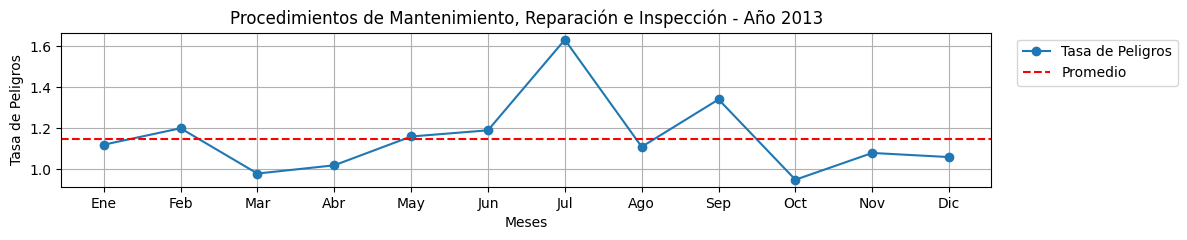

In [ ]:
#Obtener meses y tasas de peligros desde --> tabla5_2013
#Crear gráfico --> Diagrama PMRI 2013
meses_2013 = tabla5_2013['Mes']
tasas_peligros_2013 = tabla5_2013['Tasa de Peligros'].astype(float)
promedio_tasa_peligros_2013 = float(tabla5_2013['Promedio'][0])

plt.figure(figsize=(12, 2))
plt.plot(meses_2013, tasas_peligros_2013, marker='o', label='Tasa de Peligros')
plt.axhline(y=promedio_tasa_peligros_2013, color='r', linestyle='--', label='Promedio')
plt.xlabel('Meses')
plt.ylabel('Tasa de Peligros')
plt.title('Procedimientos de Mantenimiento, Reparación e Inspección - Año 2013')
plt.legend()
plt.legend(loc='upper right', bbox_to_anchor=(1.208, 1))
plt.grid(True)
plt.show()

b. Comportamiento del Indicador en el Tiempo: Diagrama de los Indicadores-->**2014-2022**

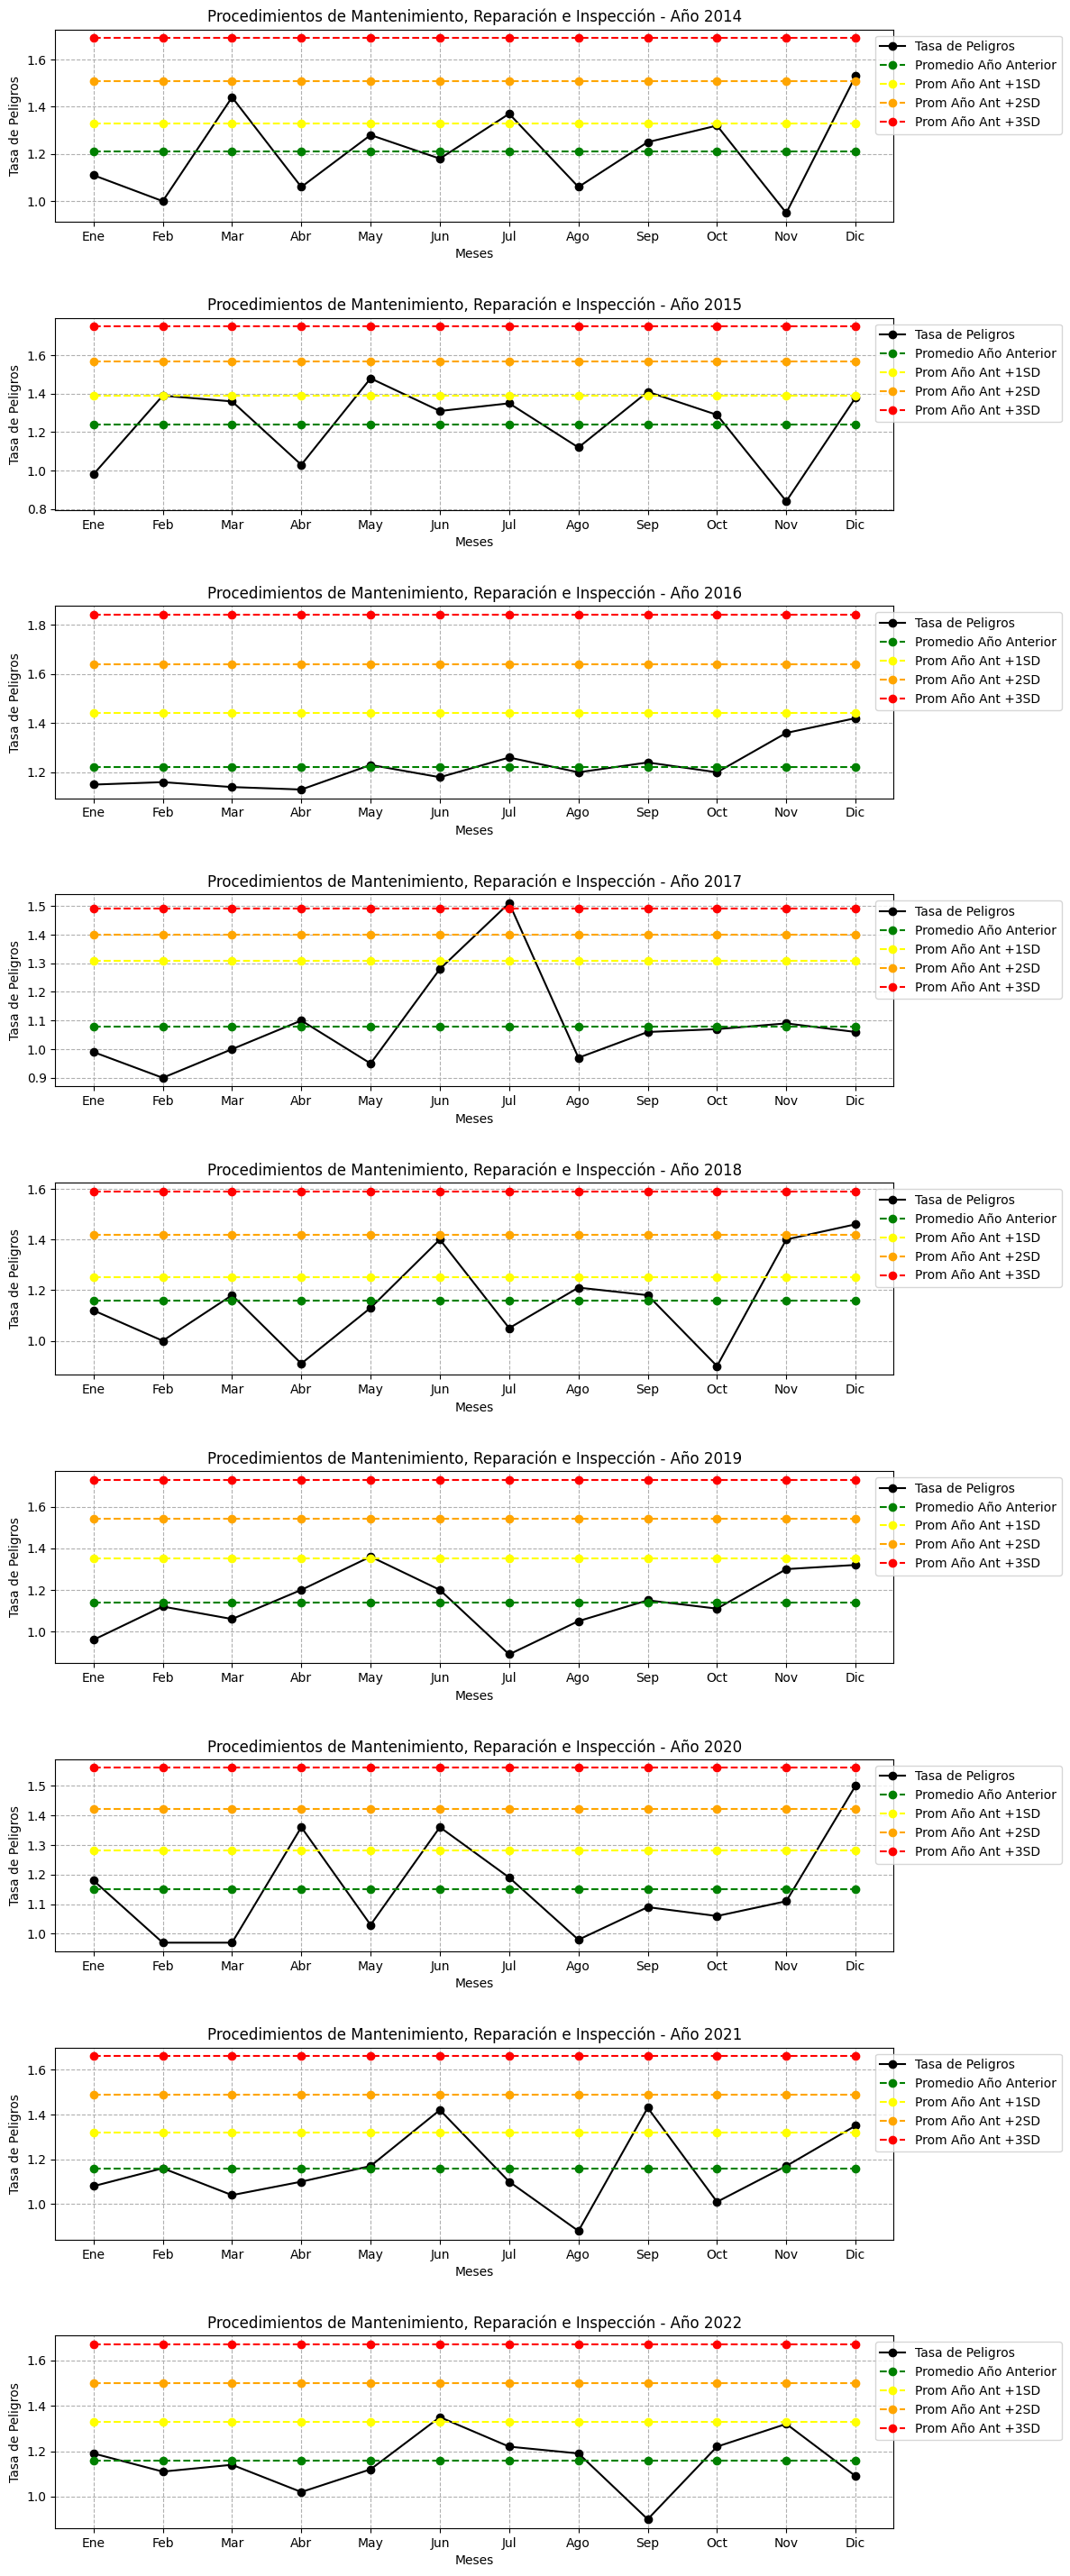

In [ ]:
#Crear diccionario con tablas de datos
#Iterar a través de tablas y crear gráficos
#Extraer datos necesarios para el gráfico
#Crear gráfico --> Diagrama de Indicador (Procedimientos de Mantenimiento, Reparación e Inspección) PMRI 2014-2022
tablas = {
    '2014': tabla6_2014,
    '2015': tabla7_2015,
    '2016': tabla8_2016,
    '2017': tabla9_2017,
    '2018': tabla10_2018,
    '2019': tabla11_2019,
    '2020': tabla12_2020,
    '2021': tabla13_2021,
    '2022': tabla14_2022
}

fig, axs = plt.subplots(nrows=len(tablas), ncols=1, figsize=(12, 4 * len(tablas)))
plt.subplots_adjust(hspace=0.5)

for i, (anio, tabla) in enumerate(tablas.items()):
    ax = axs[i]

    meses = tabla['Mes']
    tasa_peligros = tabla['Tasa de Peligros'].astype(float)
    prom_anio_anterior = tabla['Promedio'].astype(float)
    prom_anio_ant_1sd = tabla['Prom Año Ant +1SD'].astype(float)
    prom_anio_ant_2sd = tabla['Prom Año Ant +2SD'].astype(float)
    prom_anio_ant_3sd = tabla['Prom Año Ant +3SD'].astype(float)

    ax.plot(meses, tasa_peligros, label='Tasa de Peligros', marker='o', color='black')
    ax.plot(meses, prom_anio_anterior, label='Promedio Año Anterior', linestyle='--', marker='o', color='green')
    ax.plot(meses, prom_anio_ant_1sd, label='Prom Año Ant +1SD', linestyle='--', marker='o', color='yellow')
    ax.plot(meses, prom_anio_ant_2sd, label='Prom Año Ant +2SD', linestyle='--', marker='o', color='orange')
    ax.plot(meses, prom_anio_ant_3sd, label='Prom Año Ant +3SD', linestyle='--', marker='o', color='red')

    ax.set_title(f'Procedimientos de Mantenimiento, Reparación e Inspección - Año {anio}')
    ax.set_xlabel('Meses')
    ax.set_ylabel('Tasa de Peligros')
    ax.legend(loc='upper right', bbox_to_anchor=(1.208, 1))
    ax.grid(True, linestyle='--')

plt.show()

C.1.2 Desarrollo de Diagrama de Indicador de Rendimiento de S.O. --> **(Prueba de Vuelo y Operacional)**

*   2013-->Año (Inicial) de referencia
*   2014-2022-->Comportamiento del Indicador en el Tiempo

a. Año (Inicial) de referencia: Diagrama del Indicador --> 2013

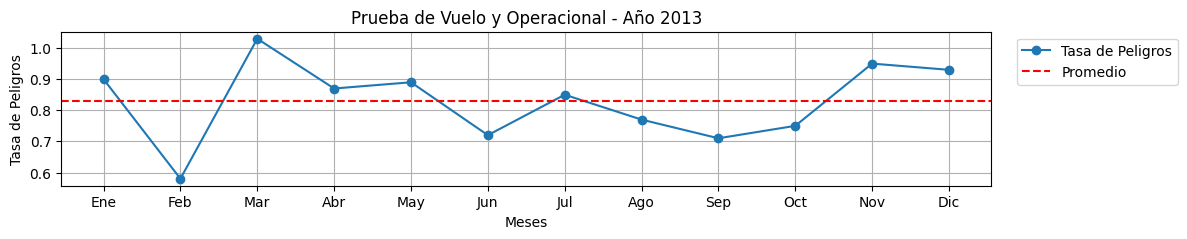

In [ ]:
#Obtener meses y tasas de peligros desde --> tabla1_pvops_2013
#Crear gráfico --> Diagrama PVOPS 2013
meses_2013 = tabla1_pvops_2013['Mes']
tasa_peligros_pvops_2013 = tabla1_pvops_2013['Tasa de Peligros'].astype(float)
promedio_tasa_peligros_pvops_2013 = float(tabla1_pvops_2013['Promedio'][0])

plt.figure(figsize=(12, 2))
plt.plot(meses_2013, tasa_peligros_pvops_2013, marker='o', label='Tasa de Peligros')
plt.axhline(y=promedio_tasa_peligros_pvops_2013, color='r', linestyle='--', label='Promedio')
plt.xlabel('Meses')
plt.ylabel('Tasa de Peligros')
plt.title('Prueba de Vuelo y Operacional - Año 2013')
plt.legend()
plt.legend(loc='upper right', bbox_to_anchor=(1.208, 1))
plt.grid(True)
plt.show()

b. Comportamiento del Indicador en el Tiempo: Diagrama de los Indicadores-->**2014-2022**

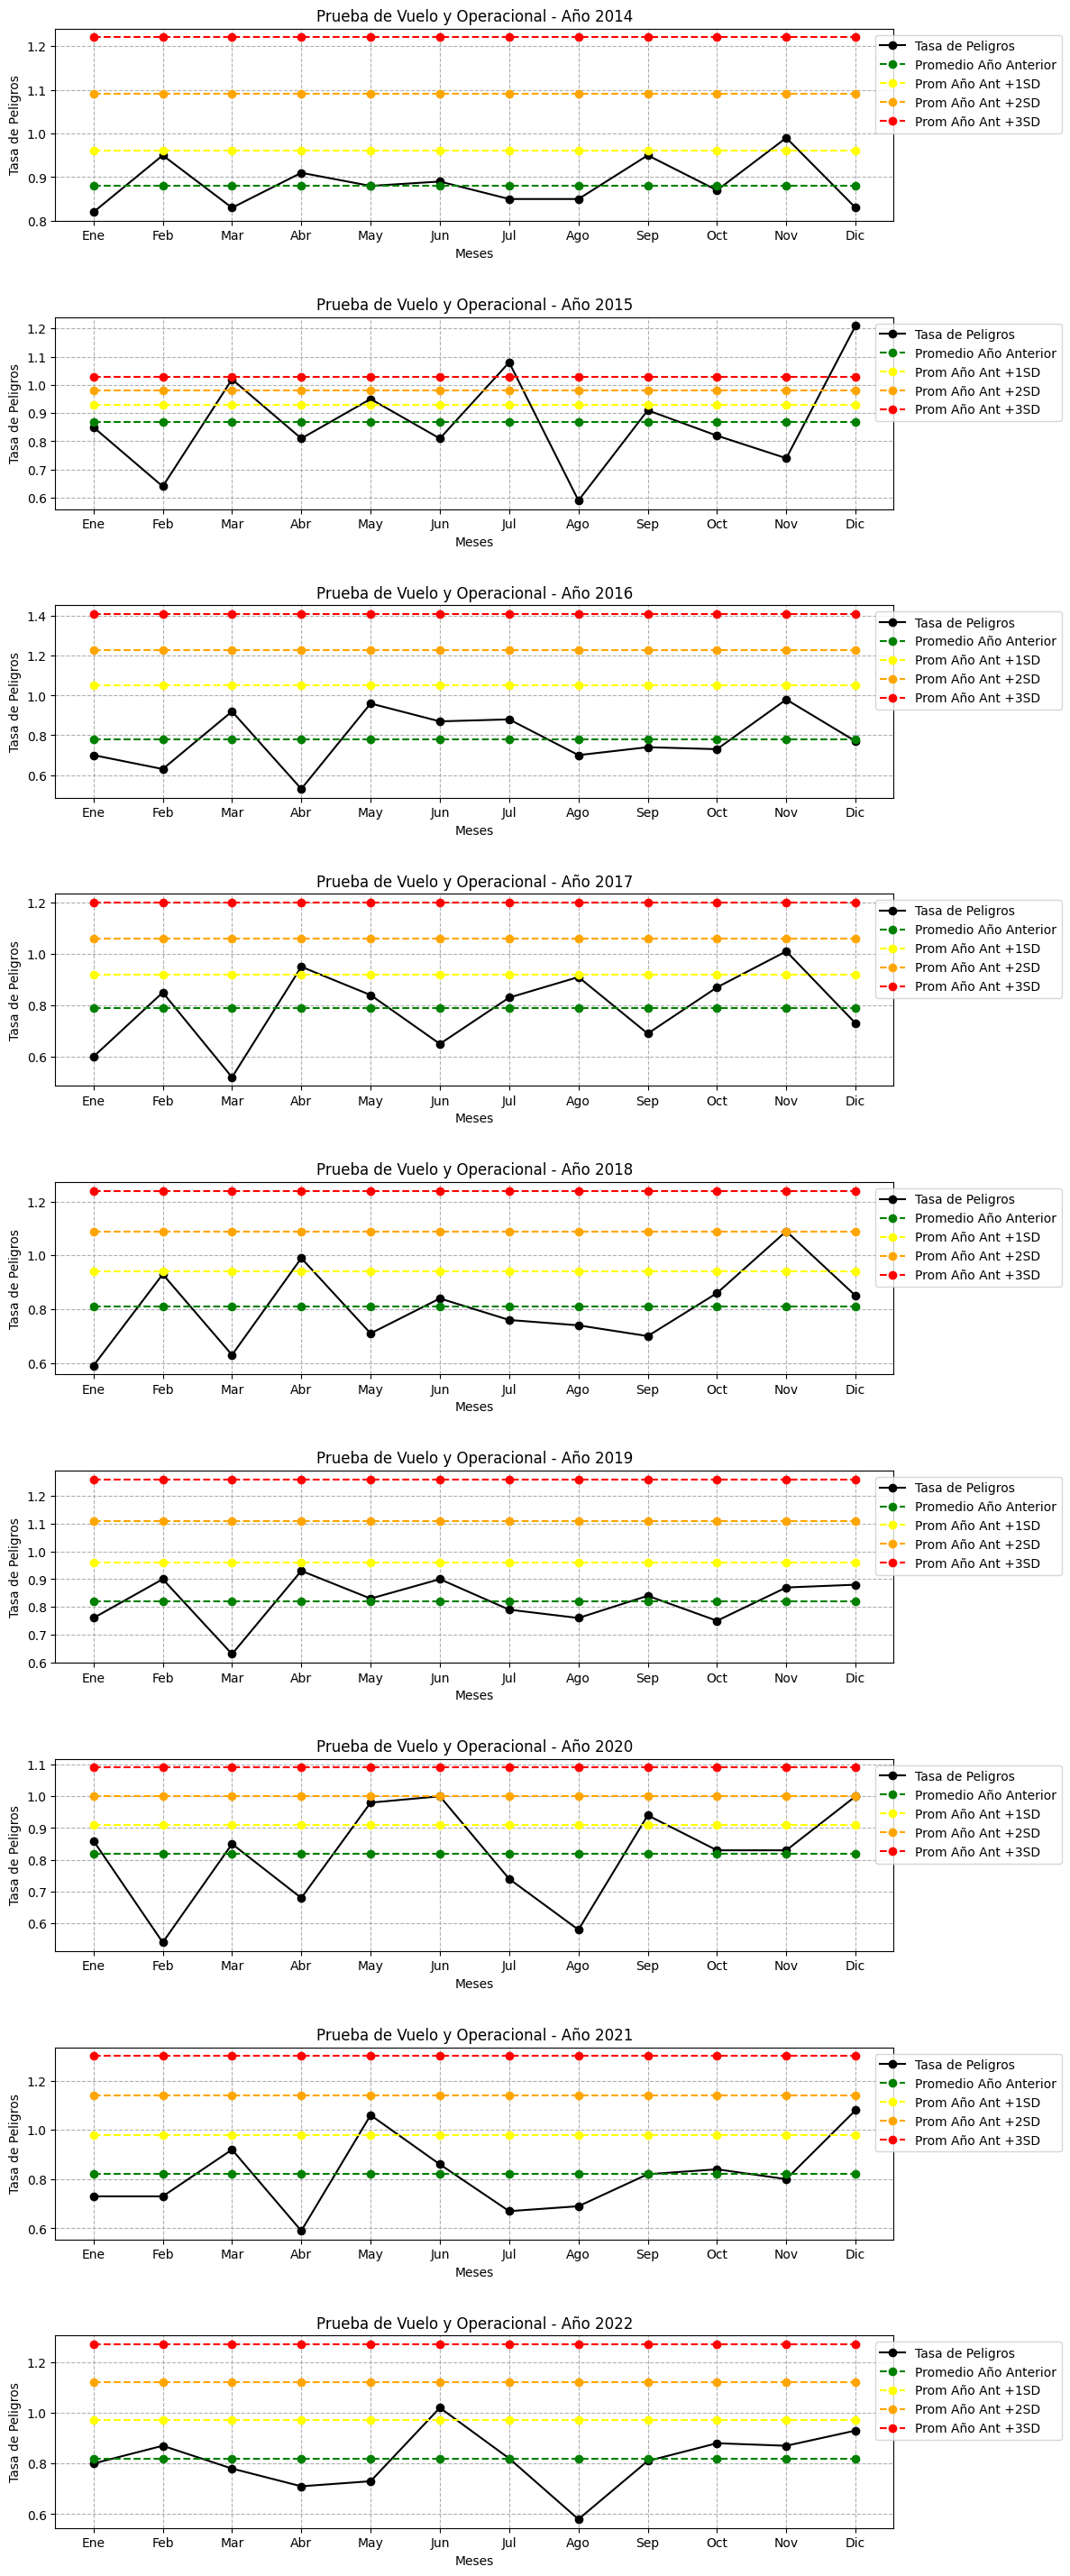

In [ ]:
#Crear diccionario con tablas de datos
#Iterar a través de tablas y crear gráficos
#Extraer datos necesarios para el gráfico
#Crear gráfico --> Diagrama de Indicador (Procedimientos de Mantenimiento, Reparación e Inspección) PVOPS 2014-2022
tablas = {
    '2014': tabla2_2014,
    '2015': tabla3_2015,
    '2016': tabla4_2016,
    '2017': tabla5_2017,
    '2018': tabla6_2018,
    '2019': tabla7_2019,
    '2020': tabla8_2020,
    '2021': tabla9_2021,
    '2022': tabla10_2022
}

fig, axs = plt.subplots(nrows=len(tablas), ncols=1, figsize=(12, 4 * len(tablas)))
plt.subplots_adjust(hspace=0.5)

for i, (anio, tabla) in enumerate(tablas.items()):
    ax = axs[i]

    meses = tabla['Mes']
    tasa_peligros = tabla['Tasa de Peligros'].astype(float)
    prom_anio_anterior = tabla['Promedio'].astype(float)
    prom_anio_ant_1sd = tabla['Prom Año Ant +1SD'].astype(float)
    prom_anio_ant_2sd = tabla['Prom Año Ant +2SD'].astype(float)
    prom_anio_ant_3sd = tabla['Prom Año Ant +3SD'].astype(float)

    ax.plot(meses, tasa_peligros, label='Tasa de Peligros', marker='o', color='black')
    ax.plot(meses, prom_anio_anterior, label='Promedio Año Anterior', linestyle='--', marker='o', color='green')
    ax.plot(meses, prom_anio_ant_1sd, label='Prom Año Ant +1SD', linestyle='--', marker='o', color='yellow')
    ax.plot(meses, prom_anio_ant_2sd, label='Prom Año Ant +2SD', linestyle='--', marker='o', color='orange')
    ax.plot(meses, prom_anio_ant_3sd, label='Prom Año Ant +3SD', linestyle='--', marker='o', color='red')

    ax.set_title(f'Prueba de Vuelo y Operacional - Año {anio}')
    ax.set_xlabel('Meses')
    ax.set_ylabel('Tasa de Peligros')
    ax.legend(loc='upper right', bbox_to_anchor=(1.208, 1))
    ax.grid(True, linestyle='--')

plt.show()

C.1.3 Desarrollo de Diagrama de Indicador de Rendimiento de S.O. --> **(Control Calidad e Inspección)**

*   2013-->Año (Inicial) de referencia
*   2014-2022-->Comportamiento del Indicador en el Tiempo

a. Año (Inicial) de referencia: Diagrama del Indicador --> 2013

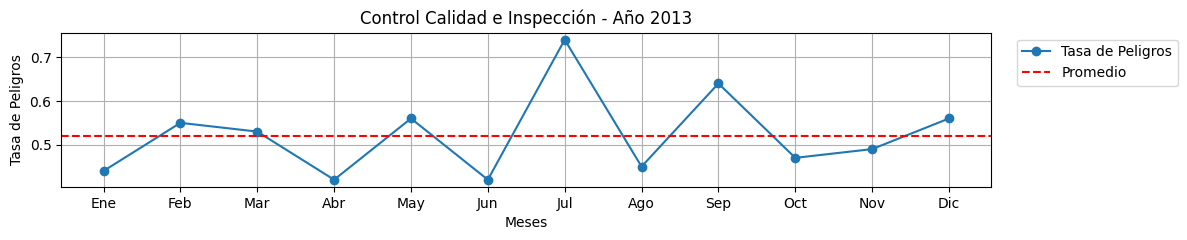

In [ ]:
#Obtener meses y tasas de peligros desde --> tabla1_cci_2013
#Crear gráfico --> Diagrama CCI 2013
meses_2013 = tabla1_cci_2013['Mes']
tasa_peligros_cci_2013 = tabla1_cci_2013['Tasa de Peligros'].astype(float)
promedio_tasa_peligros_cci_2013 = float(tabla1_cci_2013['Promedio'][0])

plt.figure(figsize=(12, 2))
plt.plot(meses_2013, tasa_peligros_cci_2013, marker='o', label='Tasa de Peligros')
plt.axhline(y=promedio_tasa_peligros_cci_2013, color='r', linestyle='--', label='Promedio')
plt.xlabel('Meses')
plt.ylabel('Tasa de Peligros')
plt.title('Control Calidad e Inspección - Año 2013')
plt.legend()
plt.legend(loc='upper right', bbox_to_anchor=(1.208, 1))
plt.grid(True)
plt.show()

b. Comportamiento del Indicador en el Tiempo: Diagrama de los Indicadores-->2014-2022

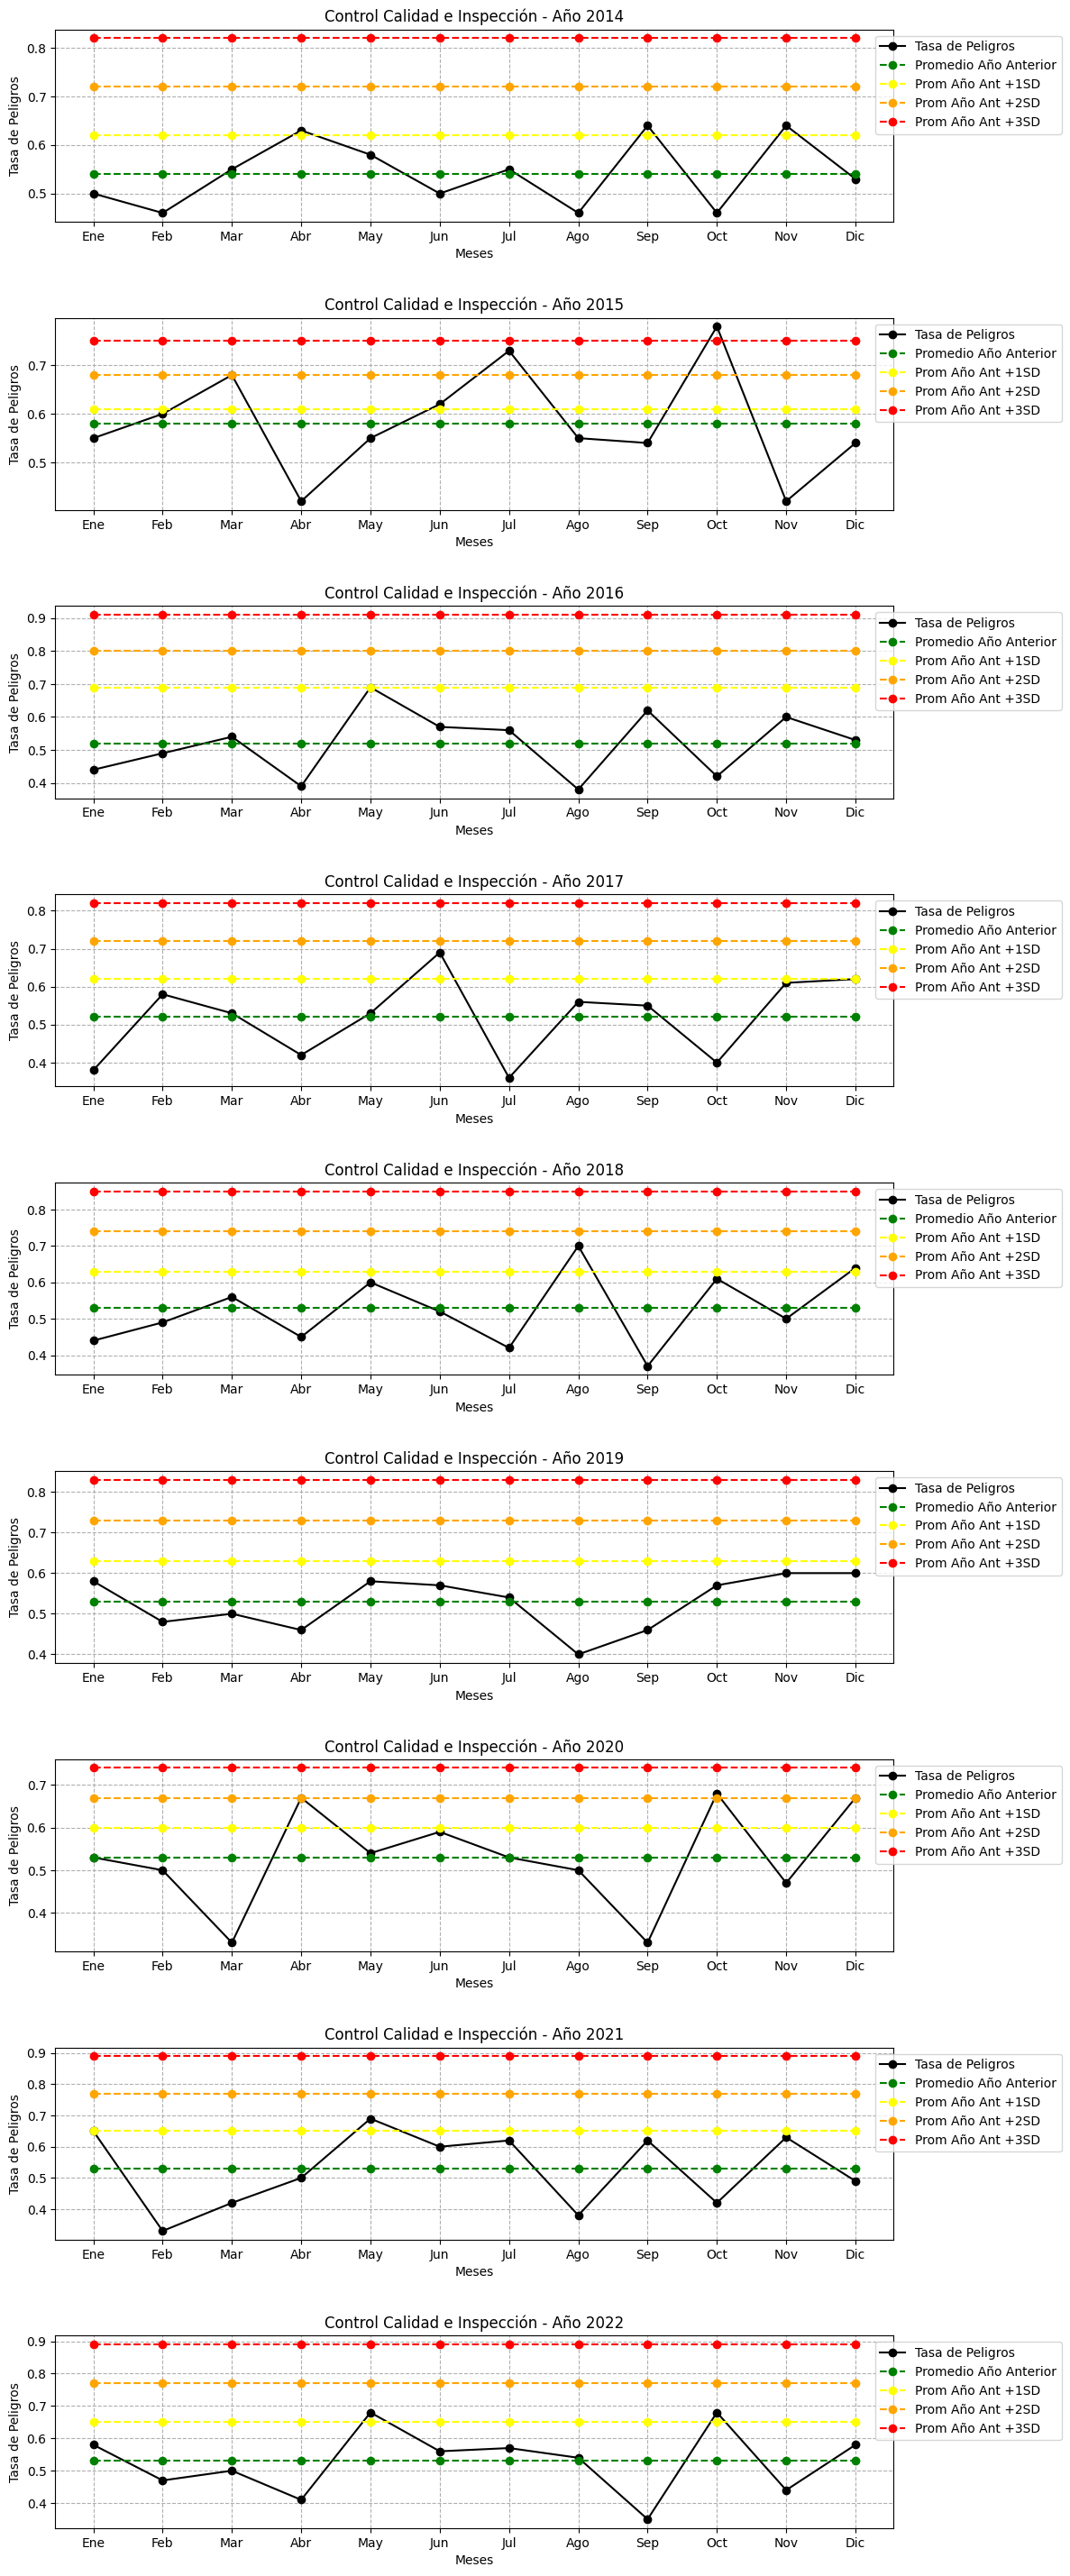

In [ ]:
#Crear diccionario con tablas de datos
#Iterar a través de tablas y crear gráficos
#Extraer datos necesarios para el gráfico
#Crear gráfico --> Diagrama de Indicador (Control Calidad e Inspección) CCI 2014-2022
tablas = {
    '2014': tabla2_cci_2014,
    '2015': tabla3_cci_2015,
    '2016': tabla4_cci_2016,
    '2017': tabla5_cci_2017,
    '2018': tabla6_cci_2018,
    '2019': tabla7_cci_2019,
    '2020': tabla8_cci_2020,
    '2021': tabla9_cci_2021,
    '2022': tabla10_cci_2022
}

fig, axs = plt.subplots(nrows=len(tablas), ncols=1, figsize=(12, 4 * len(tablas)))
plt.subplots_adjust(hspace=0.5)

for i, (anio, tabla) in enumerate(tablas.items()):
    ax = axs[i]

    meses = tabla['Mes']
    tasa_peligros = tabla['Tasa de Peligros'].astype(float)
    prom_anio_anterior = tabla['Promedio'].astype(float)
    prom_anio_ant_1sd = tabla['Prom Año Ant +1SD'].astype(float)
    prom_anio_ant_2sd = tabla['Prom Año Ant +2SD'].astype(float)
    prom_anio_ant_3sd = tabla['Prom Año Ant +3SD'].astype(float)

    ax.plot(meses, tasa_peligros, label='Tasa de Peligros', marker='o', color='black')
    ax.plot(meses, prom_anio_anterior, label='Promedio Año Anterior', linestyle='--', marker='o', color='green')
    ax.plot(meses, prom_anio_ant_1sd, label='Prom Año Ant +1SD', linestyle='--', marker='o', color='yellow')
    ax.plot(meses, prom_anio_ant_2sd, label='Prom Año Ant +2SD', linestyle='--', marker='o', color='orange')
    ax.plot(meses, prom_anio_ant_3sd, label='Prom Año Ant +3SD', linestyle='--', marker='o', color='red')

    ax.set_title(f'Control Calidad e Inspección - Año {anio}')
    ax.set_xlabel('Meses')
    ax.set_ylabel('Tasa de Peligros')
    ax.legend(loc='upper right', bbox_to_anchor=(1.208, 1))
    ax.grid(True, linestyle='--')

plt.show()

D. **Concatenar** todas las tablas en un solo dataset --> **tabla_datos**

D.1 Crear para cada Tabla de Datos: Columna --> Año

In [ ]:
#Lista de las tablas que deseas modificar
#Agregar la columna "Año" a cada tabla
#Mostrar una tabla de ejemplo para verificar los cambios
tablas = [tabla6_2014, tabla7_2015, tabla8_2016, tabla9_2017, tabla10_2018, tabla11_2019, tabla12_2020, tabla13_2021, tabla14_2022,
          tabla2_cci_2014, tabla3_cci_2015, tabla4_cci_2016, tabla5_cci_2017, tabla6_cci_2018, tabla7_cci_2019, tabla8_cci_2020, tabla9_cci_2021, tabla10_cci_2022,
          tabla2_2014, tabla3_2015, tabla4_2016, tabla5_2017, tabla6_2018, tabla7_2019, tabla8_2020, tabla9_2021, tabla10_2022]

for tabla in tablas:
    year = int(tabla.name.split()[-1])
    tabla.insert(0, 'Año', year)

print(tabla6_2014)

     Año  Mes HHT Total Peligros Total Tasa de Peligros Promedio  \
0   2014  Ene  52280.50          58.00             1.11     1.21   
1   2014  Feb  52042.17          52.00             1.00     1.21   
2   2014  Mar  52236.08          75.00             1.44     1.21   
3   2014  Abr  51868.71          55.00             1.06     1.21   
4   2014  May  53177.04          68.00             1.28     1.21   
5   2014  Jun  51542.33          61.00             1.18     1.21   
6   2014  Jul  52655.92          72.00             1.37     1.21   
7   2014  Ago  52063.92          55.00             1.06     1.21   
8   2014  Sep  51940.46          65.00             1.25     1.21   
9   2014  Oct  52390.88          69.00             1.32     1.21   
10  2014  Nov  52676.50          50.00             0.95     1.21   
11  2014  Dic  51716.17          79.00             1.53     1.21   

   Prom Año Ant +1SD Prom Año Ant +2SD Prom Año Ant +3SD Objetivo 2014  
0               1.33              1.51    

In [ ]:
#Concatenar todas las tablas en un solo DataFrame --> tablas_datos
tablas = [tabla6_2014, tabla7_2015, tabla8_2016, tabla9_2017, tabla10_2018, tabla11_2019, tabla12_2020, tabla13_2021, tabla14_2022,
          tabla2_cci_2014, tabla3_cci_2015, tabla4_cci_2016, tabla5_cci_2017, tabla6_cci_2018, tabla7_cci_2019, tabla8_cci_2020, tabla9_cci_2021, tabla10_cci_2022,
          tabla2_2014, tabla3_2015, tabla4_2016, tabla5_2017, tabla6_2018, tabla7_2019, tabla8_2020, tabla9_2021, tabla10_2022]

tablas_datos = pd.concat(tablas, ignore_index=True)
tablas_datos


,Año,Mes,HHT Total,Peligros Total,Tasa de Peligros,Promedio,Prom Año Ant +1SD,Prom Año Ant +2SD,Prom Año Ant +3SD,Objetivo 2014,Objetivo 2015,Objetivo 2016,Objetivo 2017,Objetivo 2018,Objetivo 2019,Objetivo 2020,Objetivo 2021,Objetivo 2022
0,2014,Ene,52280.50,58.00,1.11,1.21,1.33,1.51,1.69,1.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,Feb,52042.17,52.00,1.00,1.21,1.33,1.51,1.69,1.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,Mar,52236.08,75.00,1.44,1.21,1.33,1.51,1.69,1.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,Abr,51868.71,55.00,1.06,1.21,1.33,1.51,1.69,1.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,May,53177.04,68.00,1.28,1.21,1.33,1.51,1.69,1.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,2022,Ago,52044.18,30.00,0.58,0.82,0.97,1.12,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.78
320,2022,Sep,51981.94,42.00,0.81,0.82,0.97,1.12,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.78
321,2022,Oct,52139.71,46.00,0.88,0.82,0.97,1.12,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.78
322,2022,Nov,51941.76,45.00,0.87,0.82,0.97,1.12,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.78


In [ ]:
# Lista de nombres de columnas a eliminar
columnas_a_eliminar = [f'Objetivo {anio}' for anio in range(2014, 2023)]

# Eliminar las columnas
tablas_datos = tablas_datos.drop(columns=columnas_a_eliminar)

In [ ]:
#Imprimir nombres de columnas con # índice
for i, columna in enumerate(tablas_datos.columns):
    print(f'Columna {i}: {columna}')

Columna 0: Año
Columna 1: Mes
Columna 2: HHT Total
Columna 3: Peligros Total
Columna 4: Tasa de Peligros
Columna 5: Promedio
Columna 6: Prom Año Ant +1SD
Columna 7: Prom Año Ant +2SD
Columna 8: Prom Año Ant +3SD


2. **Pre-Procesamiento de los Datos**

2.1 Partición del dataset en los subsets de entrenamiento, validación y prueba



In [ ]:
#Craer función --> entrenamiento, validación y prueba
#Definir número de datos en cada subserie
#Realizar partición
def train_val_test_split(serie, tr_size=0.8, vl_size=0.1, ts_size=0.1):

    N = serie.shape[0]
    Ntrain = int(tr_size * N)
    Nval = int(vl_size * N)
    Ntst = N - Ntrain - Nval

    train = serie[0:Ntrain]
    val = serie[Ntrain:Ntrain + Nval]
    test = serie[Ntrain + Nval:]

    return train, val, test

In [ ]:
#Imprimir tamaño de cada subset (train, val, test)
#Seleccionar Columna --> Tasa de Peligros
tr, vl, ts = train_val_test_split(tablas_datos['Tasa de Peligros'])
print(f'Tamaño set de entrenamiento: {tr.shape}')
print(f'Tamaño set de validación: {vl.shape}')
print(f'Tamaño set de prueba: {ts.shape}')

Tamaño set de entrenamiento: (259,)
Tamaño set de validación: (32,)
Tamaño set de prueba: (33,)


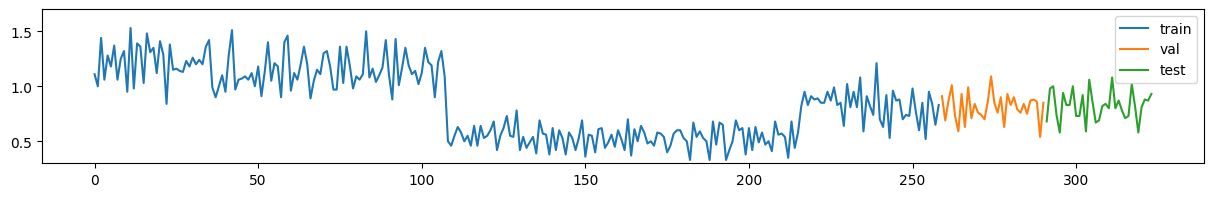

In [ ]:
#Visualización (train, val, test)
tr = tr.astype(float)
vl = vl.astype(float)
ts = ts.astype(float)
fig, ax = plt.subplots(figsize=(15, 2))
ax.plot(tr, label='train')
ax.plot(vl, label='val')
ax.plot(ts, label='test')
plt.legend()
ax.set_ylim(0.3, 1.7)
plt.show()

2.2 Generación del dataset supervisado (entradas y salidas del modelo)



In [ ]:
def crear_dataset_supervisado(array, input_length, output_length):

    # Inicialización
    X, Y = [], []    # Listados que contendrán los datos de entrada y salida del modelo
    shape = array.shape
    if len(shape)==1: # Si tenemos sólo una serie (univariado)
        fils, cols = array.shape[0], 1
        array = array.reshape(fils,cols)
    else: # Multivariado
        fils, cols = array.shape

    # Generar los arreglos
    for i in range(fils-input_length-output_length):
        X.append(array[i:i+INPUT_LENGTH,0:cols])
        Y.append(array[i+input_length:i+input_length+output_length,-1].reshape(output_length,1))

    # Convertir listas a arreglos de NumPy
    X = np.array(X)
    Y = np.array(Y)

    return X, Y

In [ ]:
#Definición --> Hiperparámetros INPUT_LENGTH y OUTPUT_LENGTH
#Datasets supervisados para entrenamiento --> (x_tr, y_tr), validación (x_vl, y_vl) y prueba (x_ts, y_ts)
INPUT_LENGTH = 12    # Registros de 12 meses consecutivos a la entrada
OUTPUT_LENGTH = 12    # El modelo va a predecir 12 meses a futuro --> Año 2023

x_tr, y_tr = crear_dataset_supervisado(tr.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_vl, y_vl = crear_dataset_supervisado(vl.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_ts, y_ts = crear_dataset_supervisado(ts.values, INPUT_LENGTH, OUTPUT_LENGTH)

In [ ]:
print('Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)')
print(f'Set de entrenamiento - x_tr: {x_tr.shape}, y_tr: {y_tr.shape}')
print(f'Set de validación - x_vl: {x_vl.shape}, y_vl: {y_vl.shape}')
print(f'Set de prueba - x_ts: {x_ts.shape}, y_ts: {y_ts.shape}')

Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)
Set de entrenamiento - x_tr: (235, 12, 1), y_tr: (235, 12, 1)
Set de validación - x_vl: (8, 12, 1), y_vl: (8, 12, 1)
Set de prueba - x_ts: (9, 12, 1), y_ts: (9, 12, 1)


2.3 Escalamiento de los datos

In [ ]:
#Generar listado con (scalers) --> En este escenario: 1 escalador<-->1 característica
#Definir los Arrays que contendrán datasets escalados
#min/max set de entrenamiento --> escalar la totalidad de los datasets
#Definir un dicc de salida
#Crear dicc de entrada
#Realizar verificación de escalamiento de datos
from sklearn.preprocessing import MinMaxScaler

def escalar_dataset(data_input):
    NFEATS = data_input['x_tr'].shape[2]

    scalers = [MinMaxScaler(feature_range=(-1,1)) for i in range(NFEATS)]

    x_tr_s = np.zeros(data_input['x_tr'].shape)
    x_vl_s = np.zeros(data_input['x_vl'].shape)
    x_ts_s = np.zeros(data_input['x_ts'].shape)
    y_tr_s = np.zeros(data_input['y_tr'].shape)
    y_vl_s = np.zeros(data_input['y_vl'].shape)
    y_ts_s = np.zeros(data_input['y_ts'].shape)

    for i in range(NFEATS):
        x_tr_s[:,:,i] = scalers[i].fit_transform(x_tr[:,:,i])
        x_vl_s[:,:,i] = scalers[i].transform(x_vl[:,:,i])
        x_ts_s[:,:,i] = scalers[i].transform(x_ts[:,:,i])

    y_tr_s[:,:,0] = scalers[-1].fit_transform(y_tr[:,:,0])
    y_vl_s[:,:,0] = scalers[-1].transform(y_vl[:,:,0])
    y_ts_s[:,:,0] = scalers[-1].transform(y_ts[:,:,0])

    data_scaled = {
        'x_tr_s': x_tr_s, 'y_tr_s': y_tr_s,
        'x_vl_s': x_vl_s, 'y_vl_s': y_vl_s,
        'x_ts_s': x_ts_s, 'y_ts_s': y_ts_s,
    }

    return data_scaled, scalers[0]

In [ ]:
data_in = {
    'x_tr': x_tr, 'y_tr': y_tr,
    'x_vl': x_vl, 'y_vl': y_vl,
    'x_ts': x_ts, 'y_ts': y_ts,
}

In [ ]:
data_s, scaler = escalar_dataset(data_in)

In [ ]:
x_tr_s, y_tr_s = data_s['x_tr_s'], data_s['y_tr_s']
x_vl_s, y_vl_s = data_s['x_vl_s'], data_s['y_vl_s']
x_ts_s, y_ts_s = data_s['x_ts_s'], data_s['y_ts_s']

In [ ]:
print(f'Min x_tr/x_vl/x_ts sin escalamiento: {x_tr.min()}/{x_vl.min()}/{x_ts.min()}')
print(f'Min x_tr/x_vl/x_ts con escalamiento: {x_tr_s.min()}/{x_vl_s.min()}/{x_ts_s.min()}')

print(f'\nMin y_tr/y_vl/y_ts sin escalamiento: {y_tr.min()}/{y_vl.min()}/{y_ts.min()}')
print(f'Min y_tr/y_vl/y_ts con escalamiento: {y_tr_s.min()}/{y_vl_s.min()}/{y_ts_s.min()}')

print(f'\nMax x_tr/x_vl/x_ts sin escalamiento: {x_tr.max()}/{x_vl.max()}/{x_ts.max()}')
print(f'Max x_tr/x_vl/x_ts con escalamiento: {x_tr_s.max()}/{x_vl_s.max()}/{x_ts_s.max()}')

print(f'\nMax y_tr/y_vl/y_ts sin escalamiento: {y_tr.max()}/{y_vl.max()}/{y_ts.max()}')
print(f'Max y_tr/y_vl/y_ts con escalamiento: {y_tr_s.max()}/{y_vl_s.max()}/{y_ts_s.max()}')

Min x_tr/x_vl/x_ts sin escalamiento: 0.33/0.59/0.58
Min x_tr/x_vl/x_ts con escalamiento: -1.0/-0.5666666666666668/-0.5833333333333334

Min y_tr/y_vl/y_ts sin escalamiento: 0.33/0.54/0.58
Min y_tr/y_vl/y_ts con escalamiento: -1.0/-0.6440677966101694/-0.576271186440678

Max x_tr/x_vl/x_ts sin escalamiento: 1.53/1.09/1.06
Max x_tr/x_vl/x_ts con escalamiento: 1.0000000000000002/0.26666666666666683/0.21666666666666679

Max y_tr/y_vl/y_ts sin escalamiento: 1.51/1.09/1.08
Max y_tr/y_vl/y_ts con escalamiento: 1.0000000000000002/0.2881355932203393/0.27118644067796627


3. Creación y Entrenamiento --> **Modelo LSTM**

In [ ]:
#Crear Modelo --> LSTM
#Ajustar parámetros para reproducibilidad del entrenamiento
#Definir Hiperparámetro N_UNITS --> Número de Neuronas en capa LSTM
#Encontrar Pérdida --> RMSE en entrenamiento
#Realizar Compilación
#Realizar Entrenamiento --> Validar GPU
#Establecer Hiperparámetros --> Learning rate, EPOCH:Iteraciones, BATCH SIZE:Lotes
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop

tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()
N_UNITS = 128
INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2])
modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE))
modelo.add(Dense(OUTPUT_LENGTH, activation='linear'))

def root_mean_squared_error(y_true, y_pred):
    rmse = tf.math.sqrt(tf.math.reduce_mean(tf.square(y_pred-y_true)))
    return rmse

optimizador = RMSprop(learning_rate=1e-2)
modelo.compile(
    optimizer = optimizador,
    loss = root_mean_squared_error,
)

EPOCHS = 100
BATCH_SIZE = 130
historia = modelo.fit(
    x = x_tr_s,
    y = y_tr_s,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = (x_vl_s, y_vl_s),
    verbose=2
)

Epoch 1/100
2/2 - 2s - loss: 0.4734 - val_loss: 1.7562 - 2s/epoch - 1s/step
Epoch 2/100
2/2 - 0s - loss: 1.1239 - val_loss: 0.2292 - 88ms/epoch - 44ms/step
Epoch 3/100
2/2 - 0s - loss: 0.4719 - val_loss: 0.1875 - 93ms/epoch - 47ms/step
Epoch 4/100
2/2 - 0s - loss: 0.4438 - val_loss: 0.2740 - 92ms/epoch - 46ms/step
Epoch 5/100
2/2 - 0s - loss: 0.3762 - val_loss: 0.3420 - 89ms/epoch - 45ms/step
Epoch 6/100
2/2 - 0s - loss: 0.3595 - val_loss: 0.2018 - 99ms/epoch - 49ms/step
Epoch 7/100
2/2 - 0s - loss: 0.3280 - val_loss: 0.2181 - 65ms/epoch - 32ms/step
Epoch 8/100
2/2 - 0s - loss: 0.3302 - val_loss: 0.2207 - 60ms/epoch - 30ms/step
Epoch 9/100
2/2 - 0s - loss: 0.3547 - val_loss: 0.2198 - 55ms/epoch - 28ms/step
Epoch 10/100
2/2 - 0s - loss: 0.3236 - val_loss: 0.2228 - 56ms/epoch - 28ms/step
Epoch 11/100
2/2 - 0s - loss: 0.3191 - val_loss: 0.2026 - 57ms/epoch - 28ms/step
Epoch 12/100
2/2 - 0s - loss: 0.3249 - val_loss: 0.3432 - 58ms/epoch - 29ms/step
Epoch 13/100
2/2 - 0s - loss: 0.4363 - va

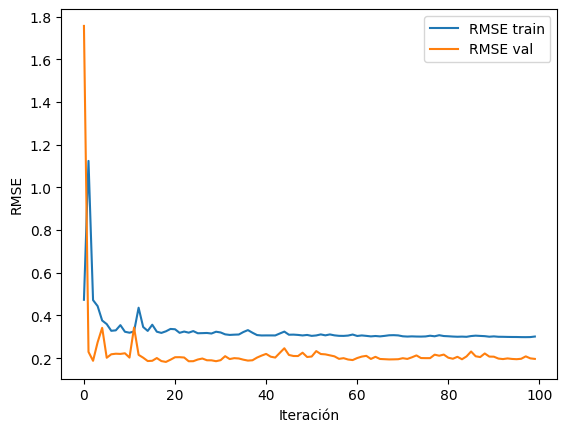

In [ ]:
#Graficar curvas de train y val --> Verificar: Overfitting
plt.plot(historia.history['loss'],label='RMSE train')
plt.plot(historia.history['val_loss'],label='RMSE val')
plt.xlabel('Iteración')
plt.ylabel('RMSE')
plt.legend();

4. Medición --> **Performance del Modelo**

4.1 Validar Performance --> Conjunto de Datos: test

-Validar Performance:
*   train
*   val





In [ ]:
#Cálcular Error Cuadrático Medio (RMSE) --> train / val / test
rmse_tr = modelo.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl = modelo.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts = modelo.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

print('Comparativo Performance:')
print(f'  RMSE train:\t {rmse_tr:.3f}')
print(f'  RMSE val:\t {rmse_vl:.3f}')
print(f'  RMSE test:\t {rmse_ts:.3f}')

Comparativo Performance:
  RMSE train:	 0.289
  RMSE val:	 0.196
  RMSE test:	 0.223


4.2 Analizar comportamiento del error (predicciones)
*   Predicción --> 12 meses
*   Conjunto de datos (test) --> predicción totalidad de datos
*   RMSE --> Gráfico

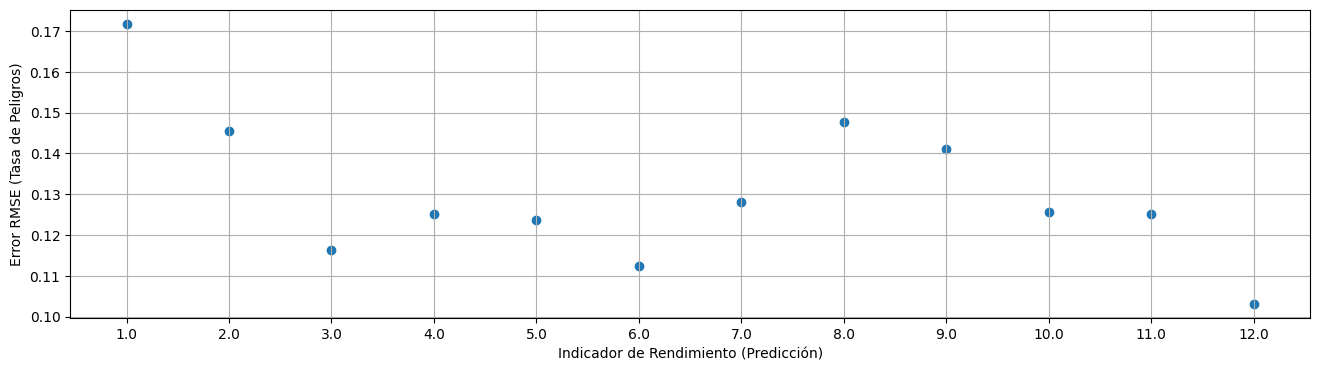

In [ ]:
#Predicción --> Conjunto (test)
#Transformación (inversa) de predicción --> valores (escala original)
#Calcular --> RMSE c/timestep (predicción)
y_ts_pred_s = modelo.predict(x_ts_s, verbose=0)
y_ts_pred = scaler.inverse_transform(y_ts_pred_s)
diff_cuad = np.square(y_ts.squeeze()-y_ts_pred)
proms = np.mean(diff_cuad, axis=0)
rmse = np.sqrt(proms)
t = np.linspace(1,12,12)

fig, ax = plt.subplots(figsize=(16, 4))
ax.scatter(t,rmse)
ax.set_xlabel('Indicador de Rendimiento (Predicción)')
ax.set_ylabel('Error RMSE (Tasa de Peligros)')
plt.xticks(ticks=t, labels=t)
plt.grid();

5. Predicción --> **Modelo Entrenado**

In [ ]:
#Información de indicadores de rendimiento 12 meses
#Escala (rango de -1 a 1) --> var x
#Modelo entrenado --> var model
#Esacalador --> var scaler
#Calcular predicción escala --> rango (-1 a 1)
#Predicción en escala original
def predecir(x, model, scaler):

    y_pred_s = model.predict(x,verbose=0)
    y_pred = scaler.inverse_transform(y_pred_s)

    return y_pred.flatten()

In [ ]:
#Calcular predicciones --> Conjunto de datos (test)
y_ts_pred = predecir(x_ts_s, modelo, scaler)

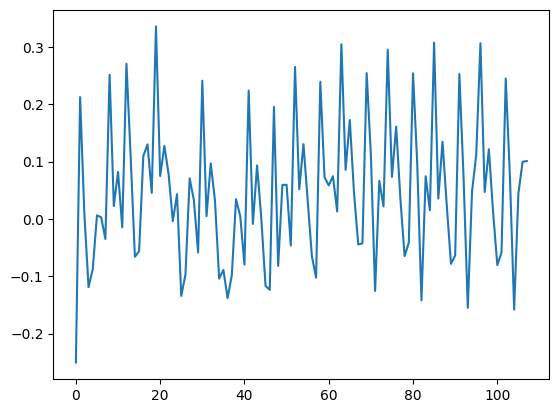

In [ ]:
#Número de predicciones
#Cálcular --> errores simples
N = len(y_ts_pred)
ndato = np.linspace(1,N,N)

errores = y_ts.flatten()-y_ts_pred
plt.plot(errores);

In [ ]:
tabla15_2023.name = "Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Procedimientos de Mantenimiento, Reparación e Inspección) Año 2022"
print(tabla15_2023.name)
tabla15_2023_styled = tabla15_2023.drop('Promedio', axis=1)
tabla15_2023_styled

Hoja de Datos Indicador de Rendimiento de Seguridad Operacional (Procedimientos de Mantenimiento, Reparación e Inspección) Año 2022


,Mes,HHT Total,Peligros Total,Tasa de Peligros,Prom Año Ant +1SD,Prom Año Ant +2SD,Prom Año Ant +3SD,Objetivo 2023
0,Ene,52040.42,63.00,1.21,1.33,1.40,1.52,1.10
1,Feb,52020.29,66.00,1.27,1.33,1.40,1.52,1.10
2,Mar,52308.38,54.00,1.03,1.33,1.40,1.52,1.10
3,Abr,52262.29,52.00,0.99,1.33,1.40,1.52,1.10
4,May,51775.83,60.00,1.16,1.33,1.40,1.52,1.10
5,Jun,51720.54,68.00,1.31,1.33,1.40,1.52,1.10
6,Jul,52192.67,71.00,1.36,1.33,1.40,1.52,1.10
7,Ago,51796.83,60.00,1.16,1.33,1.40,1.52,1.10
8,Sep,52189.54,60.00,1.15,1.33,1.40,1.52,1.10
9,Oct,nan,0.00,nan,1.33,1.40,1.52,1.10


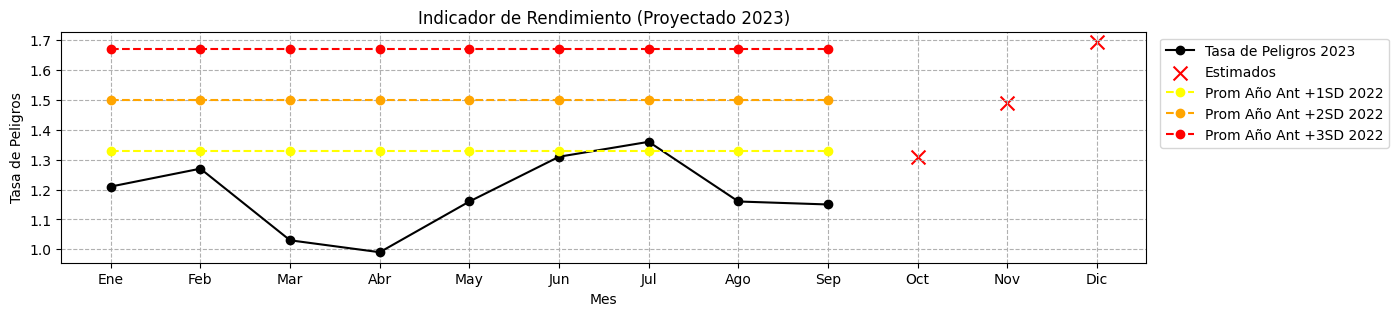

In [ ]:
#Datos existentes en --> tabla15_2023
#Valores de RMSE de referencia
#Crear gráfico --> Diagrama de Indicador (Procedimientos de Mantenimiento, Reparación e Inspección) 2023
#Proyección (estimada) para meses faltantes --> Oct, Nov, Dic
#Gráficar
rmse_train = 0.289
rmse_val = 0.196
rmse_test = 0.223

tasa_peligros_hasta_sept = np.array(tabla15_2023['Tasa de Peligros'][:9]).astype(float)
meses = tabla15_2023['Mes'][:9]

prom_anio_ant_1sd_2022 = np.array(tabla14_2022['Prom Año Ant +1SD']).astype(float)
prom_anio_ant_2sd_2022 = np.array(tabla14_2022['Prom Año Ant +2SD']).astype(float)
prom_anio_ant_3sd_2022 = np.array(tabla14_2022['Prom Año Ant +3SD']).astype(float)

prom_anio_ant_1sd_2022 = prom_anio_ant_1sd_2022[:9]
prom_anio_ant_2sd_2022 = prom_anio_ant_2sd_2022[:9]
prom_anio_ant_3sd_2022 = prom_anio_ant_3sd_2022[:9]
fig, ax = plt.subplots(figsize=(14, 3))
ax.plot(meses, tasa_peligros_hasta_sept, label='Tasa de Peligros 2023', marker='o', color='black')

correccion_oct = rmse_test / rmse_val
correccion_nov = rmse_test / rmse_val
correccion_dic = rmse_test / rmse_val

tasa_peligros_oct = tasa_peligros_hasta_sept[8] * correccion_oct
tasa_peligros_nov = tasa_peligros_oct * correccion_nov
tasa_peligros_dic = tasa_peligros_nov * correccion_dic

tabla15_2023.loc[9, 'Tasa de Peligros'] = tasa_peligros_oct
tabla15_2023.loc[10, 'Tasa de Peligros'] = tasa_peligros_nov
tabla15_2023.loc[11, 'Tasa de Peligros'] = tasa_peligros_dic

meses_estimados = ['Oct', 'Nov', 'Dic']
tasas_estimadas = [tasa_peligros_oct, tasa_peligros_nov, tasa_peligros_dic]
ax.scatter(meses_estimados, tasas_estimadas, c='r', marker='x', label='Estimados', s=100)

ax.plot(meses, prom_anio_ant_1sd_2022, label='Prom Año Ant +1SD 2022', linestyle='--', marker='o', color='yellow')
ax.plot(meses, prom_anio_ant_2sd_2022, label='Prom Año Ant +2SD 2022', linestyle='--', marker='o', color='orange')
ax.plot(meses, prom_anio_ant_3sd_2022, label='Prom Año Ant +3SD 2022', linestyle='--', marker='o', color='red')
ax.set_xlabel('Mes')
ax.set_ylabel('Tasa de Peligros', color='black')
ax.set_title('Indicador de Rendimiento (Proyectado 2023)')
ax.legend(loc='upper right', bbox_to_anchor=(1.230, 1))
ax.grid(True, linestyle='--')
plt.show()